<a href="https://colab.research.google.com/github/rushil1510/COL100-Assignments/blob/main/BTP_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading the datasheet onto colab and making all imports

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
uploaded = files.upload()

Saving datasheet.xlsx to datasheet.xlsx


In [2]:
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)
print(df.head())

   CH4  C3H8   Equivalence_Ratio   Compression Pressure(atm)  \
0  1.0   0.0                 0.5                           1   
1  1.0   0.0                 0.5                           1   
2  1.0   0.0                 0.5                           1   
3  1.0   0.0                 0.5                           1   
4  1.0   0.0                 0.5                           1   

    Compression Temperature(K)   1000/T_(1/K)   Ignition_time  time  \
0                     700.0000       1.428571             0.0   0.0   
1                     708.0808       1.412268             0.0   0.0   
2                     716.1616       1.396333             0.0   0.0   
3                     724.2424       1.380753             0.0   0.0   
4                     732.3232       1.365517             0.0   0.0   

   Unnamed: 8 Unnamed: 9  
0         NaN        NaN  
1         NaN        NaN  
2         NaN        NaN  
3         NaN        NaN  
4         NaN        NaN  


Cleaning up the **dataframe**

In [3]:
df = df.iloc[:, :-2]
df = df.drop(columns=[' Ignition_time'])

Cleaning up the **dataset**

In [4]:
df.describe()
print(df.shape)
print(df.dtypes)
df.columns = ['x', 'y','phi','p','T','1000/T','idt']
print(df.columns)
df = df[df['p'] != 10].reset_index(drop=True)
df['phi'] = df['phi'].replace(np.nan, 0.5)
df = df[df['idt'] != 0].reset_index(drop=True)

(1400, 7)
CH4                            float64
C3H8                           float64
 Equivalence_Ratio             float64
 Compression Pressure(atm)       int64
 Compression Temperature(K)    float64
 1000/T_(1/K)                  float64
time                           float64
dtype: object
Index(['x', 'y', 'phi', 'p', 'T', '1000/T', 'idt'], dtype='object')


This is our main approach, we are going through multiple activation functions for the different values of x. We're also using BatchNormalization, Dropout Layers. We also added weight decay to adam

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 32: early stopping
Restoring model weights from the end of the best epoch: 22.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Results for x=0 with activation=relu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       4.011719    2.068473
1   0.0  1.0  0.5  1168.6870    2.126556       1.603516    0.523040
2   0.0  1.0  0.5   966.6667    5.221666       3.289062    1.932603
3   0.0  1.0  0.5   885.8586    6.746877       4.492188    2.254690
4   0.0  1.0  0.5  1249.4950    0.801715       1.393555   -0.591839
5   0.0  1.0  0.5  1265.6570    0.537863       1.349609   -0.811746
6   0.0  1.0  0.5  1419.1920   -1.747160       0.949219   -2.696379
7   0.0  1.0  0.5  1314.1410   -0.237612       1.224609   -1.462221
8   0.0  1.0  0.5  1289.8990    0.146362       1.28

<ipython-input-32-a5b9fb39f312>:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


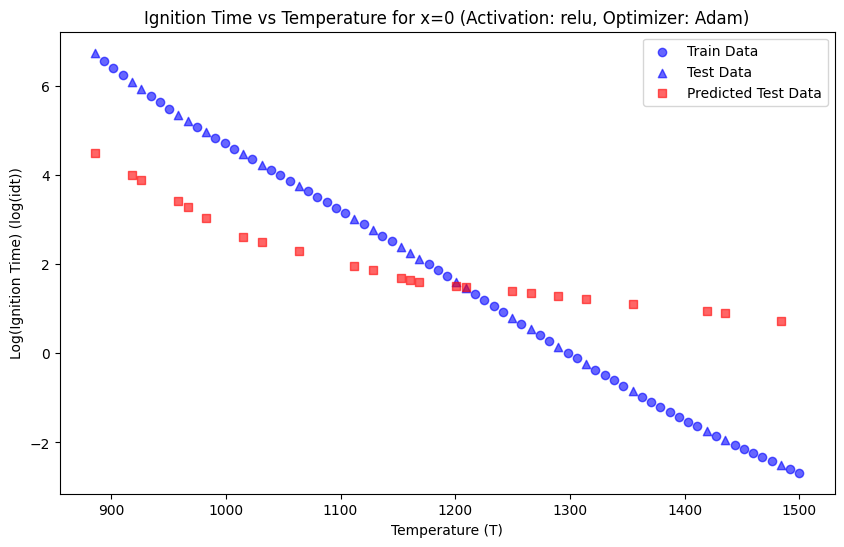

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 61: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 66: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 66: early stopping
Restoring model weights from the end of the best epoch: 56.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Results for x=0 with activation=relu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       5.429688    0.650505
1   0.0  1.0  0.5  1168.6870    2.126556       2.232422   -0.105866
2   0.0  1.0  0.5   966.6667    5.221666       4.812500    0.409166
3   0.0  1.0  0.5   885.8586    6.746877       5.835938    0.910940
4   0.0  1.0  0.5  1249.4950    0.801715       1.529297   -0.727581
5   0.0  1.0  0.5  1265.6570    0.537863       1.320312   -0.782449
6   0.0  1.0  0.5  1419.1920   -1.747160      -0.173828   -1.573332
7   0.0  1.0  0.5  1314.1410   -0.23761

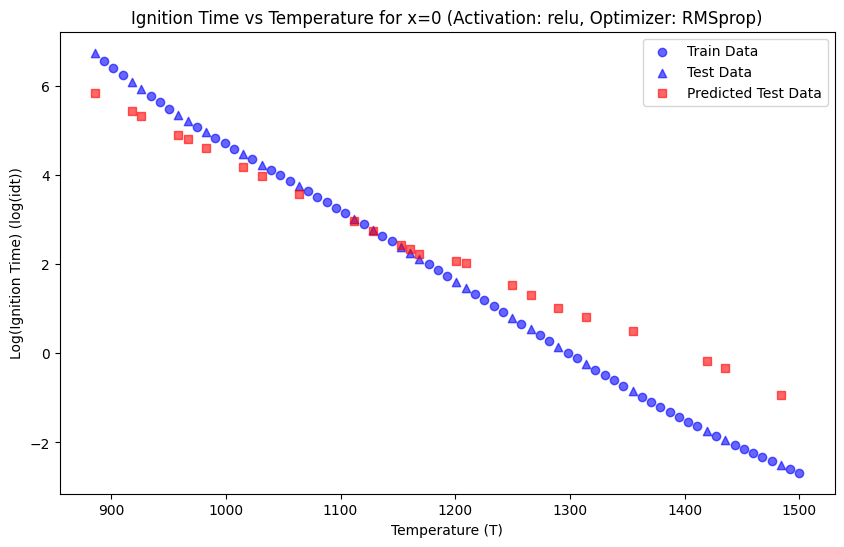

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 58: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 63: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 63: early stopping
Restoring model weights from the end of the best epoch: 53.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Results for x=0 with activation=relu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       5.539062    0.541130
1   0.0  1.0  0.5  1168.6870    2.126556       2.027344    0.099212
2   0.0  1.0  0.5   966.6667    5.221666       5.019531    0.202135
3   0.0  1.0  0.5   885.8586    6.746877       5.886719    0.860159
4   0.0  1.0  0.5  1249.4950    0.801715       0.704102    0.097614
5   0.0  1.0  0.5  1265.6570    0.537863       0.484619    0.053244
6   0.0  1.0  0.5  1419.1920   -1.747160      -1.486328   -0.260832
7   0.0  1.0  0.5  1314.1410   -0.237612      -0.130371   -0.107241
8   0.0  1.0  0.5  1289.8990    0.146362       0.1743

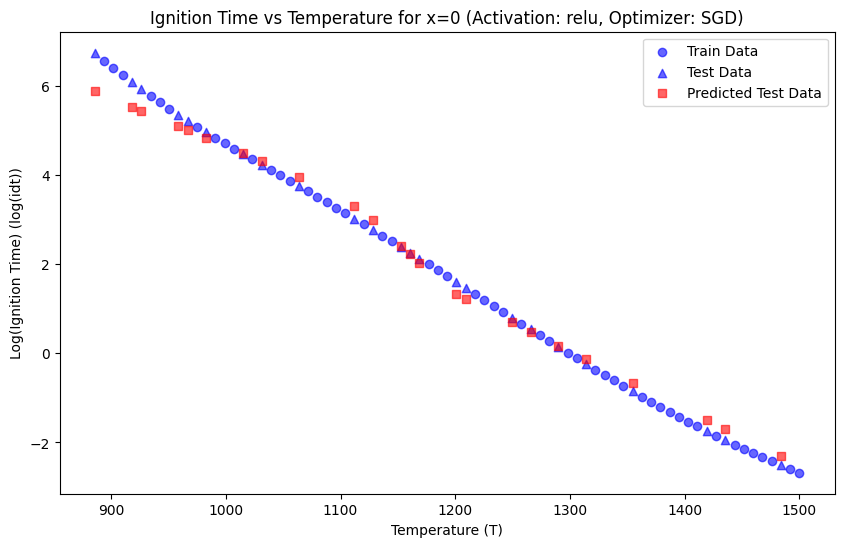

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Results for x=0 with activation=leaky_relu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       0.855957    5.224235
1   0.0  1.0  0.5  1168.6870    2.126556       1.151367    0.975188
2   0.0  1.0  0.5   966.6667    5.221666       0.907227    4.314439
3   0.0  1.0  0.5   885.8586    6.746877       0.802246    5.944631
4   0.0  1.0  0.5  1249.4950    0.801715       1.242188   -0.440472
5   0.0  1.0  0.5  1265.6570    0.537863       1.264648   -0.726785
6   0.0  1.0  0.5  1419.1920   -1.747160       1.449219   -3.196379
7   0.0  1.0  0.5  1314.1410   -0.237612       1.315430   -1.553041
8   0.0  1.0  0.5  1289.8990    0.146362       

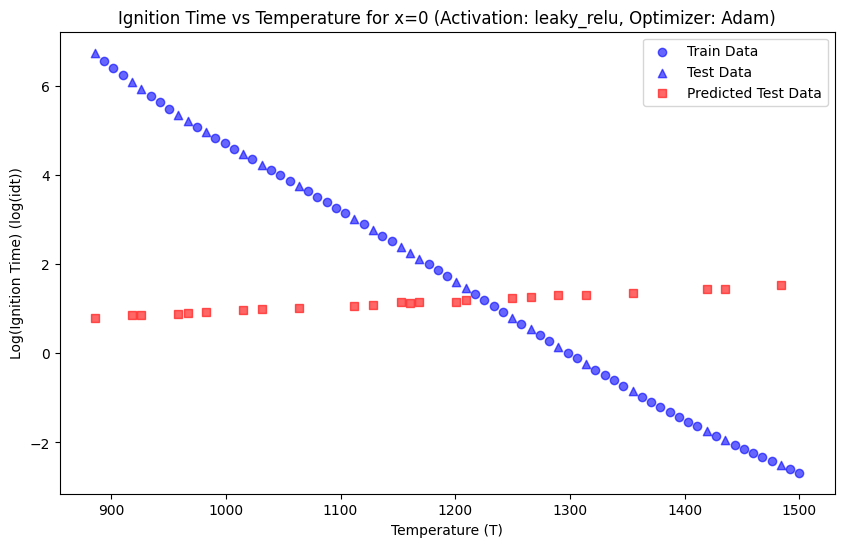

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 30: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 35: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 35: early stopping
Restoring model weights from the end of the best epoch: 25.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Results for x=0 with activation=leaky_relu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       5.394531    0.685661
1   0.0  1.0  0.5  1168.6870    2.126556       2.330078   -0.203522
2   0.0  1.0  0.5   966.6667    5.221666       4.503906    0.717760
3   0.0  1.0  0.5   885.8586    6.746877       5.976562    0.770315
4   0.0  1.0  0.5  1249.4950    0.801715       0.893555   -0.091839
5   0.0  1.0  0.5  1265.6570    0.537863       0.694824   -0.156961
6   0.0  1.0  0.5  1419.1920   -1.747160      -1.266602   -0.480558
7   0.0  1.0  0.5  1314.1410   -0.237612       0.127197   -0.364809
8   0.0  1.0  0.5  1289.8990    0.146362  

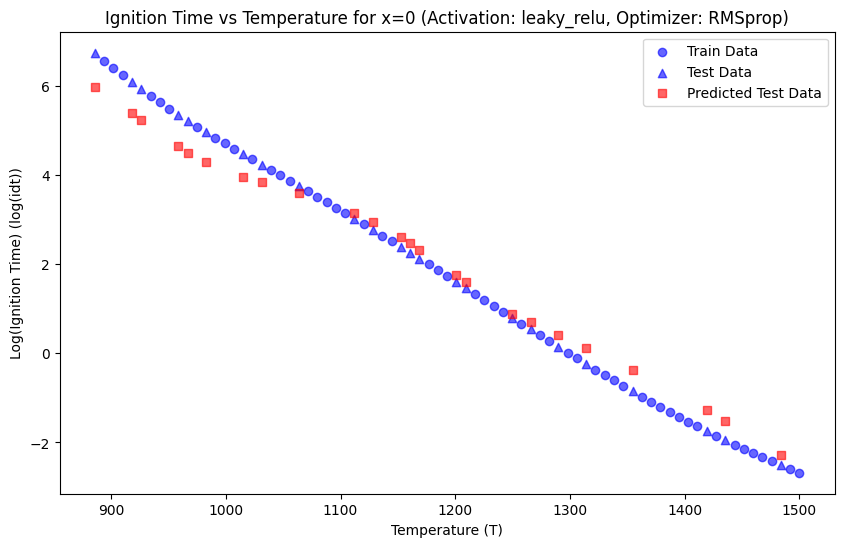

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 49: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 54: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 54: early stopping
Restoring model weights from the end of the best epoch: 44.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Results for x=0 with activation=leaky_relu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       6.187500   -0.107308
1   0.0  1.0  0.5  1168.6870    2.126556       1.404297    0.722259
2   0.0  1.0  0.5   966.6667    5.221666       5.269531   -0.047865
3   0.0  1.0  0.5   885.8586    6.746877       6.792969   -0.046091
4   0.0  1.0  0.5  1249.4950    0.801715       0.534180    0.267536
5   0.0  1.0  0.5  1265.6570    0.537863       0.395020    0.142844
6   0.0  1.0  0.5  1419.1920   -1.747160      -0.858398   -0.888761
7   0.0  1.0  0.5  1314.1410   -0.237612      -0.002441   -0.235170
8   0.0  1.0  0.5  1289.8990    0.146362       

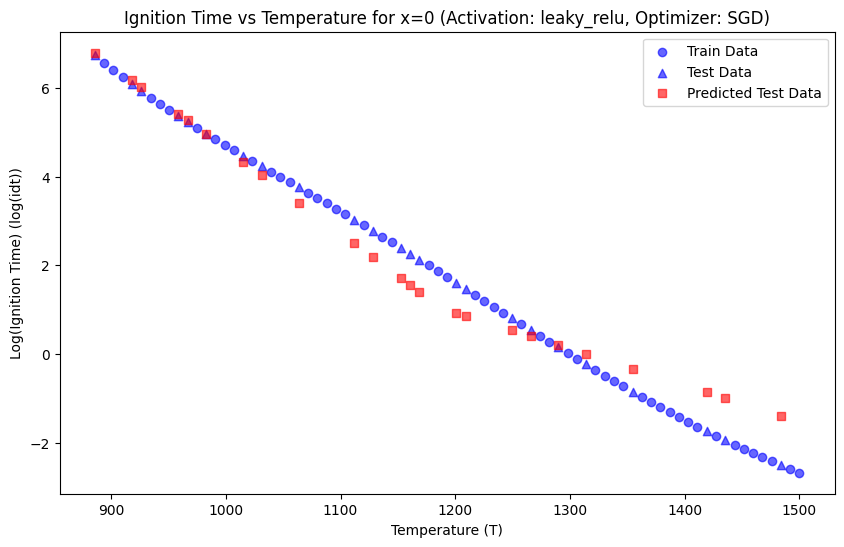

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 28: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 41: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 46: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 46: early stopping
Restoring model weights from the end of the best epoch: 36.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Results for x=0 with activation=elu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       4.062500    2.017692
1   0.0  1.0  0.5  1168.6870    2.126556       1.607422    0.519134
2   0.0  1.0  0.5   966.6667    5.221666       3.656250    1.565416
3   0.0  1.0  0.5   885.8586    6.746877       4.308594    2.438284
4   0.0  1.0  0.5  1249.4950    0.801715       0.701172    0.100544
5   0.0  1.0  0.5  1265.6570    0.537863       0.505859    0.032004
6   0.0  1.0  0.5  1419.1920   -1.747160      -1.232422   -0.514738
7   0.0  1.0  0.5  1314.1410   -0.237612   

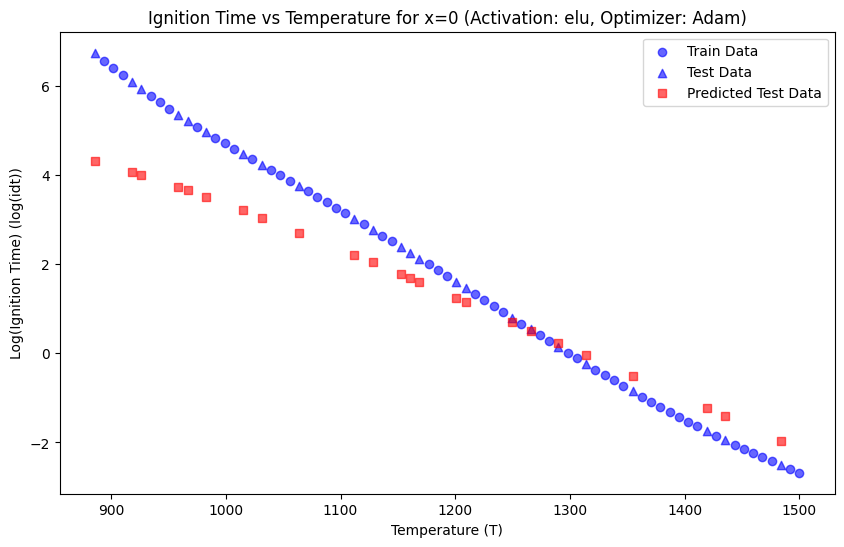

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 9.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Results for x=0 with activation=elu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       0.363281    5.716911
1   0.0  1.0  0.5  1168.6870    2.126556       0.622559    1.503997
2   0.0  1.0  0.5   966.6667    5.221666       0.405273    4.816392
3   0.0  1.0  0.5   885.8586    6.746877       0.338379    6.408499
4   0.0  1.0  0.5  1249.4950    0.801715       0.718750    0.082965
5   0.0  1.0  0.5  1265.6570    0.537863       0.741211   -0.203348
6   0.0  1.0  0.5  1419.1920   -1.747160       0.937500   -2.684660
7   0.0  1.0  0.5  1314.1410   -0.237612       0.805664   -1.043276
8   0.0  1.0  0.5  1289.8990    0.146362       0.76

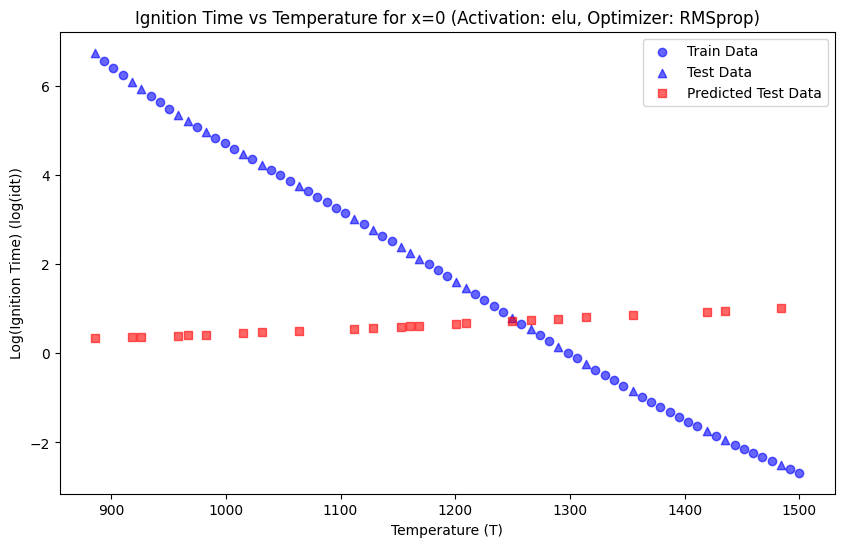

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 4.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Results for x=0 with activation=elu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       0.745605    5.334587
1   0.0  1.0  0.5  1168.6870    2.126556       0.631836    1.494720
2   0.0  1.0  0.5   966.6667    5.221666       0.726074    4.495592
3   0.0  1.0  0.5   885.8586    6.746877       0.766602    5.980276
4   0.0  1.0  0.5  1249.4950    0.801715       0.593750    0.207965
5   0.0  1.0  0.5  1265.6570    0.537863       0.583496   -0.045633
6   0.0  1.0  0.5  1419.1920   -1.747160       0.508789   -2.255949
7   0.0  1.0  0.5  1314.1410   -0.237612       0.564941   -0.802553
8   0.0  1.0  0.5  1289.8990    0.146362       0.575195 

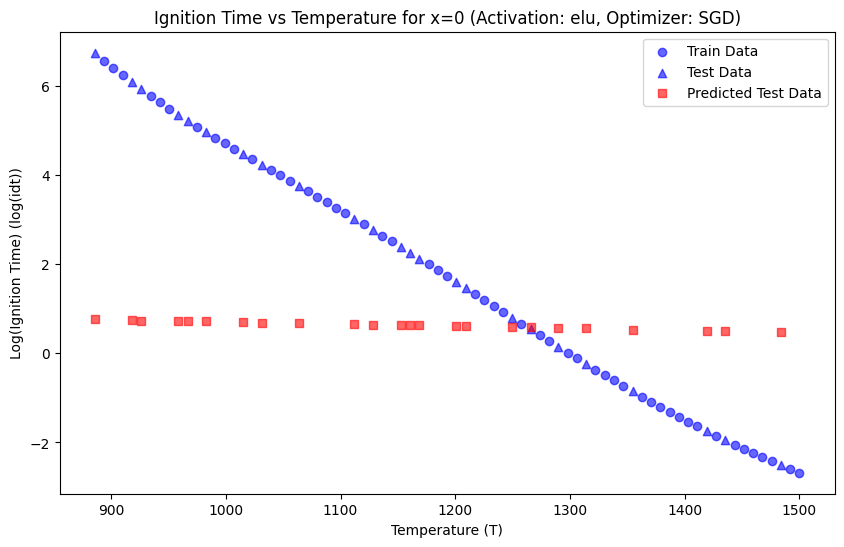

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Results for x=0 with activation=selu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192      -3.107422    9.187614
1   0.0  1.0  0.5  1168.6870    2.126556      -3.394531    5.521087
2   0.0  1.0  0.5   966.6667    5.221666      -3.156250    8.377916
3   0.0  1.0  0.5   885.8586    6.746877      -3.060547    9.807424
4   0.0  1.0  0.5  1249.4950    0.801715      -3.484375    4.286090
5   0.0  1.0  0.5  1265.6570    0.537863      -3.505859    4.043723
6   0.0  1.0  0.5  1419.1920   -1.747160      -3.728516    1.981356
7   0.0  1.0  0.5  1314.1410   -0.237612      -3.566406    3.328795
8   0.0  1.0  0.5  1289.8990    0.146362      -3.5371

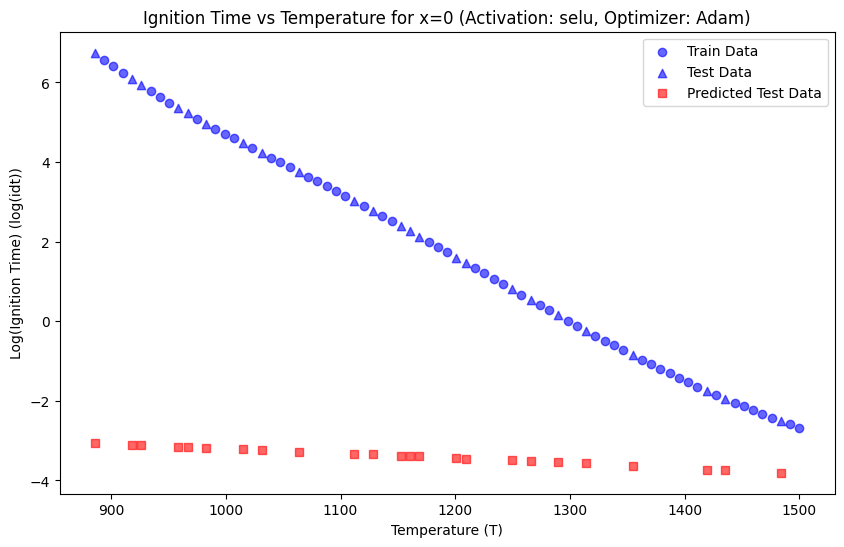

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 58: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 63: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 63: early stopping
Restoring model weights from the end of the best epoch: 53.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Results for x=0 with activation=selu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       5.296875    0.783317
1   0.0  1.0  0.5  1168.6870    2.126556       2.210938   -0.084382
2   0.0  1.0  0.5   966.6667    5.221666       4.777344    0.444322
3   0.0  1.0  0.5   885.8586    6.746877       5.625000    1.121877
4   0.0  1.0  0.5  1249.4950    0.801715       0.871094   -0.069378
5   0.0  1.0  0.5  1265.6570    0.537863       0.552246   -0.014383
6   0.0  1.0  0.5  1419.1920   -1.747160      -1.655273   -0.091886
7   0.0  1.0  0.5  1314.1410   -0.237612

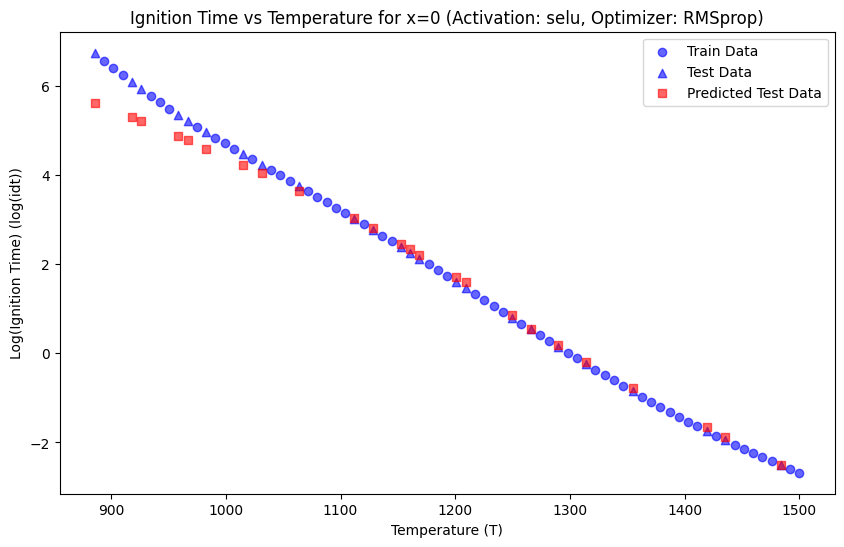

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 26: early stopping
Restoring model weights from the end of the best epoch: 16.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Results for x=0 with activation=selu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       4.832031    1.248161
1   0.0  1.0  0.5  1168.6870    2.126556       2.300781   -0.174226
2   0.0  1.0  0.5   966.6667    5.221666       4.324219    0.897447
3   0.0  1.0  0.5   885.8586    6.746877       5.128906    1.617971
4   0.0  1.0  0.5  1249.4950    0.801715       1.452148   -0.650433
5   0.0  1.0  0.5  1265.6570    0.537863       1.269531   -0.731668
6   0.0  1.0  0.5  1419.1920   -1.747160      -0.308838   -1.438322
7   0.0  1.0  0.5  1314.1410   -0.237612       0.769043   -1.006655
8   0.0  1.0  0.5  1289.8990    0.146362       1.0224

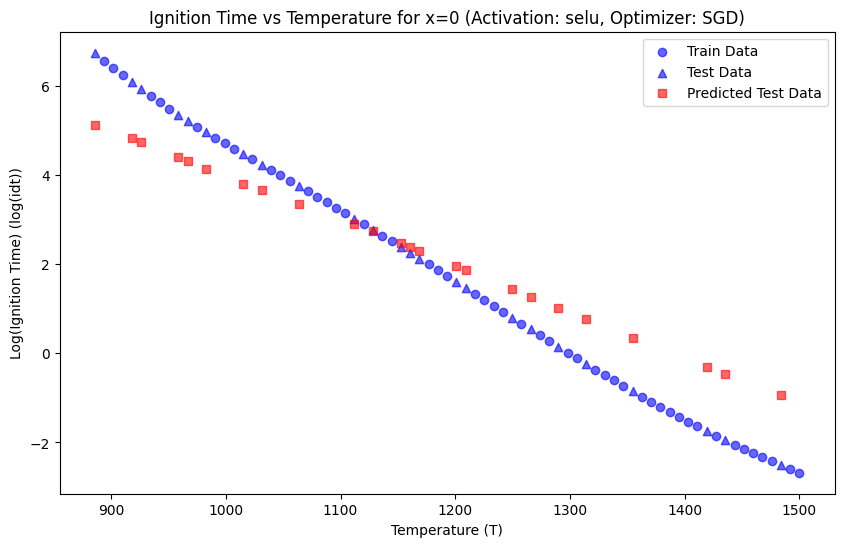

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 4.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Results for x=0 with activation=softplus and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       0.328857    5.751335
1   0.0  1.0  0.5  1168.6870    2.126556       0.483643    1.642913
2   0.0  1.0  0.5   966.6667    5.221666       0.354980    4.866685
3   0.0  1.0  0.5   885.8586    6.746877       0.318359    6.428518
4   0.0  1.0  0.5  1249.4950    0.801715       0.541504    0.260212
5   0.0  1.0  0.5  1265.6570    0.537863       0.546875   -0.009012
6   0.0  1.0  0.5  1419.1920   -1.747160       0.654297   -2.401457
7   0.0  1.0  0.5  1314.1410   -0.237612       0.576172   -0.813784
8   0.0  1.0  0.5  1289.8990    0.146362       0.

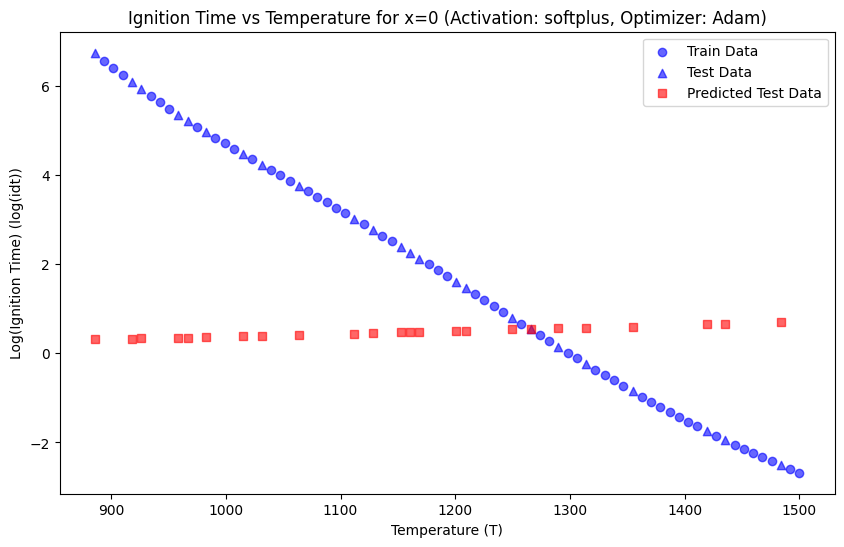

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 5.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Results for x=0 with activation=softplus and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192      -1.700195    7.780388
1   0.0  1.0  0.5  1168.6870    2.126556      -2.759766    4.886321
2   0.0  1.0  0.5   966.6667    5.221666      -1.899414    7.121080
3   0.0  1.0  0.5   885.8586    6.746877      -1.572266    8.319143
4   0.0  1.0  0.5  1249.4950    0.801715      -3.115234    3.916950
5   0.0  1.0  0.5  1265.6570    0.537863      -3.197266    3.735129
6   0.0  1.0  0.5  1419.1920   -1.747160      -3.900391    2.153231
7   0.0  1.0  0.5  1314.1410   -0.237612      -3.414062    3.176451
8   0.0  1.0  0.5  1289.8990    0.146362     

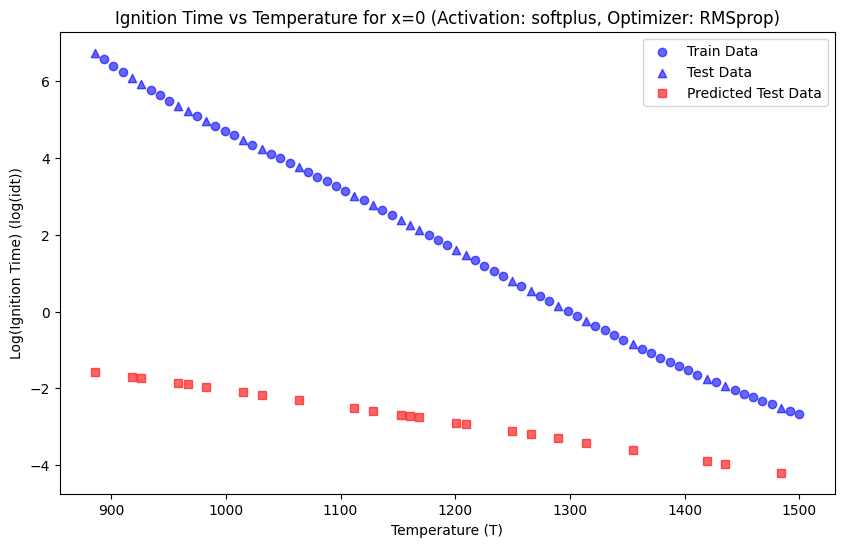

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 51: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 56: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 56: early stopping
Restoring model weights from the end of the best epoch: 46.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Results for x=0 with activation=softplus and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       4.523438    1.556755
1   0.0  1.0  0.5  1168.6870    2.126556       0.536621    1.589935
2   0.0  1.0  0.5   966.6667    5.221666       3.632812    1.588853
3   0.0  1.0  0.5   885.8586    6.746877       5.140625    1.606252
4   0.0  1.0  0.5  1249.4950    0.801715      -0.402832    1.204547
5   0.0  1.0  0.5  1265.6570    0.537863      -0.587402    1.125266
6   0.0  1.0  0.5  1419.1920   -1.747160      -1.916016    0.168856
7   0.0  1.0  0.5  1314.1410   -0.2376

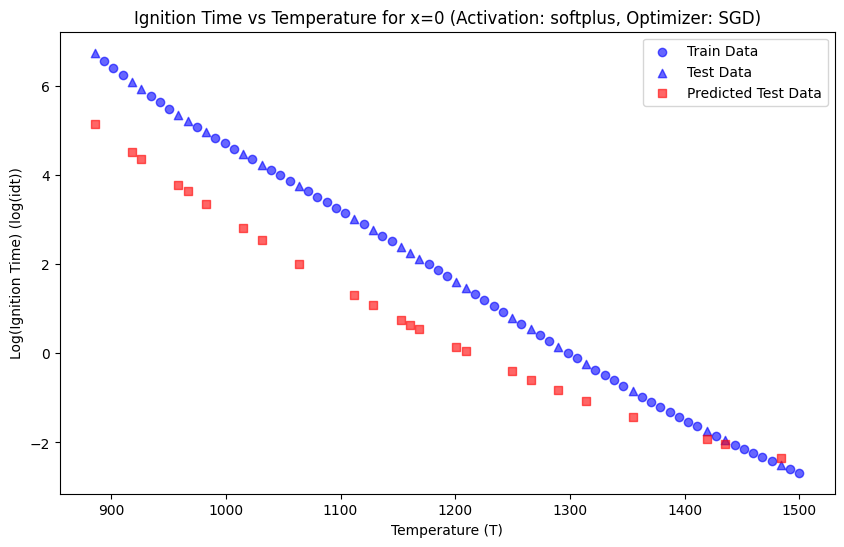

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 29: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 34: early stopping
Restoring model weights from the end of the best epoch: 24.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Results for x=0 with activation=swish and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       3.376953    2.703239
1   0.0  1.0  0.5  1168.6870    2.126556       1.777344    0.349212
2   0.0  1.0  0.5   966.6667    5.221666       2.931641    2.290025
3   0.0  1.0  0.5   885.8586    6.746877       3.693359    3.053518
4   0.0  1.0  0.5  1249.4950    0.801715       1.500977   -0.699261
5   0.0  1.0  0.5  1265.6570    0.537863       1.438477   -0.900613
6   0.0  1.0  0.5  1419.1920   -1.747160       0.725586   -2.472746
7   0.0  1.0  0.5  1314.1410   -0.237612 

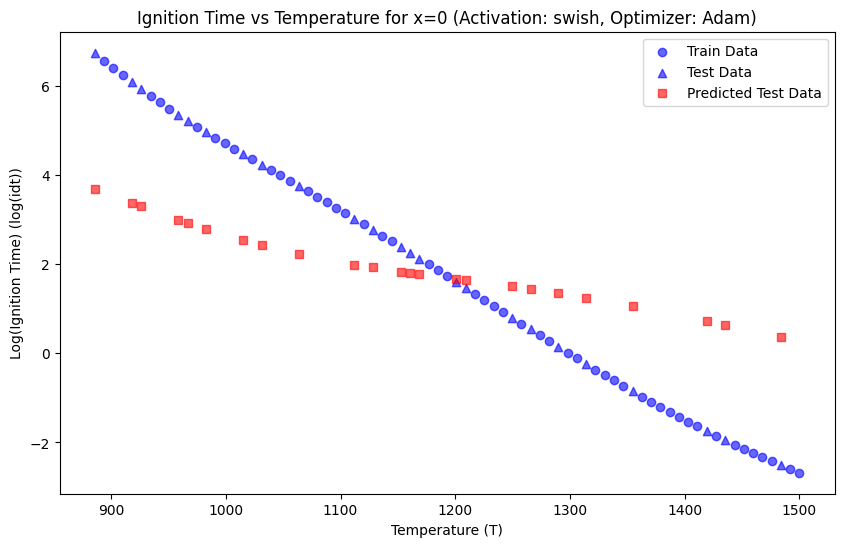

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 38: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 43: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 43: early stopping
Restoring model weights from the end of the best epoch: 33.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Results for x=0 with activation=swish and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       5.203125    0.877067
1   0.0  1.0  0.5  1168.6870    2.126556       2.232422   -0.105866
2   0.0  1.0  0.5   966.6667    5.221666       4.695312    0.526353
3   0.0  1.0  0.5   885.8586    6.746877       5.523438    1.223440
4   0.0  1.0  0.5  1249.4950    0.801715       1.147461   -0.345745
5   0.0  1.0  0.5  1265.6570    0.537863       0.913086   -0.375223
6   0.0  1.0  0.5  1419.1920   -1.747160      -1.280273   -0.466886
7   0.0  1.0  0.5  1314.1410   -0.237612       0.236206   -0.473818
8   0.0  1.0  0.5  1289.8990    0.146362       

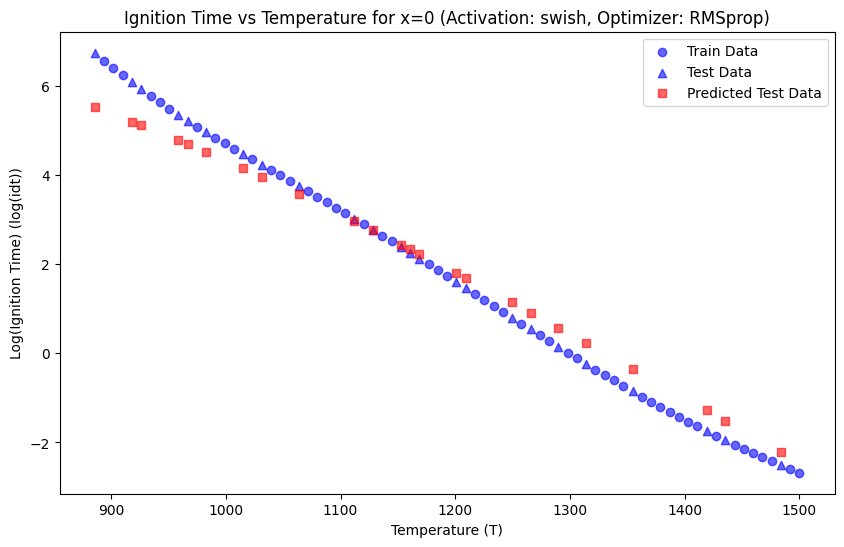

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 69: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 74: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 74: early stopping
Restoring model weights from the end of the best epoch: 64.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Results for x=0 with activation=swish and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       6.011719    0.068473
1   0.0  1.0  0.5  1168.6870    2.126556       1.916016    0.210540
2   0.0  1.0  0.5   966.6667    5.221666       5.164062    0.057603
3   0.0  1.0  0.5   885.8586    6.746877       6.589844    0.157034
4   0.0  1.0  0.5  1249.4950    0.801715       0.784668    0.017047
5   0.0  1.0  0.5  1265.6570    0.537863       0.555664   -0.017801
6   0.0  1.0  0.5  1419.1920   -1.747160      -1.250000   -0.497160
7   0.0  1.0  0.5  1314.1410   -0.237612      -0.058105   -0.179506
8   0.0  1.0  0.5  1289.8990    0.146362       0.24

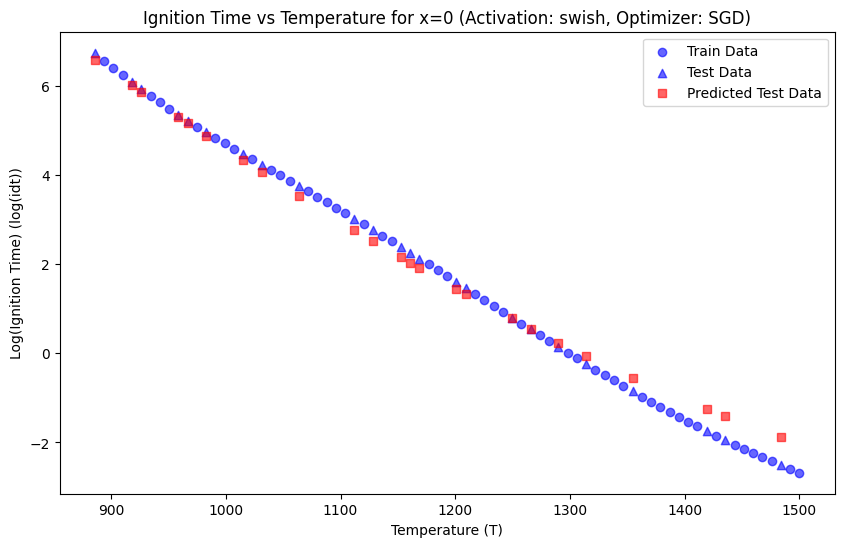

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 45: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 50: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 50: early stopping
Restoring model weights from the end of the best epoch: 40.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Results for x=0 with activation=gelu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       4.710938    1.369255
1   0.0  1.0  0.5  1168.6870    2.126556       2.017578    0.108978
2   0.0  1.0  0.5   966.6667    5.221666       4.292969    0.928697
3   0.0  1.0  0.5   885.8586    6.746877       4.957031    1.789846
4   0.0  1.0  0.5  1249.4950    0.801715       1.107422   -0.305706
5   0.0  1.0  0.5  1265.6570    0.537863       0.927246   -0.389383
6   0.0  1.0  0.5  1419.1920   -1.747160      -0.565430   -1.181730
7   0.0  1.0  0.5  1314.1410   -0.237612 

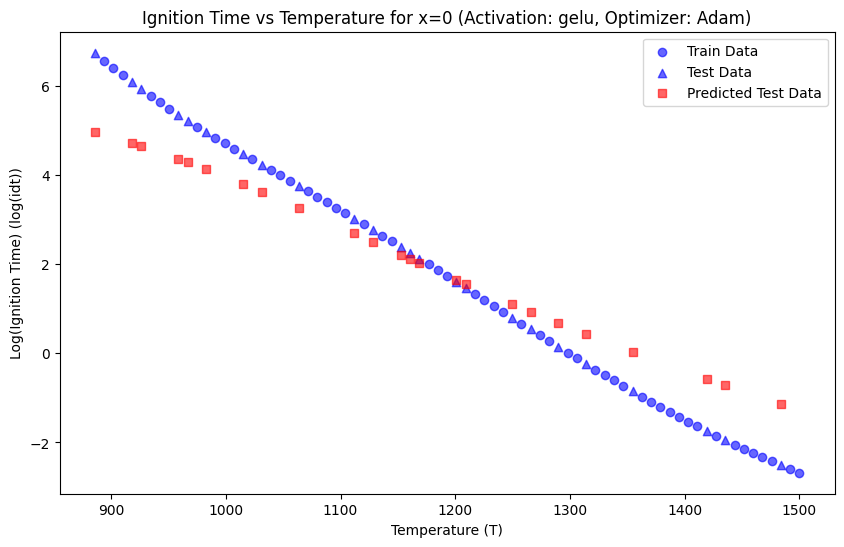

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 46: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 60: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 65: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 65: early stopping
Restoring model weights from the end of the best epoch: 55.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Results for x=0 with activation=gelu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       5.484375    0.595817
1   0.0  1.0  0.5  1168.6870    2.126556       2.232422   -0.105866
2   0.0  1.0  0.5   966.6667    5.221666       4.945312    0.276353
3   0.0  1.0  0.5   885.8586    6.746877       5.843750    0.903127
4   0.0  1.0  0.5  1249.4950    0.801715       0.948242   -0.146527
5   0.0  1.0  0.5  1265.6570    0.537863       0.680176   -0.142313
6   0.0  1.0  0.5  1419.1920   -1.747160      -1.413086   -0.334074
7   0.0  1.0  0.5  1314.1410   -0.2376

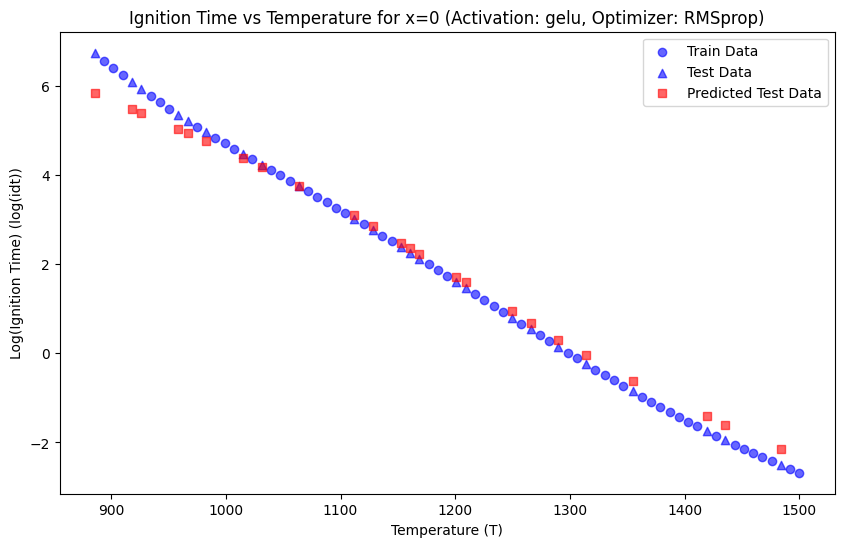

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 56: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 61: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 61: early stopping
Restoring model weights from the end of the best epoch: 51.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Results for x=0 with activation=gelu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.0  1.0  0.5   918.1818    6.080192       6.117188   -0.036995
1   0.0  1.0  0.5  1168.6870    2.126556       1.830078    0.296478
2   0.0  1.0  0.5   966.6667    5.221666       5.351562   -0.129897
3   0.0  1.0  0.5   885.8586    6.746877       6.625000    0.121877
4   0.0  1.0  0.5  1249.4950    0.801715       0.635742    0.165973
5   0.0  1.0  0.5  1265.6570    0.537863       0.437256    0.100607
6   0.0  1.0  0.5  1419.1920   -1.747160      -0.987305   -0.759855
7   0.0  1.0  0.5  1314.1410   -0.237612  

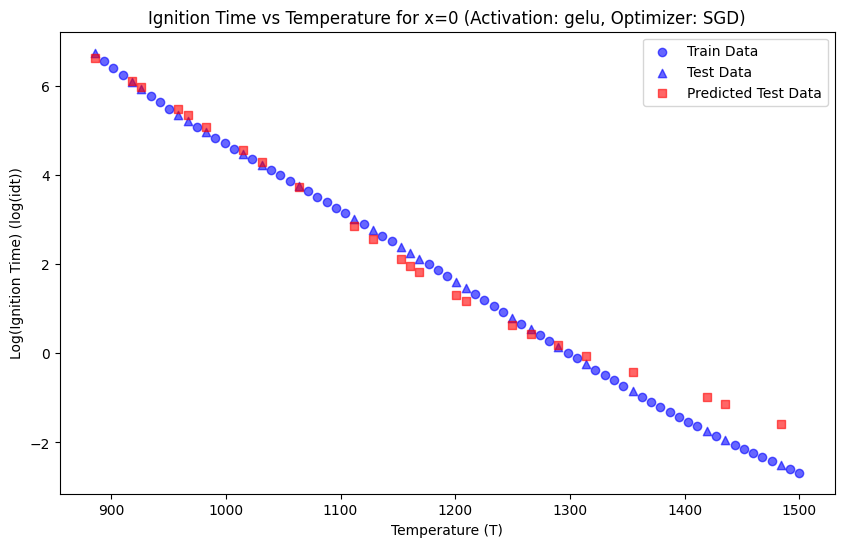

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 32: early stopping
Restoring model weights from the end of the best epoch: 22.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Results for x=0.2 with activation=relu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       2.935547    0.409171
1   0.2  0.8  0.5   853.5354    7.562421       5.382812    2.179609
2   0.2  0.8  0.5  1031.3130    4.316119       3.404297    0.911822
3   0.2  0.8  0.5  1104.0400    3.219191       2.875000    0.344191
4   0.2  0.8  0.5   998.9899    4.797872       3.634766    1.163106
5   0.2  0.8  0.5  1079.7980    3.592467       3.054688    0.537780
6   0.2  0.8  0.5   934.3434    5.850882       4.328125    1.522757
7   0.2  0.8  0.5  1419.1920   -1.704948       2.191406   -3.896354
8   0.2  0.8  0.5   885.8586    6.810114       4.

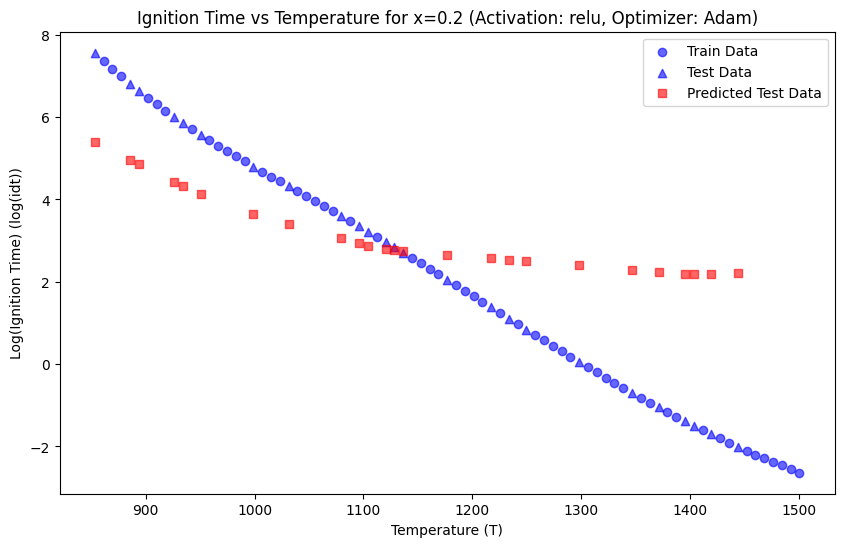

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 30: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 35: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 35: early stopping
Restoring model weights from the end of the best epoch: 25.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Results for x=0.2 with activation=relu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       2.929688    0.415030
1   0.2  0.8  0.5   853.5354    7.562421       3.591797    3.970625
2   0.2  0.8  0.5  1031.3130    4.316119       3.021484    1.294635
3   0.2  0.8  0.5  1104.0400    3.219191       2.865234    0.353957
4   0.2  0.8  0.5   998.9899    4.797872       3.011719    1.786153
5   0.2  0.8  0.5  1079.7980    3.592467       2.998047    0.594420
6   0.2  0.8  0.5   934.3434    5.850882       3.072266    2.778616
7   0.2  0.8  0.5  1419.1920   -1.7049

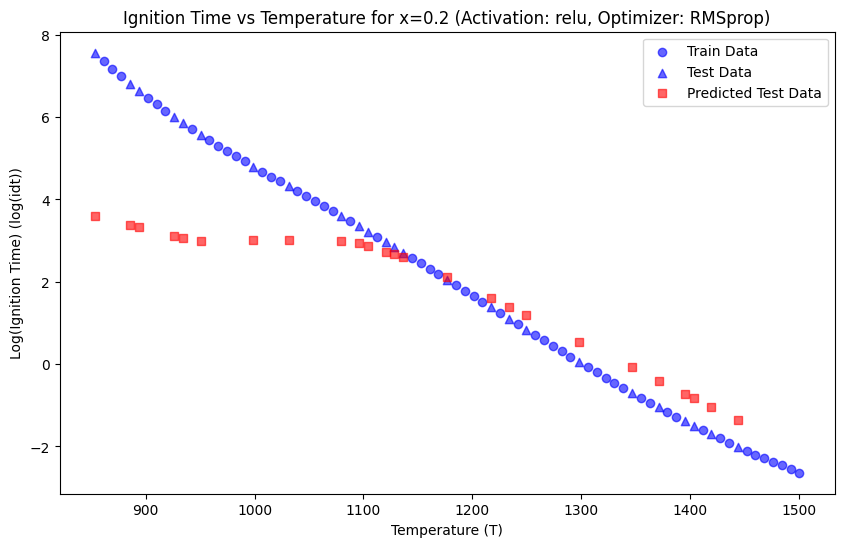

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Results for x=0.2 with activation=relu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       0.995117    2.349600
1   0.2  0.8  0.5   853.5354    7.562421       0.772949    6.789472
2   0.2  0.8  0.5  1031.3130    4.316119       0.925293    3.390826
3   0.2  0.8  0.5  1104.0400    3.219191       1.000977    2.218215
4   0.2  0.8  0.5   998.9899    4.797872       0.904785    3.893087
5   0.2  0.8  0.5  1079.7980    3.592467       0.975586    2.616881
6   0.2  0.8  0.5   934.3434    5.850882       0.850098    5.000784
7   0.2  0.8  0.5  1419.1920   -1.704948       1.265625   -2.970573
8   0.2  0.8  0.5   885.8586    6.810114       0.7958

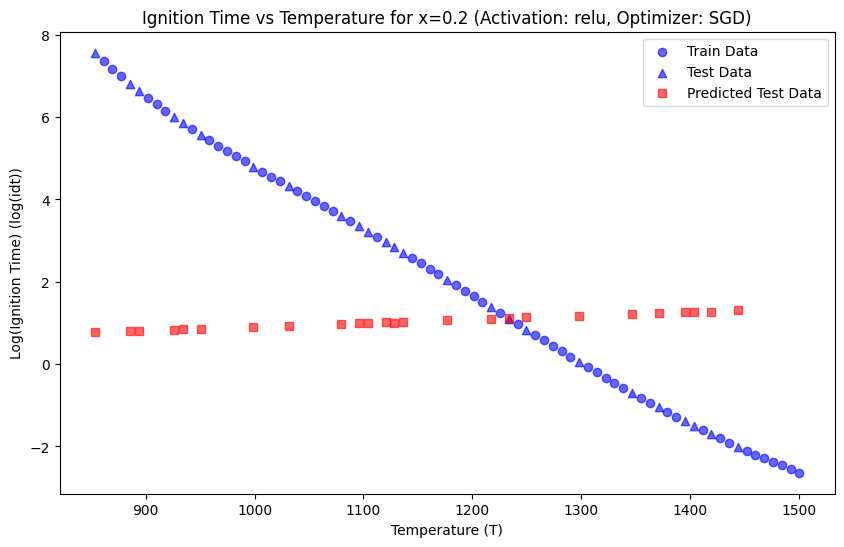

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 52: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 71: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 81: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 86: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 86: early stopping
Restoring model weights from the end of the best epoch: 76.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Results for x=0.2 with activation=leaky_relu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       3.175781    0.168936
1   0.2  0.8  0.5   853.5354    7.562421       6.593750    0.968671
2   0.2  0.8  0.5  1031.3130    4.316119       4.089844    0.226275
3   0.2  0.8  0.5  1104.0400    3.219191       3.068359    0.150832
4   0.2  0.8  0.5   998.9899    4.797872       4.542969    0.254903
5   0.2  0.8  0.

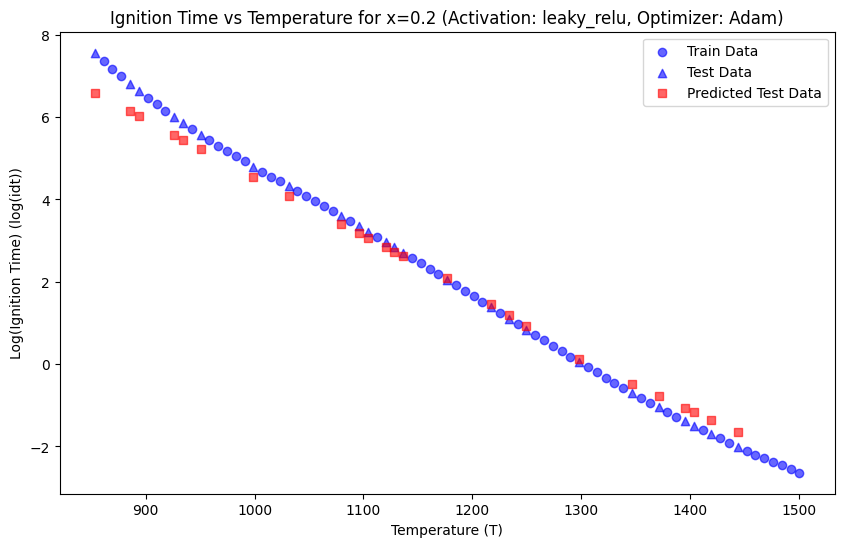

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Results for x=0.2 with activation=leaky_relu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718      -1.509766    4.854483
1   0.2  0.8  0.5   853.5354    7.562421      -1.113281    8.675703
2   0.2  0.8  0.5  1031.3130    4.316119      -1.413086    5.729205
3   0.2  0.8  0.5  1104.0400    3.219191      -1.534180    4.753371
4   0.2  0.8  0.5   998.9899    4.797872      -1.357422    6.155294
5   0.2  0.8  0.5  1079.7980    3.592467      -1.482422    5.074889
6   0.2  0.8  0.5   934.3434    5.850882      -1.260742    7.111624
7   0.2  0.8  0.5  1419.1920   -1.704948      -2.060547    0.355599
8   0.2  0.8  0.5   885.8586    6.810114   

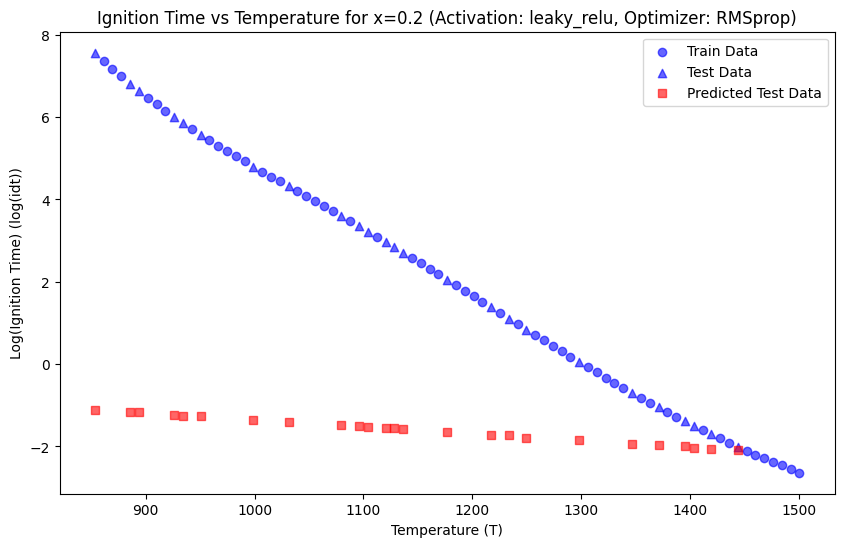

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 54: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 59: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 59: early stopping
Restoring model weights from the end of the best epoch: 49.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Results for x=0.2 with activation=leaky_relu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       3.302734    0.041983
1   0.2  0.8  0.5   853.5354    7.562421       6.703125    0.859296
2   0.2  0.8  0.5  1031.3130    4.316119       4.214844    0.101275
3   0.2  0.8  0.5  1104.0400    3.219191       3.189453    0.029738
4   0.2  0.8  0.5   998.9899    4.797872       4.664062    0.133809
5   0.2  0.8  0.5  1079.7980    3.592467       3.529297    0.063170
6   0.2  0.8  0.5   934.3434    5.850882       5.566406    0.284476
7   0.2  0.8  0.5  1419.1920   -1.704948      -1.669922   -0.035026
8   0.2  0.8  0.5   885.8586    6.810114     

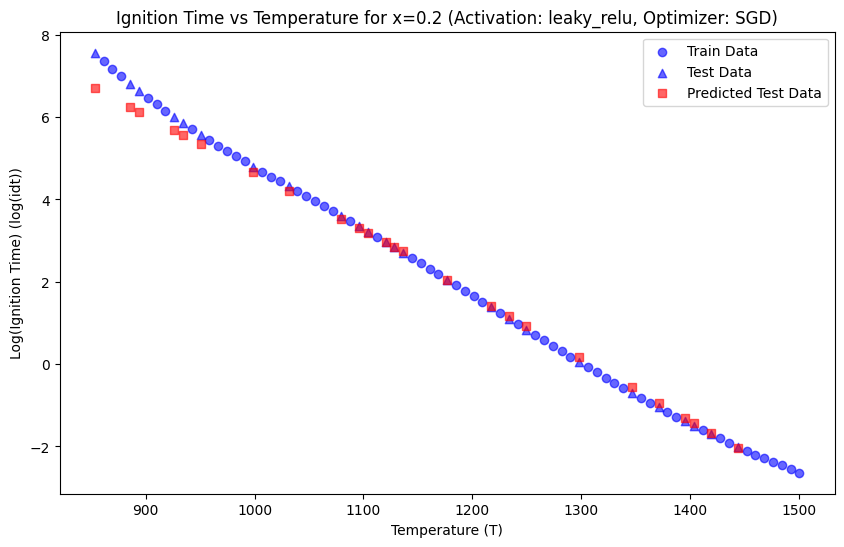

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Results for x=0.2 with activation=elu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       1.651367    1.693350
1   0.2  0.8  0.5   853.5354    7.562421       1.003906    6.558515
2   0.2  0.8  0.5  1031.3130    4.316119       1.476562    2.839557
3   0.2  0.8  0.5  1104.0400    3.219191       1.667969    1.551223
4   0.2  0.8  0.5   998.9899    4.797872       1.395508    3.402364
5   0.2  0.8  0.5  1079.7980    3.592467       1.602539    1.989928
6   0.2  0.8  0.5   934.3434    5.850882       1.222656    4.628226
7   0.2  0.8  0.5  1419.1920   -1.704948       2.519531   -4.224479
8   0.2  0.8  0.5   885.8586    6.810114       1.0917

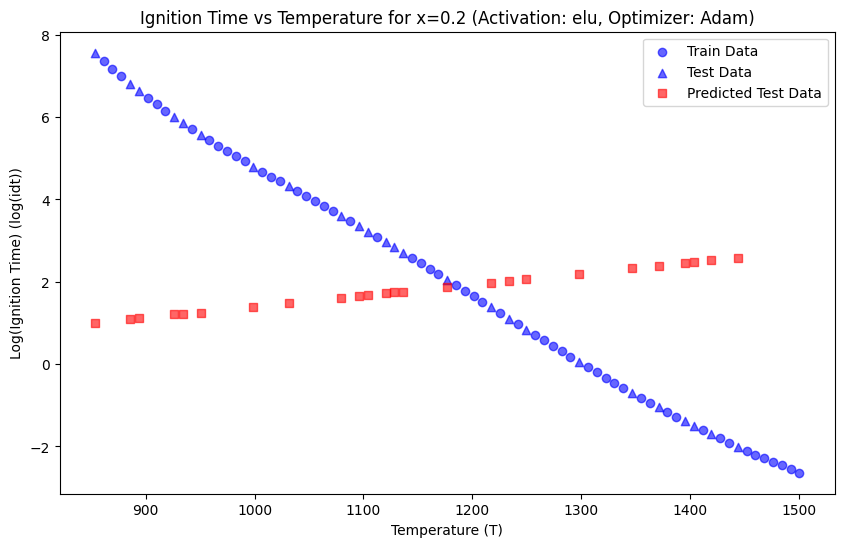

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 36: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 47: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 52: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 52: early stopping
Restoring model weights from the end of the best epoch: 42.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Results for x=0.2 with activation=elu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       3.261719    0.082999
1   0.2  0.8  0.5   853.5354    7.562421       6.484375    1.078046
2   0.2  0.8  0.5  1031.3130    4.316119       4.140625    0.175494
3   0.2  0.8  0.5  1104.0400    3.219191       3.152344    0.066848
4   0.2  0.8  0.5   998.9899    4.797872       4.562500    0.235372
5   0.2  0.8  0.5  1079.7980    3.592467       3.484375    0.108092
6   0.2  0.8  0.5   934.3434    5.850882       5.410156    0.440726
7   0.2  0.8  0.5  1419.1920   -1.704

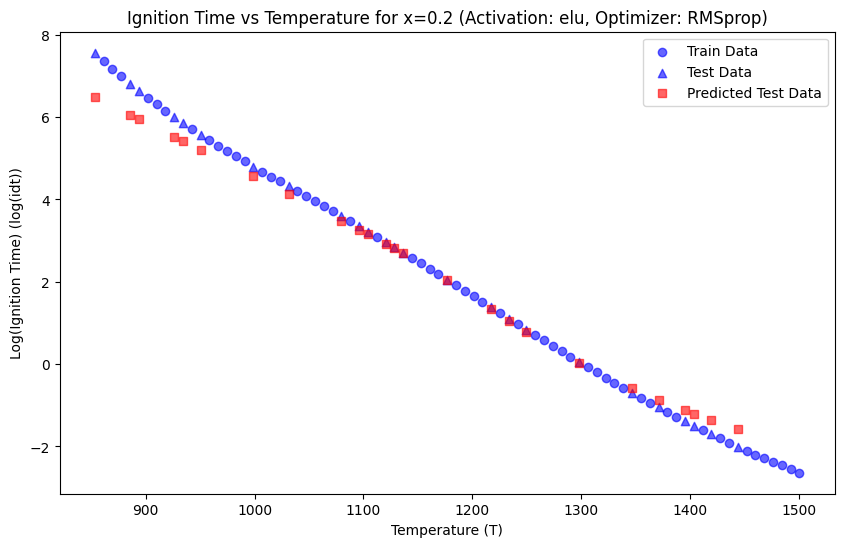

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Results for x=0.2 with activation=elu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718      -1.590820    4.935538
1   0.2  0.8  0.5   853.5354    7.562421      -1.222656    8.785078
2   0.2  0.8  0.5  1031.3130    4.316119      -1.485352    5.801471
3   0.2  0.8  0.5  1104.0400    3.219191      -1.608398    4.827590
4   0.2  0.8  0.5   998.9899    4.797872      -1.449219    6.247091
5   0.2  0.8  0.5  1079.7980    3.592467      -1.565430    5.157897
6   0.2  0.8  0.5   934.3434    5.850882      -1.334961    7.185843
7   0.2  0.8  0.5  1419.1920   -1.704948      -2.080078    0.375130
8   0.2  0.8  0.5   885.8586    6.810114      -1.27343

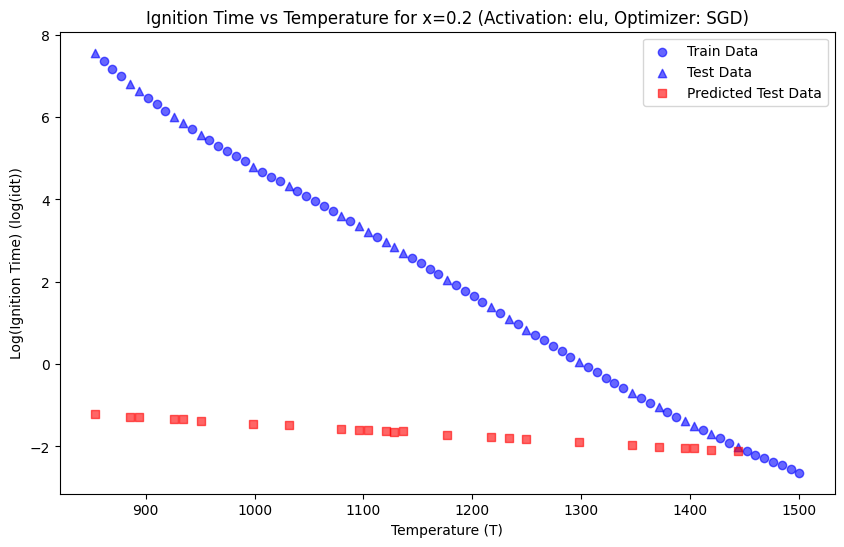

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Results for x=0.2 with activation=selu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718      -0.478027    3.822745
1   0.2  0.8  0.5   853.5354    7.562421      -0.128540    7.690962
2   0.2  0.8  0.5  1031.3130    4.316119      -0.384277    4.700396
3   0.2  0.8  0.5  1104.0400    3.219191      -0.492920    3.712111
4   0.2  0.8  0.5   998.9899    4.797872      -0.332275    5.130147
5   0.2  0.8  0.5  1079.7980    3.592467      -0.443359    4.035826
6   0.2  0.8  0.5   934.3434    5.850882      -0.233154    6.084036
7   0.2  0.8  0.5  1419.1920   -1.704948      -0.952148   -0.752800
8   0.2  0.8  0.5   885.8586    6.810114      -0.188

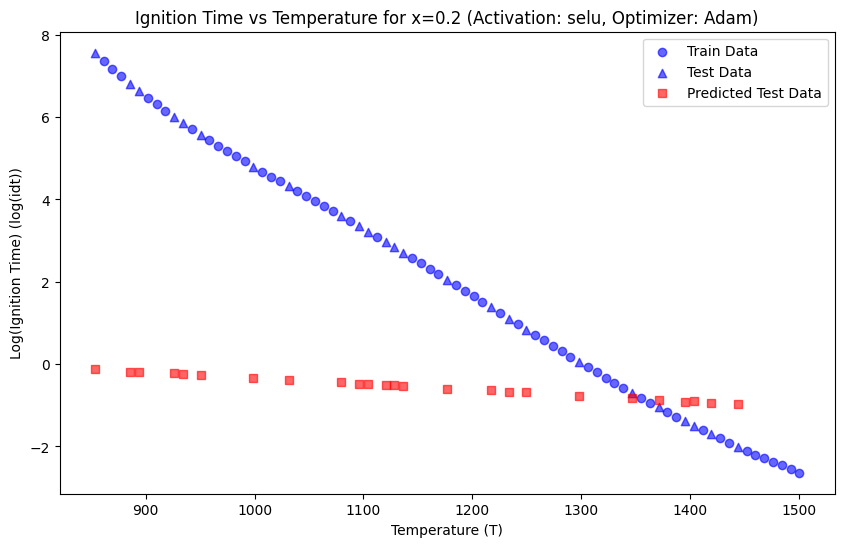

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 3.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Results for x=0.2 with activation=selu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       1.229492    2.115225
1   0.2  0.8  0.5   853.5354    7.562421       0.562012    7.000410
2   0.2  0.8  0.5  1031.3130    4.316119       1.071289    3.244830
3   0.2  0.8  0.5  1104.0400    3.219191       1.251953    1.967238
4   0.2  0.8  0.5   998.9899    4.797872       0.985352    3.812520
5   0.2  0.8  0.5  1079.7980    3.592467       1.192383    2.400084
6   0.2  0.8  0.5   934.3434    5.850882       0.804688    5.046194
7   0.2  0.8  0.5  1419.1920   -1.704948       1.927734   -3.632683
8   0.2  0.8  0.5   885.8586    6.810114       0.

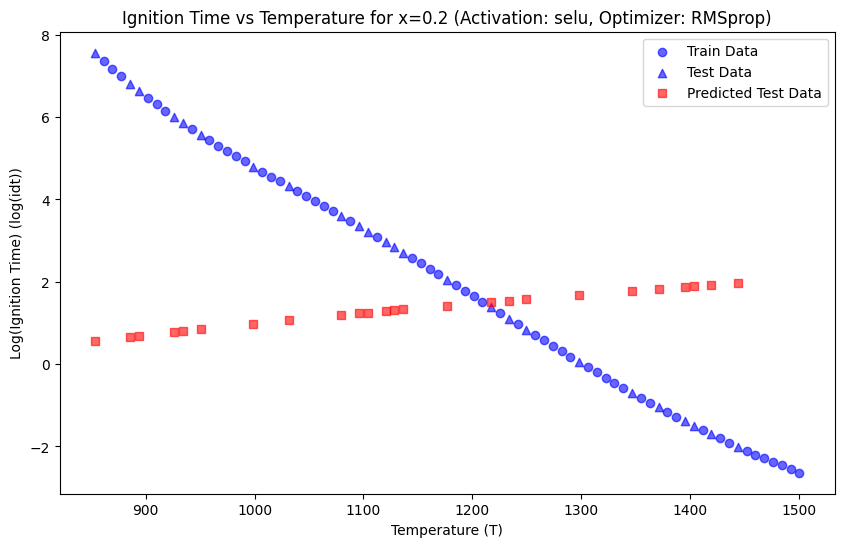

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 84: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 89: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 89: early stopping
Restoring model weights from the end of the best epoch: 79.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Results for x=0.2 with activation=selu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       3.601562   -0.256845
1   0.2  0.8  0.5   853.5354    7.562421       5.910156    1.652265
2   0.2  0.8  0.5  1031.3130    4.316119       4.449219   -0.133100
3   0.2  0.8  0.5  1104.0400    3.219191       3.472656   -0.253465
4   0.2  0.8  0.5   998.9899    4.797872       4.785156    0.012716
5   0.2  0.8  0.5  1079.7980    3.592467       3.832031   -0.239564
6   0.2  0.8  0.5   934.3434    5.850882       5.351562    0.499319
7   0.2  0.8  0.5  1419.1920   -1.704948 

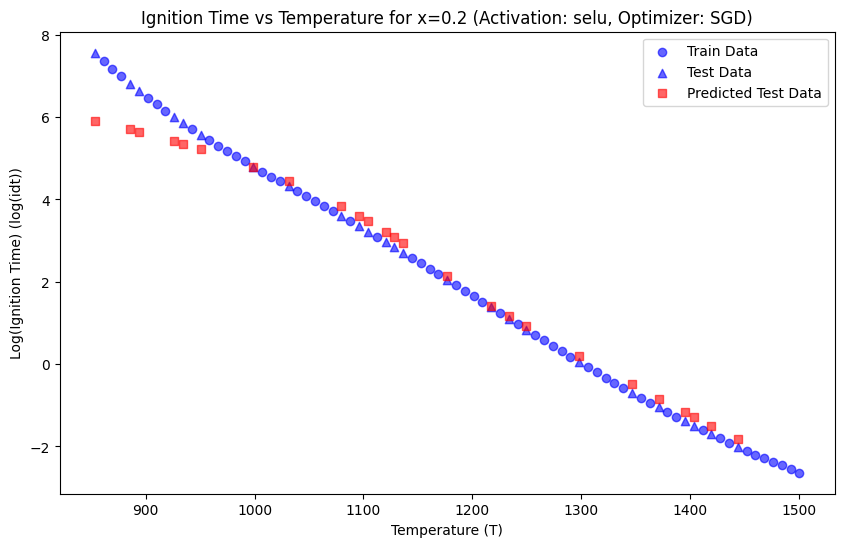

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 43: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 48: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 48: early stopping
Restoring model weights from the end of the best epoch: 38.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Results for x=0.2 with activation=softplus and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       2.605469    0.739249
1   0.2  0.8  0.5   853.5354    7.562421       5.617188    1.945234
2   0.2  0.8  0.5  1031.3130    4.316119       3.375000    0.941119
3   0.2  0.8  0.5  1104.0400    3.219191       2.511719    0.707473
4   0.2  0.8  0.5   998.9899    4.797872       3.765625    1.032247
5   0.2  0.8  0.5  1079.7980    3.592467       2.789062    0.803405
6   0.2  0.8  0.5   934.3434    5.850882       4.574219    1.276663
7   0.2  0.8  0.5  1419.1920   -1.70

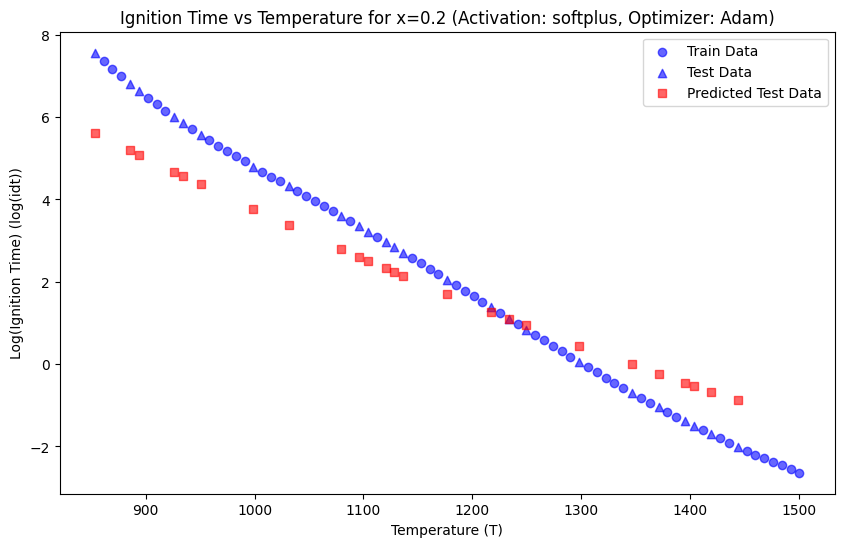

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 58: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 63: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 63: early stopping
Restoring model weights from the end of the best epoch: 53.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Results for x=0.2 with activation=softplus and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       3.183594    0.161124
1   0.2  0.8  0.5   853.5354    7.562421       6.250000    1.312421
2   0.2  0.8  0.5  1031.3130    4.316119       4.035156    0.280963
3   0.2  0.8  0.5  1104.0400    3.219191       3.082031    0.137160
4   0.2  0.8  0.5   998.9899    4.797872       4.449219    0.348653
5   0.2  0.8  0.5  1079.7980    3.592467       3.390625    0.201842
6   0.2  0.8  0.5   934.3434    5.850882       5.257812    0.593069
7   0.2  0.8  0.5  1419.1920   -1.704948      -1.241211   -0.463737
8   0.2  0.8  0.5   885.8586    6.810114  

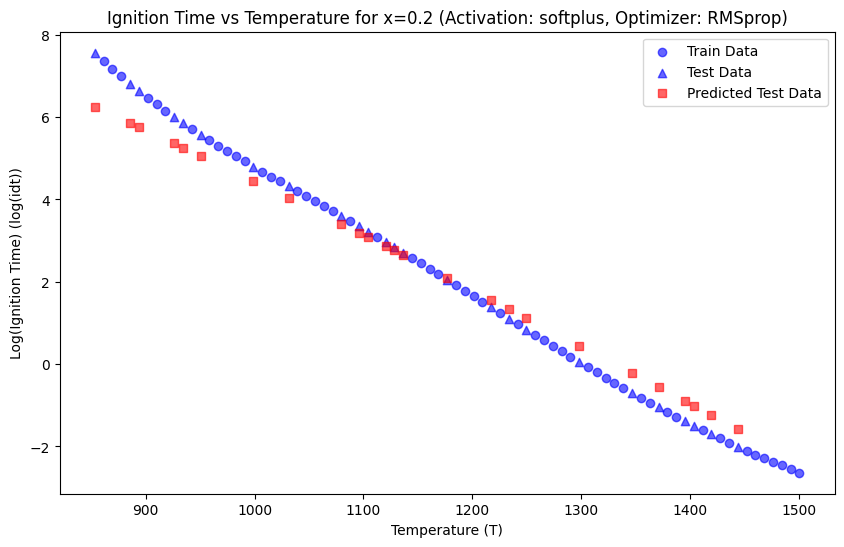

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 79: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 84: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 84: early stopping
Restoring model weights from the end of the best epoch: 74.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Results for x=0.2 with activation=softplus and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       3.476562   -0.131845
1   0.2  0.8  0.5   853.5354    7.562421       6.472656    1.089765
2   0.2  0.8  0.5  1031.3130    4.316119       4.335938   -0.019818
3   0.2  0.8  0.5  1104.0400    3.219191       3.365234   -0.146043
4   0.2  0.8  0.5   998.9899    4.797872       4.742188    0.055684
5   0.2  0.8  0.5  1079.7980    3.592467       3.691406   -0.098939
6   0.2  0.8  0.5   934.3434    5.850882       5.539062    0.311819
7   0.2  0.8  0.5  1419.1920   -1.704

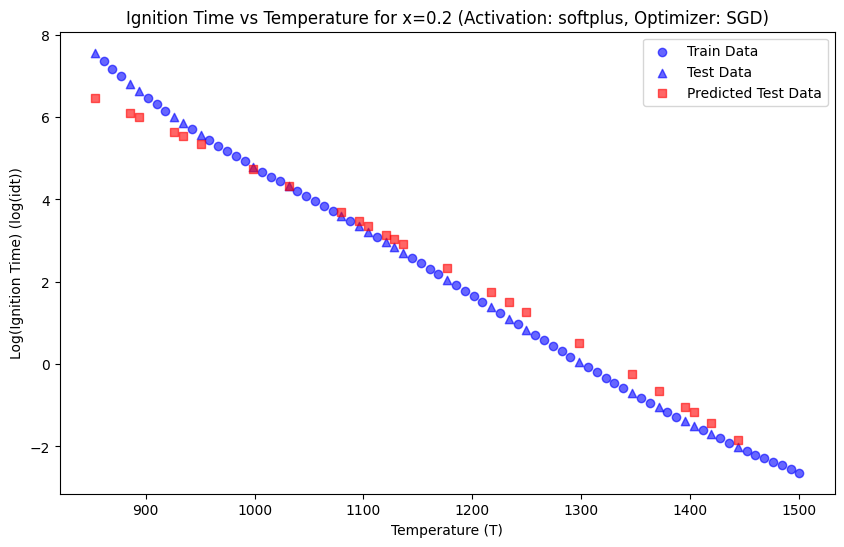

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 29: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 29: early stopping
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Results for x=0.2 with activation=swish and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       2.035156    1.309561
1   0.2  0.8  0.5   853.5354    7.562421       3.333984    4.228437
2   0.2  0.8  0.5  1031.3130    4.316119       2.408203    1.907916
3   0.2  0.8  0.5  1104.0400    3.219191       1.989258    1.229934
4   0.2  0.8  0.5   998.9899    4.797872       2.583984    2.213887
5   0.2  0.8  0.5  1079.7980    3.592467       2.132812    1.459655
6   0.2  0.8  0.5   934.3434    5.850882       2.925781    2.925101
7   0.2  0.8  0.5  1419.1920   -1.704948      -0.135986   -1.568962
8   0.2  0.8  0.5   885.8586    6.810114       3

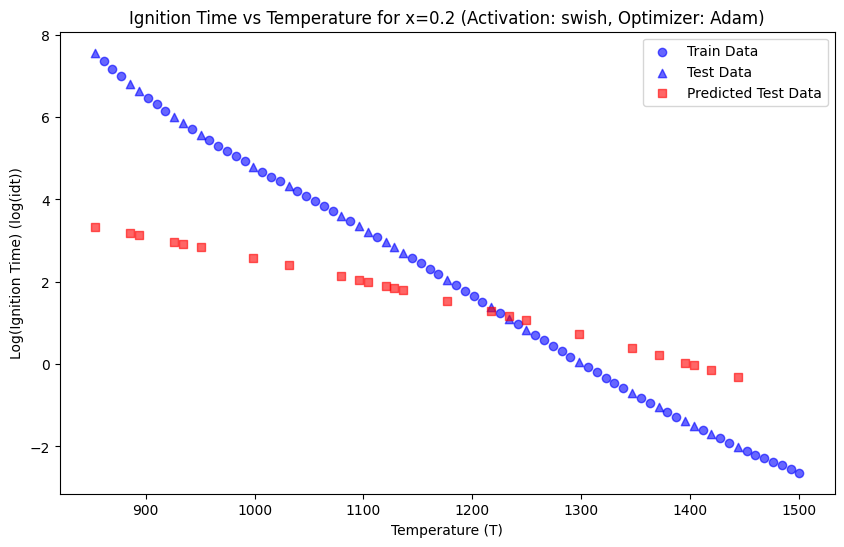

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 39: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 39: early stopping
Restoring model weights from the end of the best epoch: 29.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Results for x=0.2 with activation=swish and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       3.392578   -0.047860
1   0.2  0.8  0.5   853.5354    7.562421       6.070312    1.492109
2   0.2  0.8  0.5  1031.3130    4.316119       4.218750    0.097369
3   0.2  0.8  0.5  1104.0400    3.219191       3.287109   -0.067918
4   0.2  0.8  0.5   998.9899    4.797872       4.601562    0.196309
5   0.2  0.8  0.5  1079.7980    3.592467       3.603516   -0.011049
6   0.2  0.8  0.5   934.3434    5.850882       5.300781    0.550101
7   0.2  0.8  0.5  1419.1920   -1.704948      -1.163086   -0.541862
8   0.2  0.8  0.5   885.8586    6.810114     

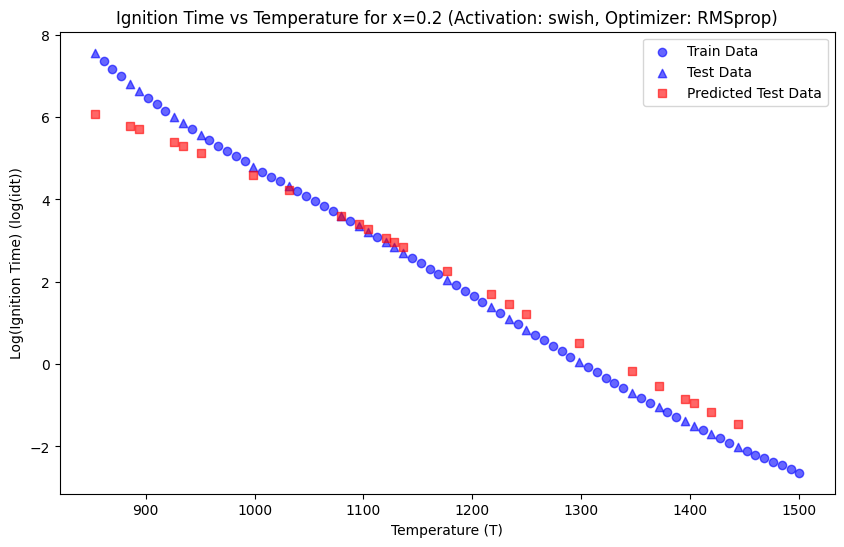

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 65: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 70: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 70: early stopping
Restoring model weights from the end of the best epoch: 60.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Results for x=0.2 with activation=swish and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       2.988281    0.356436
1   0.2  0.8  0.5   853.5354    7.562421       6.320312    1.242109
2   0.2  0.8  0.5  1031.3130    4.316119       3.859375    0.456744
3   0.2  0.8  0.5  1104.0400    3.219191       2.878906    0.340285
4   0.2  0.8  0.5   998.9899    4.797872       4.289062    0.508809
5   0.2  0.8  0.5  1079.7980    3.592467       3.203125    0.389342
6   0.2  0.8  0.5   934.3434    5.850882       5.175781    0.675101
7   0.2  0.8  0.5  1419.1920   -1.704948      -1.415039   -0.289909
8   0.2  0.8  0.5   885.8586    6.810114       5.

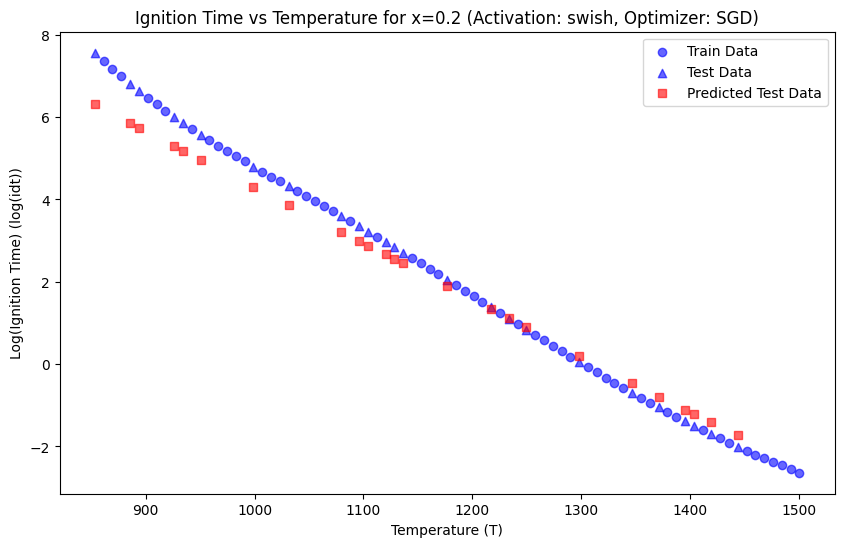

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 29: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 34: early stopping
Restoring model weights from the end of the best epoch: 24.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Results for x=0.2 with activation=gelu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       2.914062    0.430655
1   0.2  0.8  0.5   853.5354    7.562421       5.246094    2.316328
2   0.2  0.8  0.5  1031.3130    4.316119       3.527344    0.788775
3   0.2  0.8  0.5  1104.0400    3.219191       2.841797    0.377395
4   0.2  0.8  0.5   998.9899    4.797872       3.841797    0.956075
5   0.2  0.8  0.5  1079.7980    3.592467       3.064453    0.528014
6   0.2  0.8  0.5   934.3434    5.850882       4.472656    1.378226
7   0.2  0.8  0.5  1419.1920   -1.704948       1.058594   -2.763542
8   0.2  0.8  0.5   885.8586    6.810114       4.

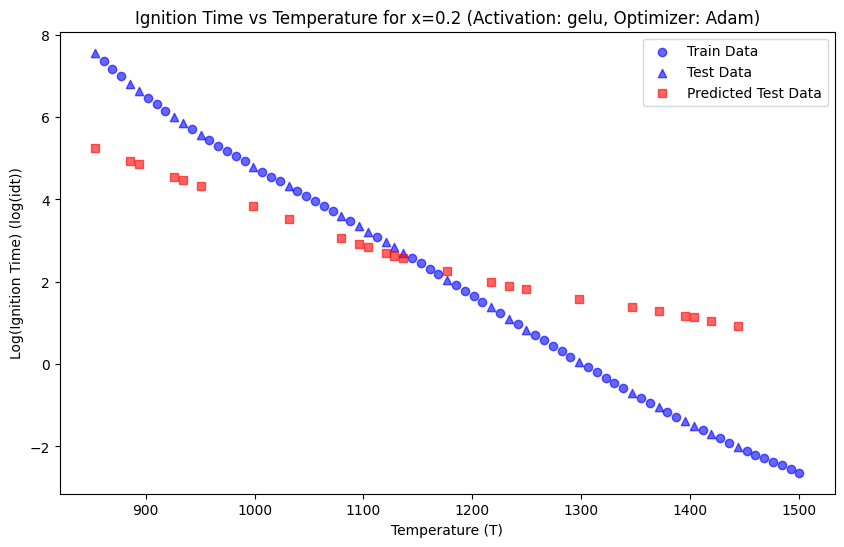

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 2.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Results for x=0.2 with activation=gelu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       0.198242    3.146475
1   0.2  0.8  0.5   853.5354    7.562421       0.105652    7.456770
2   0.2  0.8  0.5  1031.3130    4.316119       0.185059    4.131060
3   0.2  0.8  0.5  1104.0400    3.219191       0.197266    3.021926
4   0.2  0.8  0.5   998.9899    4.797872       0.157959    4.639913
5   0.2  0.8  0.5  1079.7980    3.592467       0.189453    3.403014
6   0.2  0.8  0.5   934.3434    5.850882       0.148682    5.702200
7   0.2  0.8  0.5  1419.1920   -1.704948       0.267090   -1.972038
8   0.2  0.8  0.5   885.8586    6.810114       0

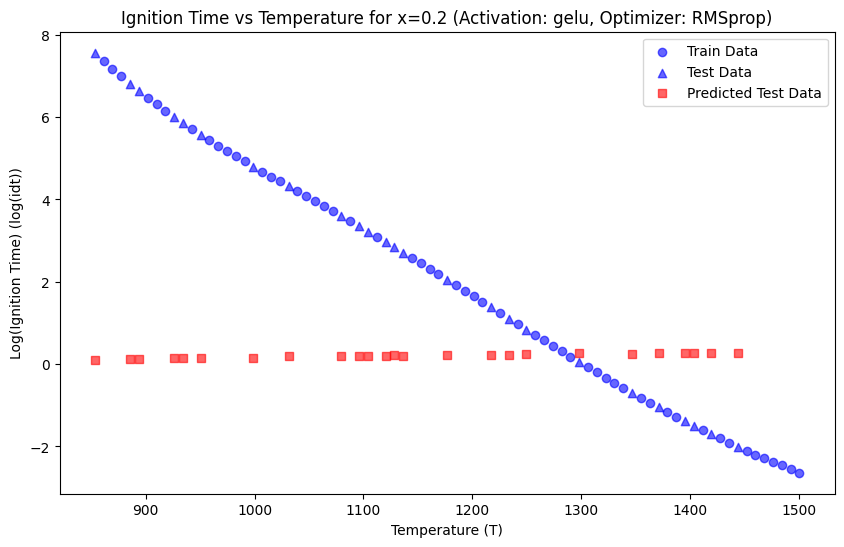

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Results for x=0.2 with activation=gelu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718      -0.238525    3.583243
1   0.2  0.8  0.5   853.5354    7.562421      -0.184814    7.747236
2   0.2  0.8  0.5  1031.3130    4.316119      -0.222534    4.538653
3   0.2  0.8  0.5  1104.0400    3.219191      -0.247803    3.466994
4   0.2  0.8  0.5   998.9899    4.797872      -0.220703    5.018575
5   0.2  0.8  0.5  1079.7980    3.592467      -0.233154    3.825621
6   0.2  0.8  0.5   934.3434    5.850882      -0.200684    6.051565
7   0.2  0.8  0.5  1419.1920   -1.704948      -0.307129   -1.397819
8   0.2  0.8  0.5   885.8586    6.810114      -0.191

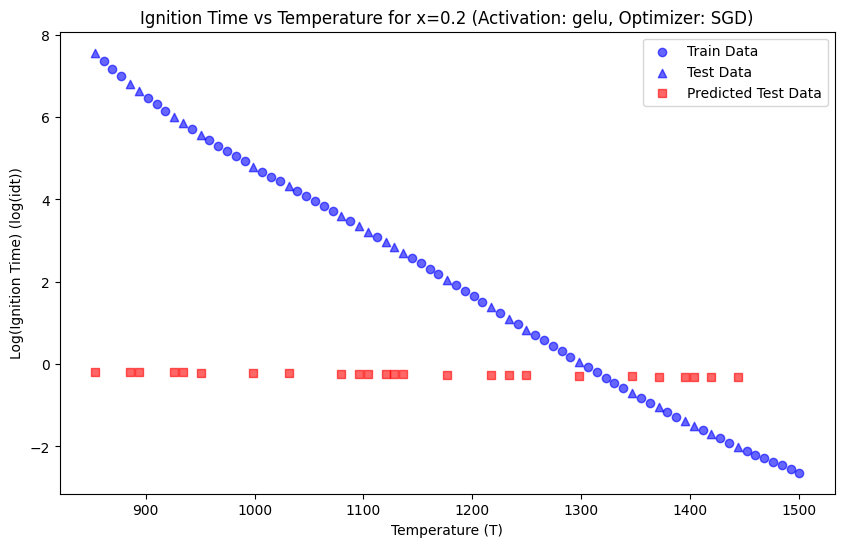

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 40: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 45: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 45: early stopping
Restoring model weights from the end of the best epoch: 35.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Results for x=0.4 with activation=relu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       3.484375   -0.159674
1   0.4  0.6  0.5   861.6162    7.452467       6.121094    1.331374
2   0.4  0.6  0.5  1039.3940    4.321417       4.328125   -0.006708
3   0.4  0.6  0.5  1112.1210    3.194919       3.347656   -0.152737
4   0.4  0.6  0.5  1007.0710    4.802986       4.648438    0.154549
5   0.4  0.6  0.5  1087.8790    3.580634       3.750000   -0.169366
6   0.4  0.6  0.5   942.4242    5.821275       5.300781    0.520493
7   0.4  0.6  0.5  1427.2730   -1.742427      -0.762695   -0.979731
8   0.4  0.6  0.5   893.9394    6.733608       5.

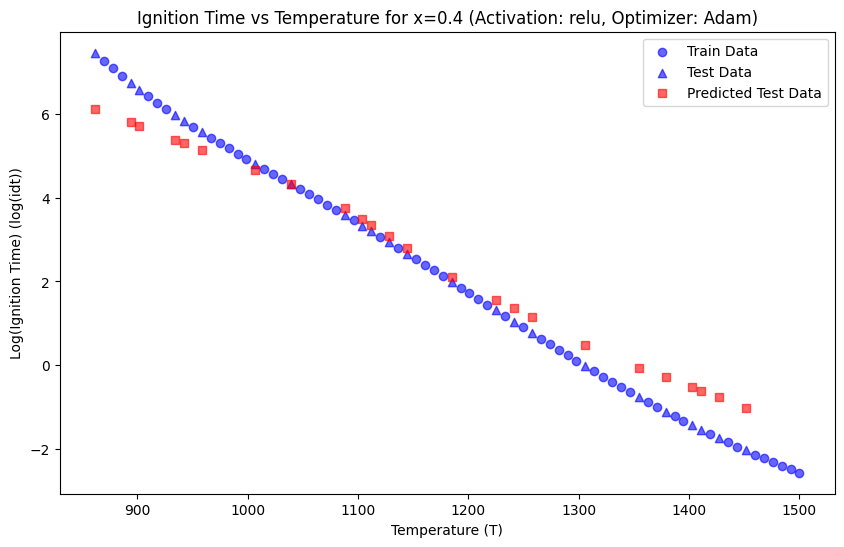

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 42: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 42: early stopping
Restoring model weights from the end of the best epoch: 32.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Results for x=0.4 with activation=relu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       2.724609    0.600092
1   0.4  0.6  0.5   861.6162    7.452467       4.921875    2.530592
2   0.4  0.6  0.5  1039.3940    4.321417       3.400391    0.921027
3   0.4  0.6  0.5  1112.1210    3.194919       2.644531    0.550388
4   0.4  0.6  0.5  1007.0710    4.802986       3.757812    1.045174
5   0.4  0.6  0.5  1087.8790    3.580634       2.888672    0.691962
6   0.4  0.6  0.5   942.4242    5.821275       4.332031    1.489243
7   0.4  0.6  0.5  1427.2730   -1.742427      -0.298828   -1.443598
8   0.4  0.6  0.5   893.9394    6.733608      

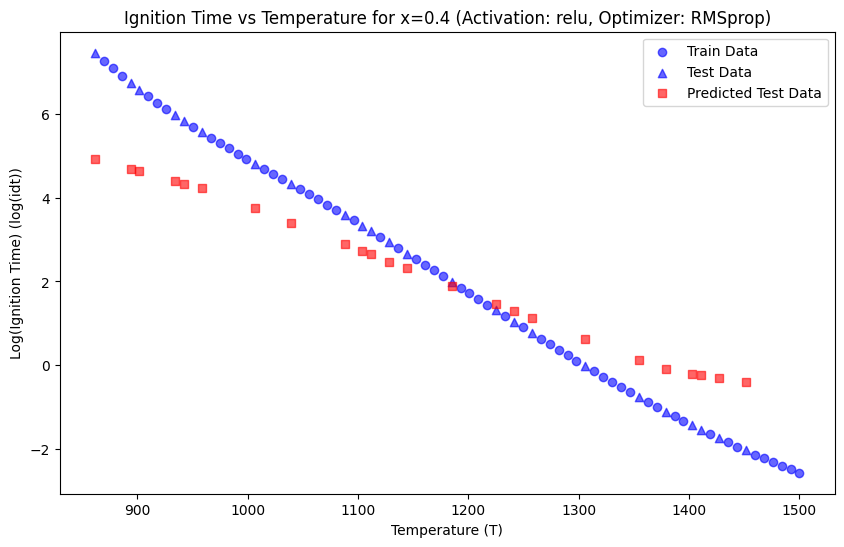

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Restoring model weights from the end of the best epoch: 100.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Results for x=0.4 with activation=relu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       3.115234    0.209467
1   0.4  0.6  0.5   861.6162    7.452467       7.265625    0.186842
2   0.4  0.6  0.5  1039.3940    4.321417       4.226562    0.094855
3   0.4  0.6  0.5  1112.1210    3.194919       2.976562    0.218357
4   0.4  0.6  0.5  1007.0710    4.802986       4.773438    0.029549
5   0.4  0.6  0.5  1087.8790    3.580634       3.384766    0.195868
6   0.4  0.6  0.5   942.4242    5.821275       5.878906   -0.057632
7   0.4  0.6  0.5  1427.2730   -1.742427      -0.593262   -1.149165
8   0.4  0.6  0.5   893.9394    6.733608       6.707031    0.026577
9   0.4  0.6  0.5   958.5859    5.552007       5.605469   -0.053462
10  0.4  0.6  0.

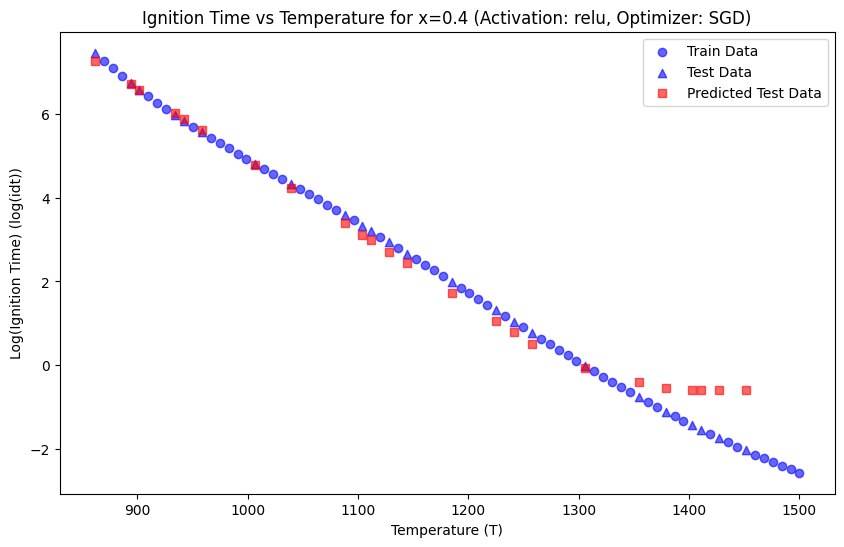

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 39: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 39: early stopping
Restoring model weights from the end of the best epoch: 29.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Results for x=0.4 with activation=leaky_relu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       3.638672   -0.313971
1   0.4  0.6  0.5   861.6162    7.452467       6.863281    0.589186
2   0.4  0.6  0.5  1039.3940    4.321417       4.542969   -0.221551
3   0.4  0.6  0.5  1112.1210    3.194919       3.503906   -0.308987
4   0.4  0.6  0.5  1007.0710    4.802986       4.996094   -0.193108
5   0.4  0.6  0.5  1087.8790    3.580634       3.861328   -0.280694
6   0.4  0.6  0.5   942.4242    5.821275       5.820312    0.000962
7   0.4  0.6  0.5  1427.2730   -1.742427      -1.917969    0.175542
8   0.4  0.6  0.5   893.9394    6.733608   

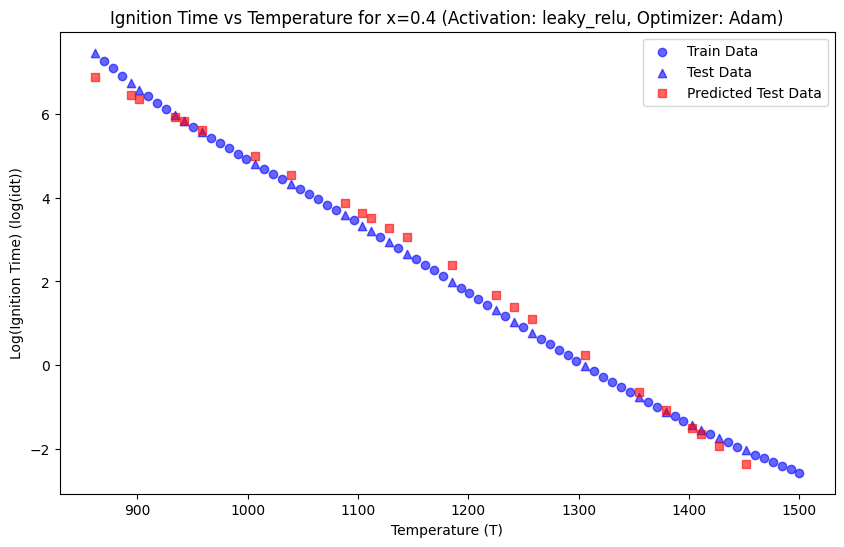

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Results for x=0.4 with activation=leaky_relu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701      -4.734375    8.059076
1   0.4  0.6  0.5   861.6162    7.452467      -3.578125   11.030592
2   0.4  0.6  0.5  1039.3940    4.321417      -4.429688    8.751105
3   0.4  0.6  0.5  1112.1210    3.194919      -4.781250    7.976169
4   0.4  0.6  0.5  1007.0710    4.802986      -4.285156    9.088142
5   0.4  0.6  0.5  1087.8790    3.580634      -4.671875    8.252509
6   0.4  0.6  0.5   942.4242    5.821275      -3.960938    9.782212
7   0.4  0.6  0.5  1427.2730   -1.742427      -6.320312    4.577886
8   0.4  0.6  0.5   893.9394    6.733608  

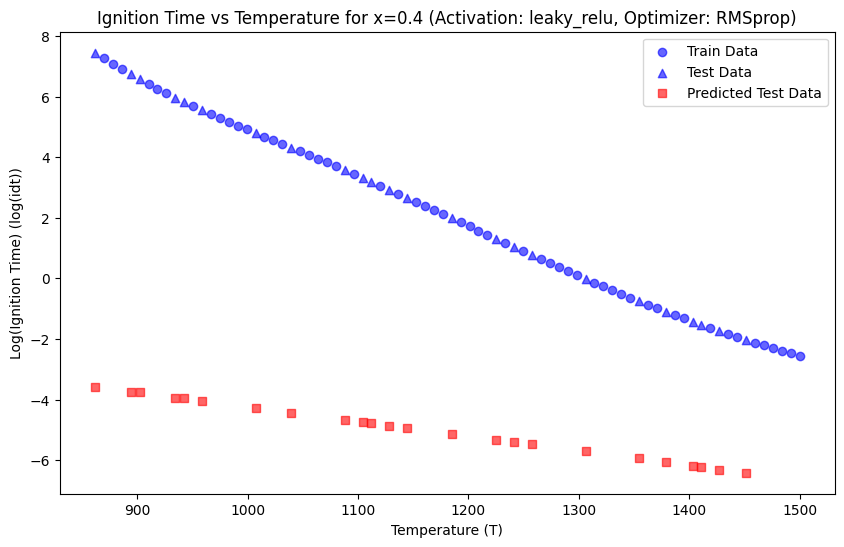

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 70: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 75: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 75: early stopping
Restoring model weights from the end of the best epoch: 65.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Results for x=0.4 with activation=leaky_relu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       3.375000   -0.050299
1   0.4  0.6  0.5   861.6162    7.452467       6.496094    0.956374
2   0.4  0.6  0.5  1039.3940    4.321417       4.210938    0.110480
3   0.4  0.6  0.5  1112.1210    3.194919       3.267578   -0.072659
4   0.4  0.6  0.5  1007.0710    4.802986       4.625000    0.177986
5   0.4  0.6  0.5  1087.8790    3.580634       3.580078    0.000556
6   0.4  0.6  0.5   942.4242    5.821275       5.453125    0.368150
7   0.4  0.6  0.5  1427.2730   -1.742427      -1.630859   -0.111567
8   0.4  0.6  0.5   893.9394    6.733608    

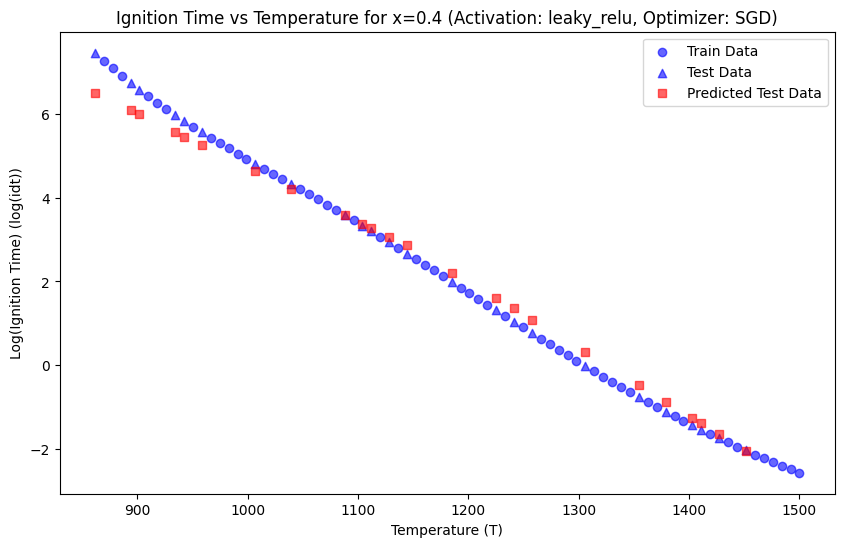

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 32: early stopping
Restoring model weights from the end of the best epoch: 22.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Results for x=0.4 with activation=elu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       2.869141    0.455560
1   0.4  0.6  0.5   861.6162    7.452467       4.886719    2.565749
2   0.4  0.6  0.5  1039.3940    4.321417       3.474609    0.846808
3   0.4  0.6  0.5  1112.1210    3.194919       2.787109    0.407810
4   0.4  0.6  0.5  1007.0710    4.802986       3.753906    1.049080
5   0.4  0.6  0.5  1087.8790    3.580634       3.025391    0.555243
6   0.4  0.6  0.5   942.4242    5.821275       4.277344    1.543931
7   0.4  0.6  0.5  1427.2730   -1.742427      -1.149414   -0.593013
8   0.4  0.6  0.5   893.9394    6.733608       4.6

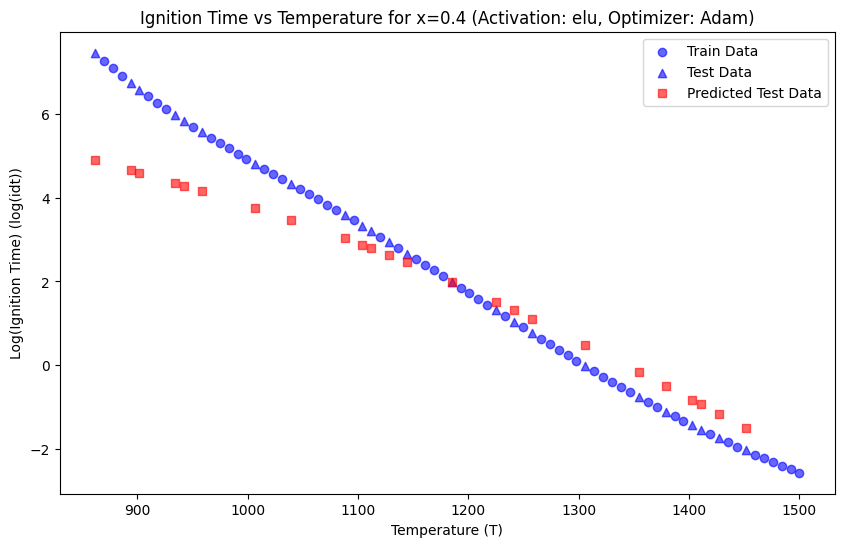

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 30: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 54: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 59: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 59: early stopping
Restoring model weights from the end of the best epoch: 49.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Results for x=0.4 with activation=elu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       3.107422    0.217279
1   0.4  0.6  0.5   861.6162    7.452467       5.472656    1.979811
2   0.4  0.6  0.5  1039.3940    4.321417       3.789062    0.532355
3   0.4  0.6  0.5  1112.1210    3.194919       3.019531    0.175388
4   0.4  0.6  0.5  1007.0710    4.802986       4.113281    0.689705
5   0.4  0.6  0.5  1087.8790    3.580634       3.279297    0.301337
6   0.4  0.6  0.5   942.4242    5.821275       4.738281    1.082993
7   0.4  0.6  0.5  1427.2730   -1.742

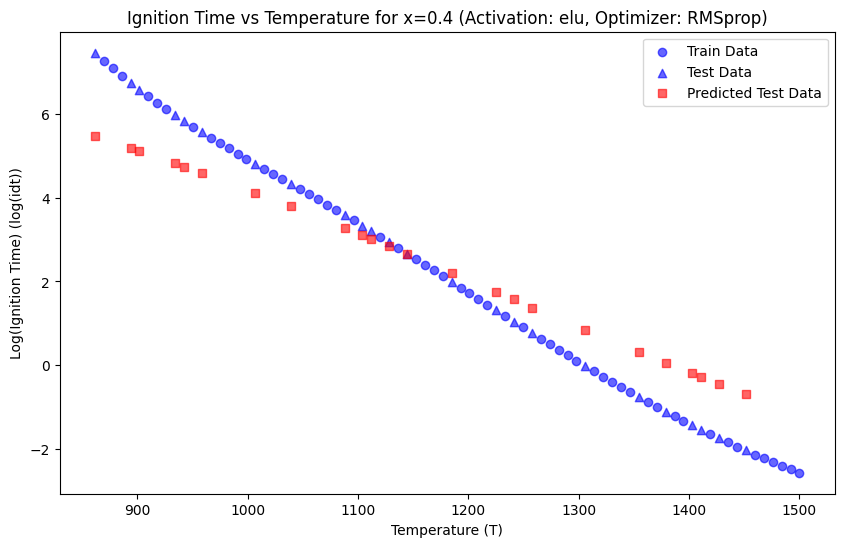

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 61: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 66: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 66: early stopping
Restoring model weights from the end of the best epoch: 56.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Results for x=0.4 with activation=elu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       3.468750   -0.144049
1   0.4  0.6  0.5   861.6162    7.452467       6.601562    0.850905
2   0.4  0.6  0.5  1039.3940    4.321417       4.433594   -0.112176
3   0.4  0.6  0.5  1112.1210    3.194919       3.343750   -0.148831
4   0.4  0.6  0.5  1007.0710    4.802986       4.859375   -0.056389
5   0.4  0.6  0.5  1087.8790    3.580634       3.718750   -0.138116
6   0.4  0.6  0.5   942.4242    5.821275       5.667969    0.153306
7   0.4  0.6  0.5  1427.2730   -1.742427      -1.595703   -0.146723
8   0.4  0.6  0.5   893.9394    6.733608       6.23

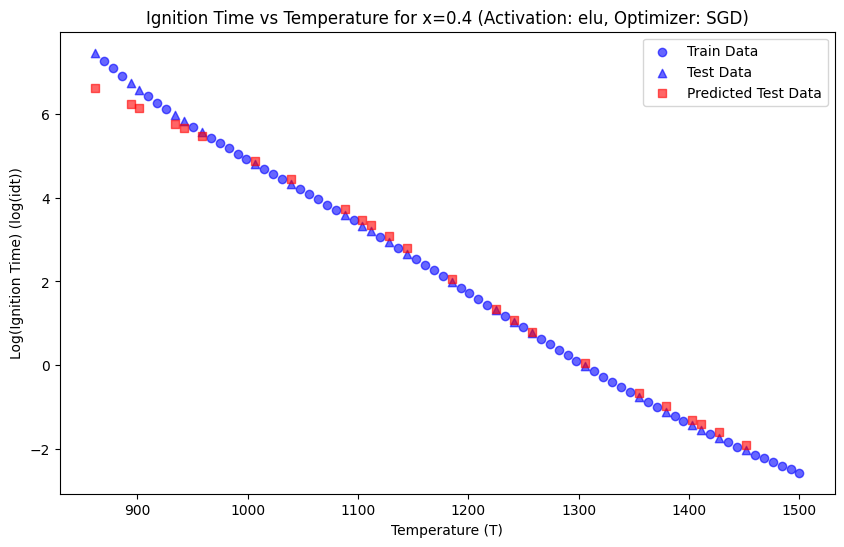

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 29: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 34: early stopping
Restoring model weights from the end of the best epoch: 24.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Results for x=0.4 with activation=selu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       1.401367    1.923334
1   0.4  0.6  0.5   861.6162    7.452467       4.316406    3.136061
2   0.4  0.6  0.5  1039.3940    4.321417       2.193359    2.128058
3   0.4  0.6  0.5  1112.1210    3.194919       1.304688    1.890232
4   0.4  0.6  0.5  1007.0710    4.802986       2.582031    2.220955
5   0.4  0.6  0.5  1087.8790    3.580634       1.613281    1.967353
6   0.4  0.6  0.5   942.4242    5.821275       3.369141    2.452134
7   0.4  0.6  0.5  1427.2730   -1.74242

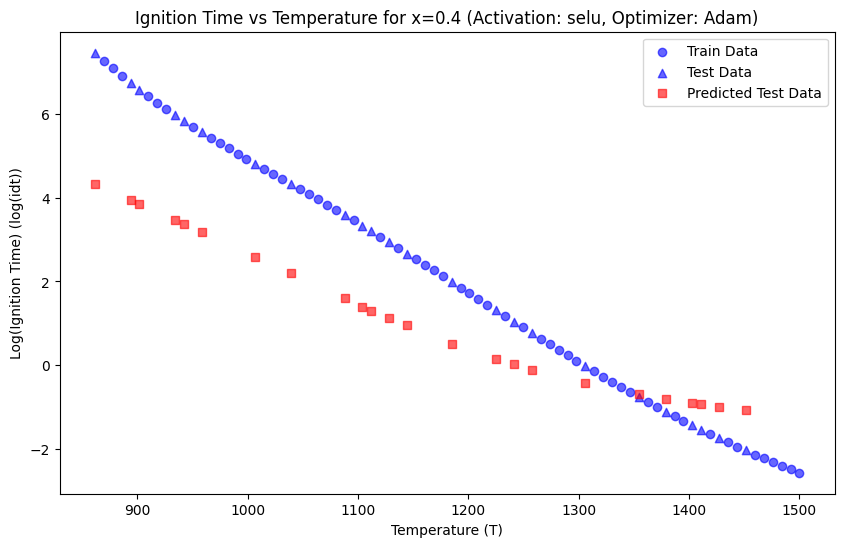

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 39: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 44: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 44: early stopping
Restoring model weights from the end of the best epoch: 34.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Results for x=0.4 with activation=selu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       3.294922    0.029779
1   0.4  0.6  0.5   861.6162    7.452467       5.460938    1.991530
2   0.4  0.6  0.5  1039.3940    4.321417       4.082031    0.239386
3   0.4  0.6  0.5  1112.1210    3.194919       3.185547    0.009372
4   0.4  0.6  0.5  1007.0710    4.802986       4.390625    0.412361
5   0.4  0.6  0.5  1087.8790    3.580634       3.501953    0.078681
6   0.4  0.6  0.5   942.4242    5.821275       4.921875    0.899400
7   0.4  0.6  0.5  1427.2730   -1.742427      -1.517578   -0.224848
8   0.4  0.6  0.5   893.9394    6.733608      

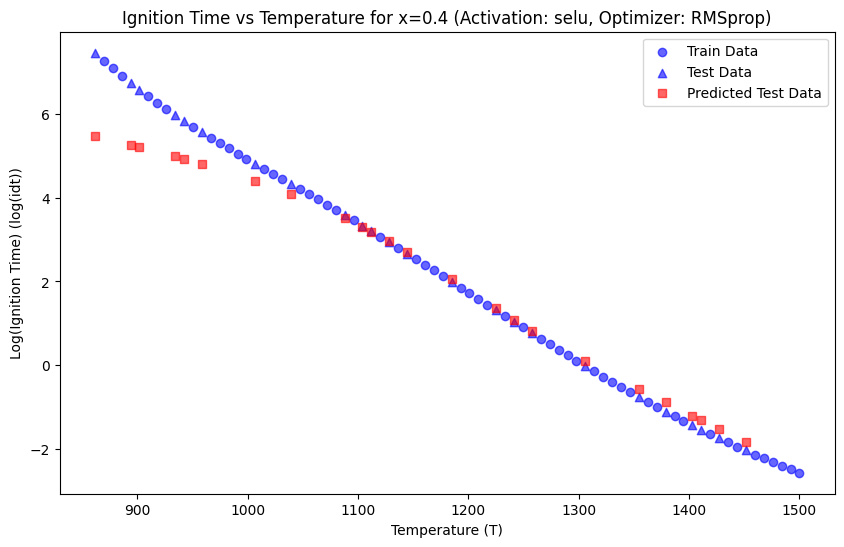

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 2.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Results for x=0.4 with activation=selu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       0.408203    2.916498
1   0.4  0.6  0.5   861.6162    7.452467      -0.610840    8.063307
2   0.4  0.6  0.5  1039.3940    4.321417       0.137329    4.184088
3   0.4  0.6  0.5  1112.1210    3.194919       0.440674    2.754245
4   0.4  0.6  0.5  1007.0710    4.802986       0.001526    4.801460
5   0.4  0.6  0.5  1087.8790    3.580634       0.336670    3.243964
6   0.4  0.6  0.5   942.4242    5.821275      -0.265381    6.086655
7   0.4  0.6  0.5  1427.2730   -1.742427       1.750000   -3.492427
8   0.4  0.6  0.5   893.9394    6.733608      -0.472

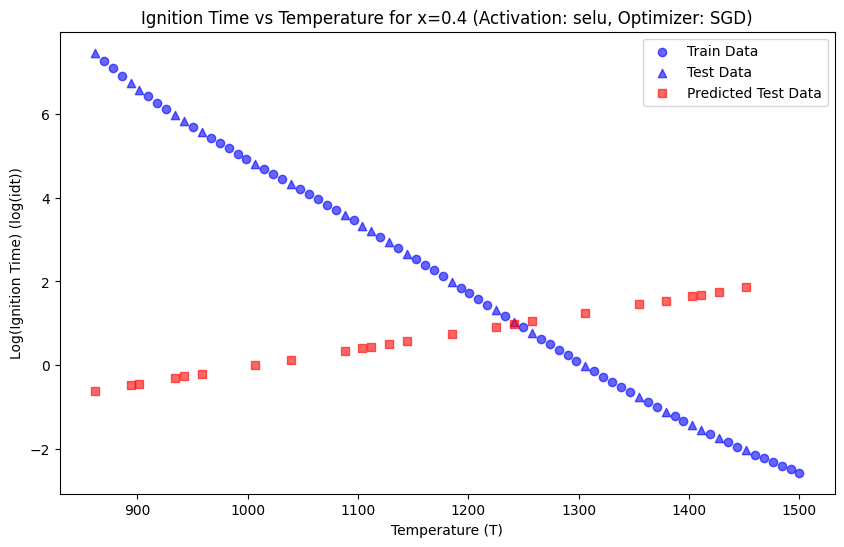

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Results for x=0.4 with activation=softplus and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701      -1.203125    4.527826
1   0.4  0.6  0.5   861.6162    7.452467      -1.009766    8.462233
2   0.4  0.6  0.5  1039.3940    4.321417      -1.138672    5.460089
3   0.4  0.6  0.5  1112.1210    3.194919      -1.201172    4.396091
4   0.4  0.6  0.5  1007.0710    4.802986      -1.110352    5.913338
5   0.4  0.6  0.5  1087.8790    3.580634      -1.184570    4.765204
6   0.4  0.6  0.5   942.4242    5.821275      -1.067383    6.888657
7   0.4  0.6  0.5  1427.2730   -1.742427      -1.480469   -0.261958
8   0.4  0.6  0.5   893.9394    6.733608      -

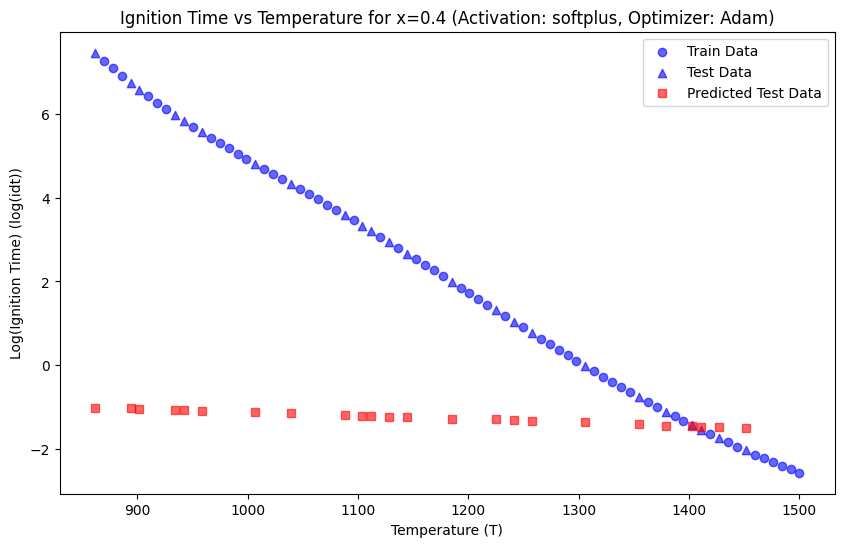

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Results for x=0.4 with activation=softplus and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       0.358154    2.966547
1   0.4  0.6  0.5   861.6162    7.452467       0.238403    7.214064
2   0.4  0.6  0.5  1039.3940    4.321417       0.325928    3.995490
3   0.4  0.6  0.5  1112.1210    3.194919       0.359619    2.835300
4   0.4  0.6  0.5  1007.0710    4.802986       0.301270    4.501717
5   0.4  0.6  0.5  1087.8790    3.580634       0.336182    3.244452
6   0.4  0.6  0.5   942.4242    5.821275       0.273682    5.547593
7   0.4  0.6  0.5  1427.2730   -1.742427       0.489990   -2.232417
8   0.4  0.6  0.5   893.9394    6.733608    

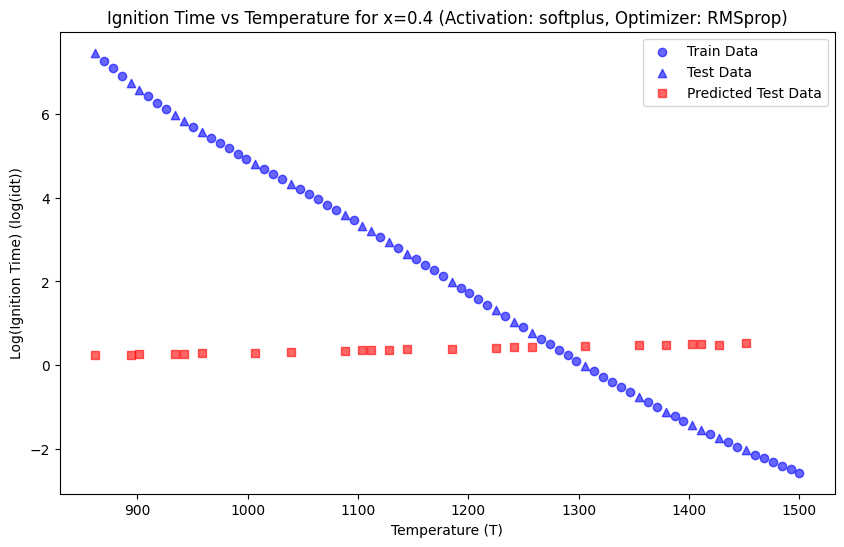

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 69: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 74: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 74: early stopping
Restoring model weights from the end of the best epoch: 64.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Results for x=0.4 with activation=softplus and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       3.085938    0.238764
1   0.4  0.6  0.5   861.6162    7.452467       7.242188    0.210280
2   0.4  0.6  0.5  1039.3940    4.321417       4.152344    0.169074
3   0.4  0.6  0.5  1112.1210    3.194919       2.957031    0.237888
4   0.4  0.6  0.5  1007.0710    4.802986       4.691406    0.111580
5   0.4  0.6  0.5  1087.8790    3.580634       3.343750    0.236884
6   0.4  0.6  0.5   942.4242    5.821275       5.800781    0.020493
7   0.4  0.6  0.5  1427.2730   -1.74

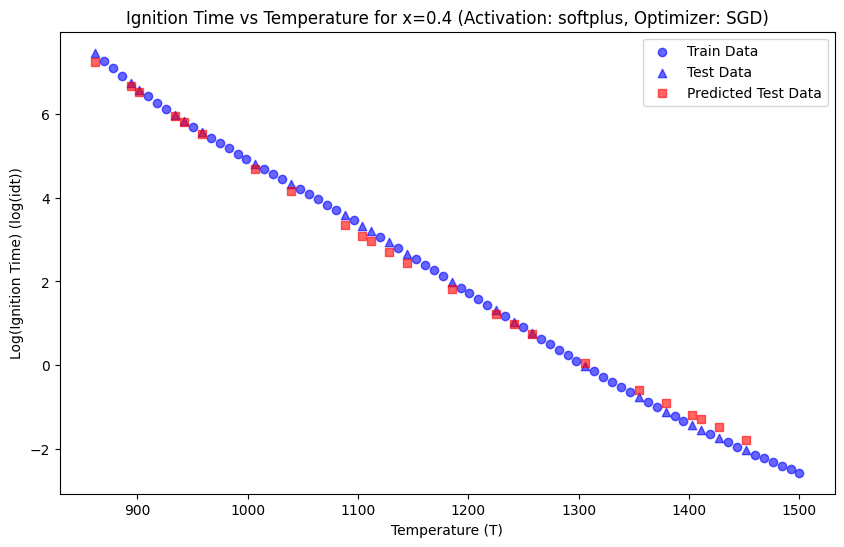

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 51: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 56: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 56: early stopping
Restoring model weights from the end of the best epoch: 46.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Results for x=0.4 with activation=swish and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       2.402344    0.922357
1   0.4  0.6  0.5   861.6162    7.452467       5.339844    2.112624
2   0.4  0.6  0.5  1039.3940    4.321417       3.169922    1.151495
3   0.4  0.6  0.5  1112.1210    3.194919       2.308594    0.886325
4   0.4  0.6  0.5  1007.0710    4.802986       3.552734    1.250252
5   0.4  0.6  0.5  1087.8790    3.580634       2.589844    0.990790
6   0.4  0.6  0.5   942.4242    5.821275       4.335938    1.485337
7   0.4  0.6  0.5  1427.2730   -1.742427      -0.675781   -1.066645
8   0.4  0.6  0.5   893.9394    6.733608       4

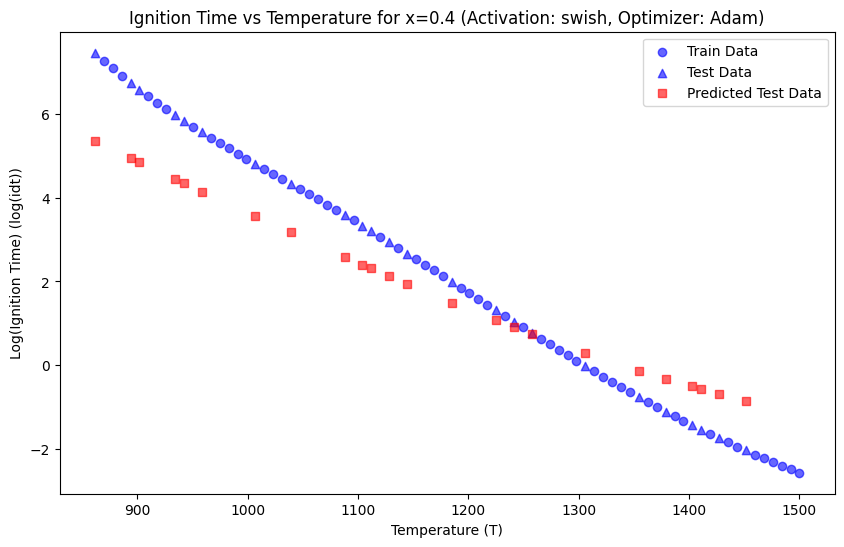

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 38: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 38: early stopping
Restoring model weights from the end of the best epoch: 28.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Results for x=0.4 with activation=swish and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       3.181641    0.143060
1   0.4  0.6  0.5   861.6162    7.452467       5.468750    1.983717
2   0.4  0.6  0.5  1039.3940    4.321417       3.841797    0.479620
3   0.4  0.6  0.5  1112.1210    3.194919       3.097656    0.097263
4   0.4  0.6  0.5  1007.0710    4.802986       4.152344    0.650642
5   0.4  0.6  0.5  1087.8790    3.580634       3.347656    0.232978
6   0.4  0.6  0.5   942.4242    5.821275       4.753906    1.067368
7   0.4  0.6  0.5  1427.2730   -1.742427      -0.647949   -1.094477
8   0.4  0.6  0.5   893.9394    6.733608     

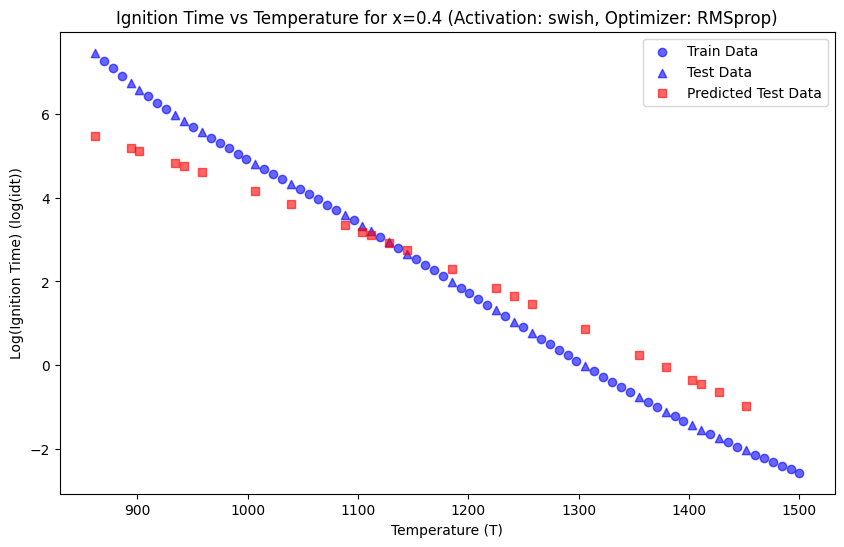

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 99.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Results for x=0.4 with activation=swish and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       3.591797   -0.267096
1   0.4  0.6  0.5   861.6162    7.452467       6.812500    0.639967
2   0.4  0.6  0.5  1039.3940    4.321417       4.492188   -0.170770
3   0.4  0.6  0.5  1112.1210    3.194919       3.482422   -0.287503
4   0.4  0.6  0.5  1007.0710    4.802986       4.933594   -0.130608
5   0.4  0.6  0.5  1087.8790    3.580634       3.814453   -0.233819
6   0.4  0.6  0.5   942.4242    5.821275       5.792969    0.028306
7   0.4  0.6  0.5  1427.2730   -1.742427      -0.740234   -1.002192
8   0.4  0.6  0.5   893.9394    6.733608       6.410156    0.323452
9   0.4  0.6  0.5   958.5859    5.552007       5.582031   -0.030024
10  0.4  0.6  0.5  1257.5760    0.769253       1.486328   -0.717075
11  0.4  0.6  0.5  1128.28

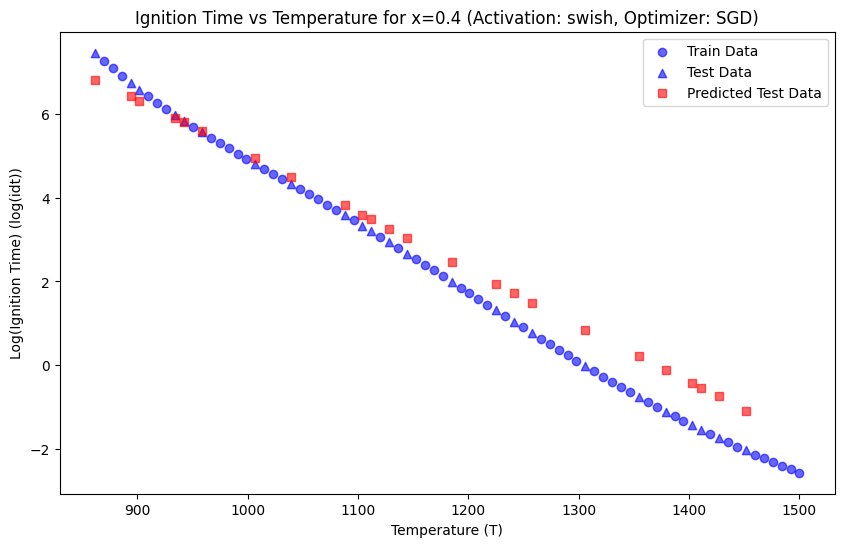

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 27: early stopping
Restoring model weights from the end of the best epoch: 17.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Results for x=0.4 with activation=gelu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       1.949219    1.375482
1   0.4  0.6  0.5   861.6162    7.452467       3.851562    3.600905
2   0.4  0.6  0.5  1039.3940    4.321417       2.496094    1.825324
3   0.4  0.6  0.5  1112.1210    3.194919       1.881836    1.313083
4   0.4  0.6  0.5  1007.0710    4.802986       2.757812    2.045174
5   0.4  0.6  0.5  1087.8790    3.580634       2.082031    1.498603
6   0.4  0.6  0.5   942.4242    5.821275       3.267578    2.553696
7   0.4  0.6  0.5  1427.2730   -1.742427

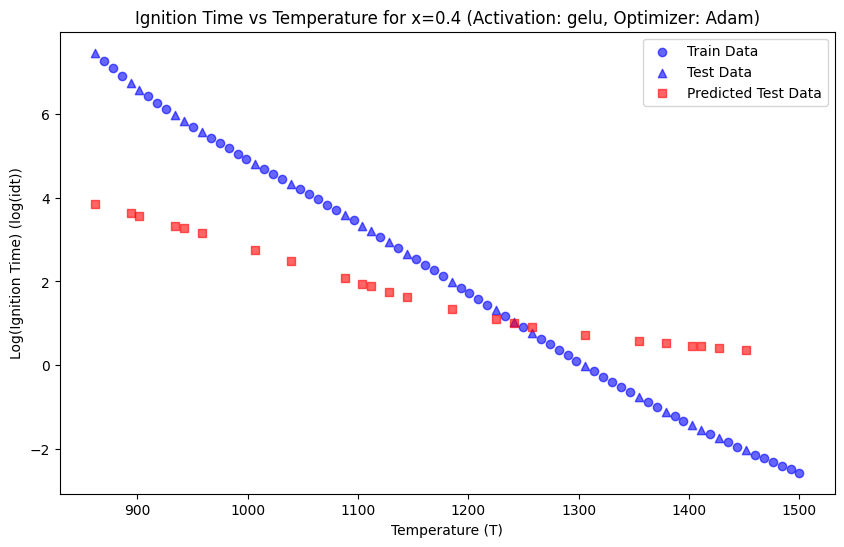

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 37: early stopping
Restoring model weights from the end of the best epoch: 27.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Results for x=0.4 with activation=gelu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       3.005859    0.318842
1   0.4  0.6  0.5   861.6162    7.452467       5.945312    1.507155
2   0.4  0.6  0.5  1039.3940    4.321417       3.863281    0.458136
3   0.4  0.6  0.5  1112.1210    3.194919       2.894531    0.300388
4   0.4  0.6  0.5  1007.0710    4.802986       4.250000    0.552986
5   0.4  0.6  0.5  1087.8790    3.580634       3.230469    0.350165
6   0.4  0.6  0.5   942.4242    5.821275       5.000000    0.821275
7   0.4  0.6  0.5  1427.2730   -1.742427      -1.785156    0.042730
8   0.4  0.6  0.5   893.9394    6.733608      

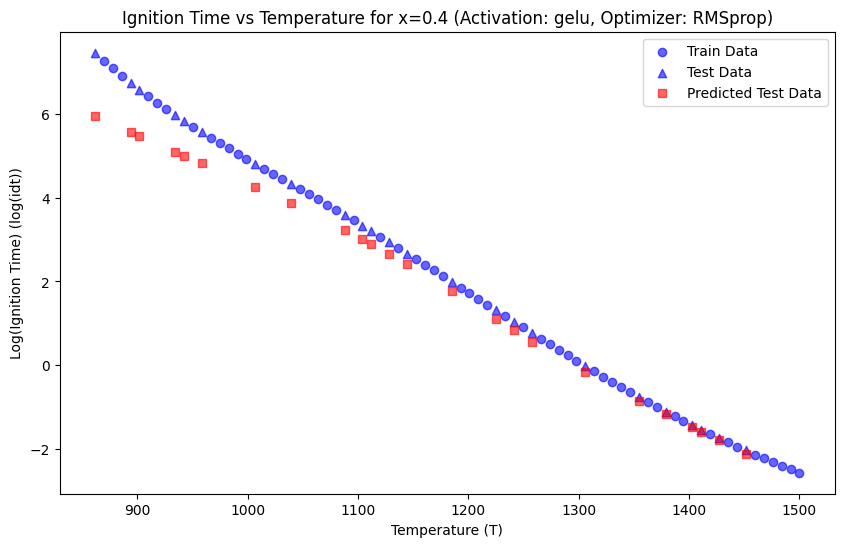

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 2.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Results for x=0.4 with activation=gelu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701      -0.012764    3.337465
1   0.4  0.6  0.5   861.6162    7.452467       0.006287    7.446181
2   0.4  0.6  0.5  1039.3940    4.321417      -0.002205    4.323622
3   0.4  0.6  0.5  1112.1210    3.194919      -0.006325    3.201244
4   0.4  0.6  0.5  1007.0710    4.802986      -0.004463    4.807449
5   0.4  0.6  0.5  1087.8790    3.580634      -0.008476    3.589110
6   0.4  0.6  0.5   942.4242    5.821275      -0.003517    5.824792
7   0.4  0.6  0.5  1427.2730   -1.742427       0.012367   -1.754794
8   0.4  0.6  0.5   893.9394    6.733608       0.004

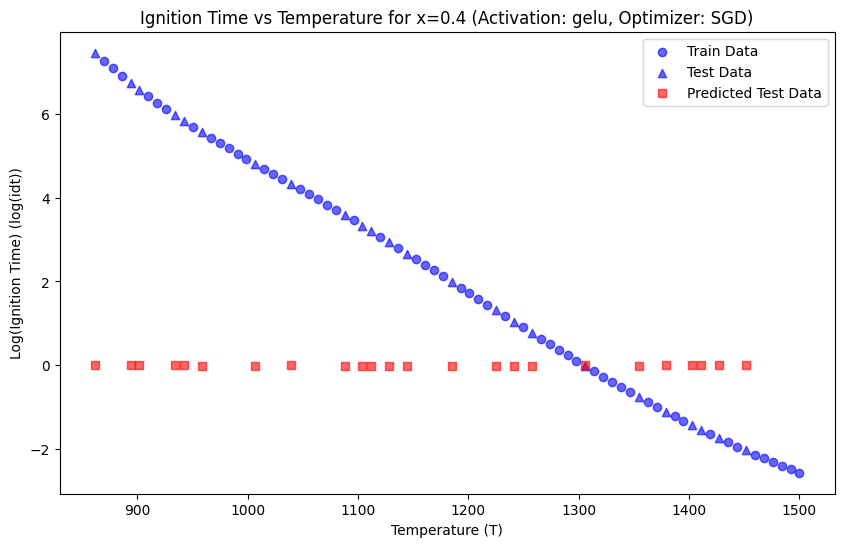

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 36: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 36: early stopping
Restoring model weights from the end of the best epoch: 26.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Results for x=0.6 with activation=relu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       3.291016    0.211508
1   0.6  0.4  0.5   861.6162    7.596330       5.480469    2.115861
2   0.6  0.4  0.5  1039.3940    4.529353       3.773438    0.755916
3   0.6  0.4  0.5  1112.1210    3.368390       3.222656    0.145734
4   0.6  0.4  0.5  1007.0710    5.015671       4.015625    1.000046
5   0.6  0.4  0.5  1087.8790    3.767292       3.406250    0.361042
6   0.6  0.4  0.5   942.4242    6.013630       4.507812    1.505817
7   0.6  0.4  0.5  1427.2730   -1.603043       1.980469   -3.583512
8   0.6  0.4  0.5   893.9394    6.896028       5.

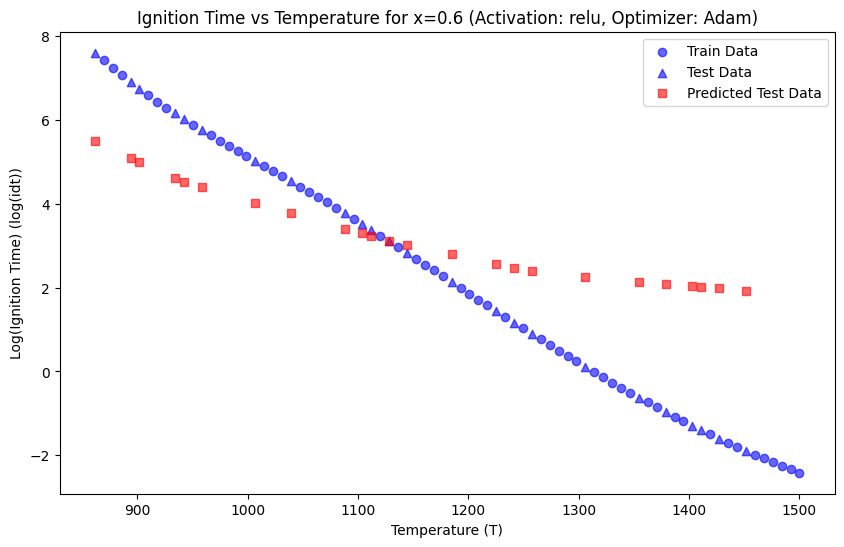

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 8.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Results for x=0.6 with activation=relu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       1.175781    2.326743
1   0.6  0.4  0.5   861.6162    7.596330       0.539062    7.057267
2   0.6  0.4  0.5  1039.3940    4.529353       1.003906    3.525447
3   0.6  0.4  0.5  1112.1210    3.368390       1.198242    2.170148
4   0.6  0.4  0.5  1007.0710    5.015671       0.920410    4.095260
5   0.6  0.4  0.5  1087.8790    3.767292       1.131836    2.635456
6   0.6  0.4  0.5   942.4242    6.013630       0.752441    5.261188
7   0.6  0.4  0.5  1427.2730   -1.603043       2.031250   -3.634293
8   0.6  0.4  0.5   893.9394    6.896028       

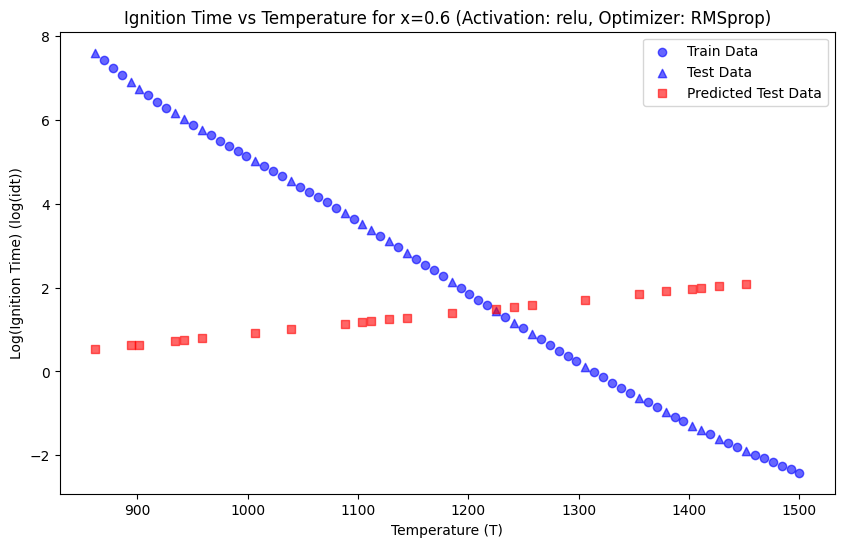

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Results for x=0.6 with activation=relu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524      -0.608887    4.111411
1   0.6  0.4  0.5   861.6162    7.596330      -0.416016    8.012345
2   0.6  0.4  0.5  1039.3940    4.529353      -0.562988    5.092341
3   0.6  0.4  0.5  1112.1210    3.368390      -0.612305    3.980695
4   0.6  0.4  0.5  1007.0710    5.015671      -0.528320    5.543991
5   0.6  0.4  0.5  1087.8790    3.767292      -0.591309    4.358601
6   0.6  0.4  0.5   942.4242    6.013630      -0.479736    6.493366
7   0.6  0.4  0.5  1427.2730   -1.603043      -0.862305   -0.740739
8   0.6  0.4  0.5   893.9394    6.896028      -0.446

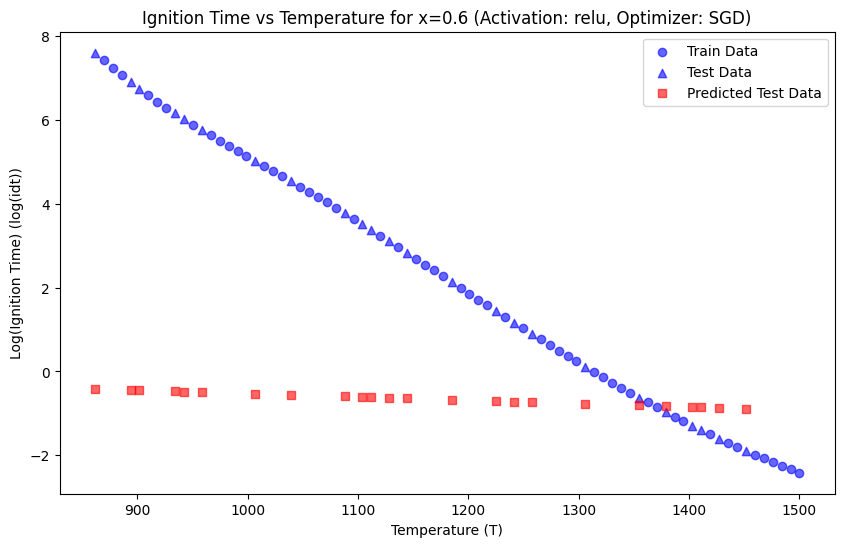

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 38: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 43: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 43: early stopping
Restoring model weights from the end of the best epoch: 33.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Results for x=0.6 with activation=leaky_relu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       2.779297    0.723227
1   0.6  0.4  0.5   861.6162    7.596330       5.781250    1.815080
2   0.6  0.4  0.5  1039.3940    4.529353       3.585938    0.943416
3   0.6  0.4  0.5  1112.1210    3.368390       2.677734    0.690656
4   0.6  0.4  0.5  1007.0710    5.015671       3.980469    1.035202
5   0.6  0.4  0.5  1087.8790    3.767292       2.978516    0.788777
6   0.6  0.4  0.5   942.4242    6.013630       4.777344    1.236286
7   0.6  0.4  0.5  1427.2730   -1.

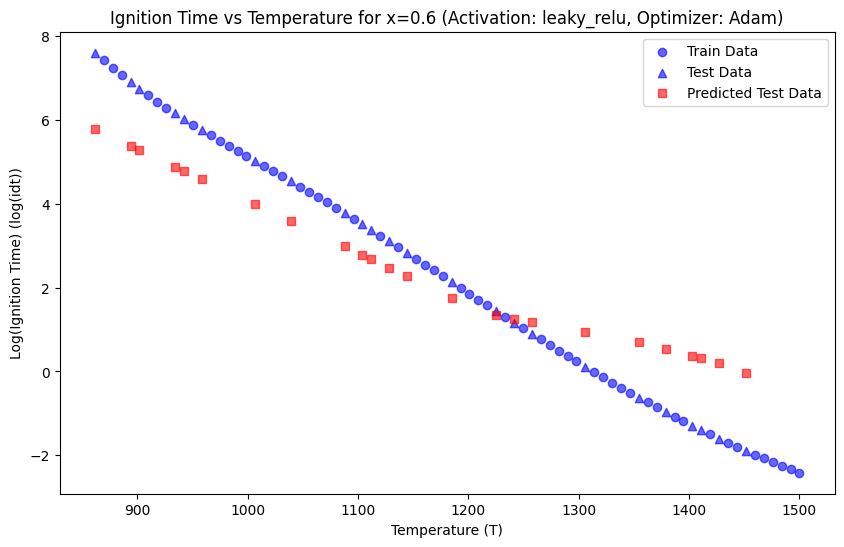

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 66: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 71: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 71: early stopping
Restoring model weights from the end of the best epoch: 61.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Results for x=0.6 with activation=leaky_relu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       3.234375    0.268149
1   0.6  0.4  0.5   861.6162    7.596330       4.910156    2.686173
2   0.6  0.4  0.5  1039.3940    4.529353       3.685547    0.843806
3   0.6  0.4  0.5  1112.1210    3.368390       3.177734    0.190656
4   0.6  0.4  0.5  1007.0710    5.015671       3.904297    1.111374
5   0.6  0.4  0.5  1087.8790    3.767292       3.345703    0.421589
6   0.6  0.4  0.5   942.4242    6.013630       4.351562    1.662067
7   0.6  0.4  0.5  1427.2730   

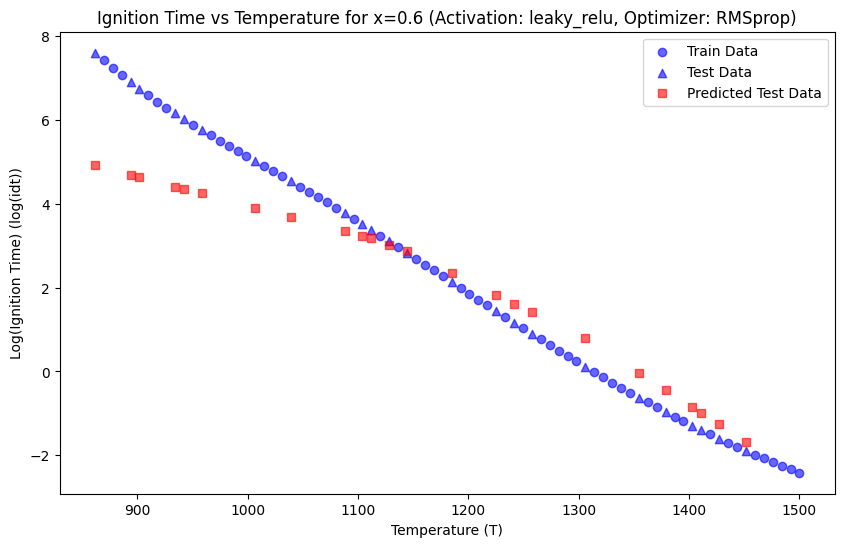

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Results for x=0.6 with activation=leaky_relu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524      -1.618164    5.120688
1   0.6  0.4  0.5   861.6162    7.596330      -1.212891    8.809220
2   0.6  0.4  0.5  1039.3940    4.529353      -1.506836    6.036189
3   0.6  0.4  0.5  1112.1210    3.368390      -1.637695    5.006086
4   0.6  0.4  0.5  1007.0710    5.015671      -1.454102    6.469772
5   0.6  0.4  0.5  1087.8790    3.767292      -1.591797    5.359089
6   0.6  0.4  0.5   942.4242    6.013630      -1.347656    7.361286
7   0.6  0.4  0.5  1427.2730   -1.603043      -2.156250    0.553207
8   0.6  0.4  0.5   893.9394    6.896028      

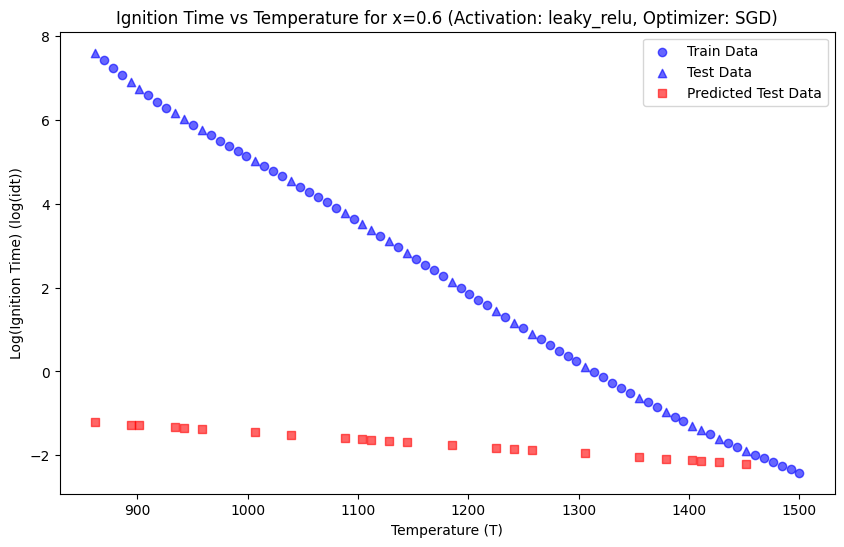

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 2.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Results for x=0.6 with activation=elu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       1.694336    1.808188
1   0.6  0.4  0.5   861.6162    7.596330       1.217773    6.378556
2   0.6  0.4  0.5  1039.3940    4.529353       1.567383    2.961970
3   0.6  0.4  0.5  1112.1210    3.368390       1.708008    1.660383
4   0.6  0.4  0.5  1007.0710    5.015671       1.504883    3.510788
5   0.6  0.4  0.5  1087.8790    3.767292       1.663086    2.104206
6   0.6  0.4  0.5   942.4242    6.013630       1.377930    4.635700
7   0.6  0.4  0.5  1427.2730   -1.603043       2.304688   -3.907731
8   0.6  0.4  0.5   893.9394    6.896028       1.283

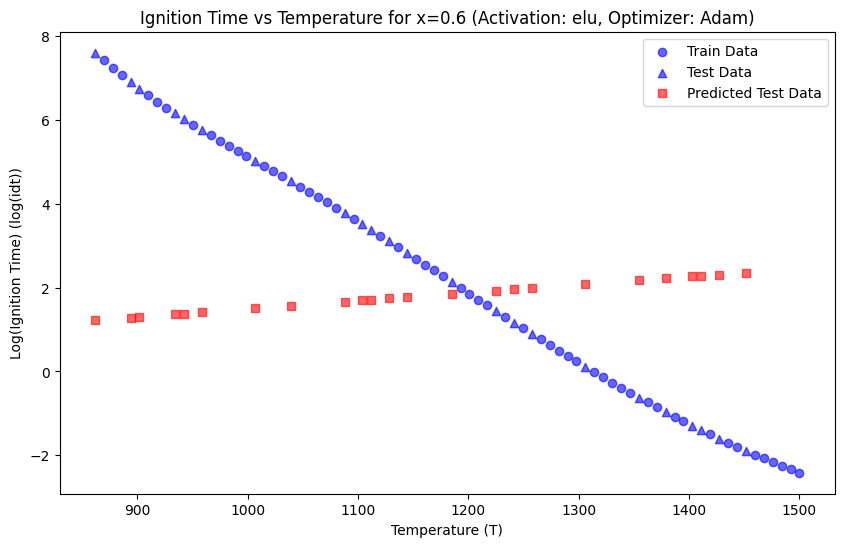

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 3.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Results for x=0.6 with activation=elu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       1.106445    2.396079
1   0.6  0.4  0.5   861.6162    7.596330       0.360352    7.235978
2   0.6  0.4  0.5  1039.3940    4.529353       0.913086    3.616267
3   0.6  0.4  0.5  1112.1210    3.368390       1.135742    2.232648
4   0.6  0.4  0.5  1007.0710    5.015671       0.814453    4.201217
5   0.6  0.4  0.5  1087.8790    3.767292       1.063477    2.703816
6   0.6  0.4  0.5   942.4242    6.013630       0.610840    5.402790
7   0.6  0.4  0.5  1427.2730   -1.603043       2.109375   -3.712418
8   0.6  0.4  0.5   893.9394    6.896028       0.

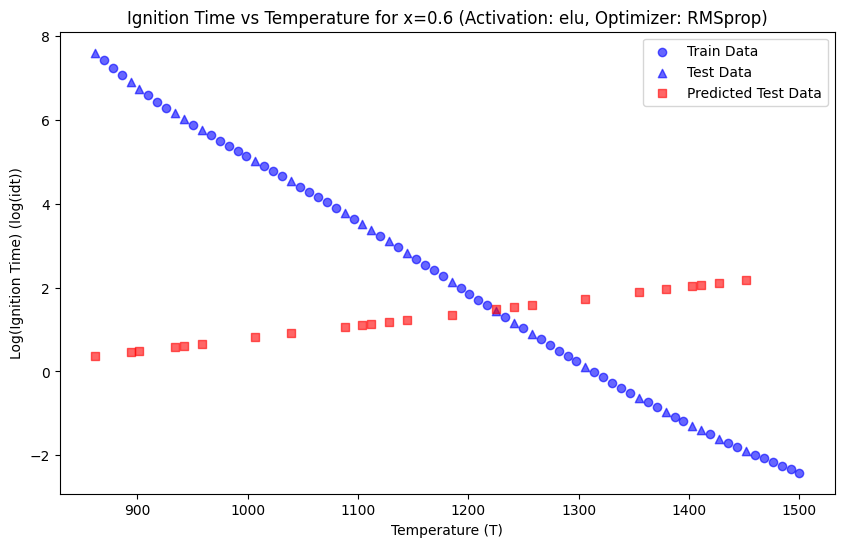

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 79: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 99: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Restoring model weights from the end of the best epoch: 94.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Results for x=0.6 with activation=elu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       3.560547   -0.058023
1   0.6  0.4  0.5   861.6162    7.596330       6.523438    1.072892
2   0.6  0.4  0.5  1039.3940    4.529353       4.449219    0.080134
3   0.6  0.4  0.5  1112.1210    3.368390       3.443359   -0.074969
4   0.6  0.4  0.5  1007.0710    5.015671       4.859375    0.156296
5   0.6  0.4  0.5  1087.8790    3.767292       3.791016   -0.023723
6   0.6  0.4  0.5   942.4242    6.013630       5.617188    0.396442
7   0.6  0.4  0.5  1427.2730   -1.603043      -1.412109   -0.190934

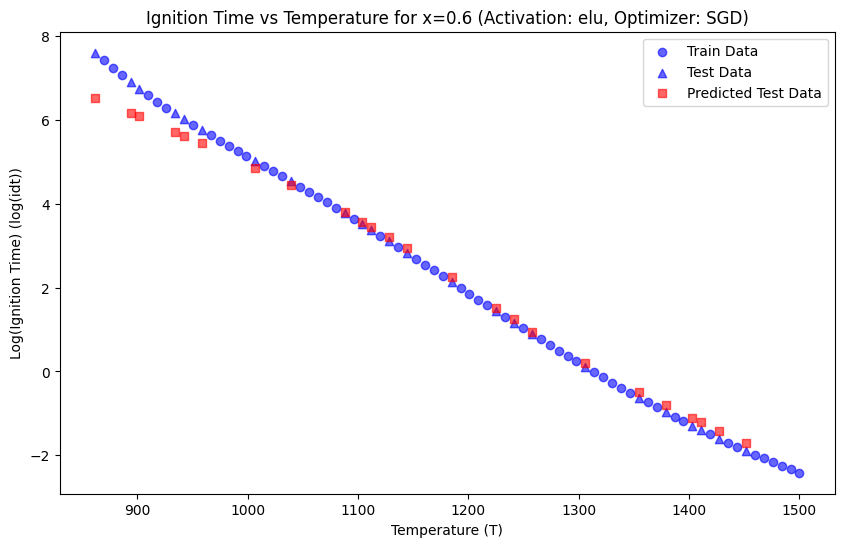

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 52: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 57: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 57: early stopping
Restoring model weights from the end of the best epoch: 47.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Results for x=0.6 with activation=selu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       3.304688    0.197836
1   0.6  0.4  0.5   861.6162    7.596330       6.000000    1.596330
2   0.6  0.4  0.5  1039.3940    4.529353       4.156250    0.373103
3   0.6  0.4  0.5  1112.1210    3.368390       3.195312    0.173078
4   0.6  0.4  0.5  1007.0710    5.015671       4.523438    0.492233
5   0.6  0.4  0.5  1087.8790    3.767292       3.529297    0.237995
6   0.6  0.4  0.5   942.4242    6.013630       5.218750    0.794880
7   0.6  0.4  0.5  1427.2730   -1.603043      -1.252930   -0.350114
8   0.6  0.4  0.5   893.9394    6.896028       5.

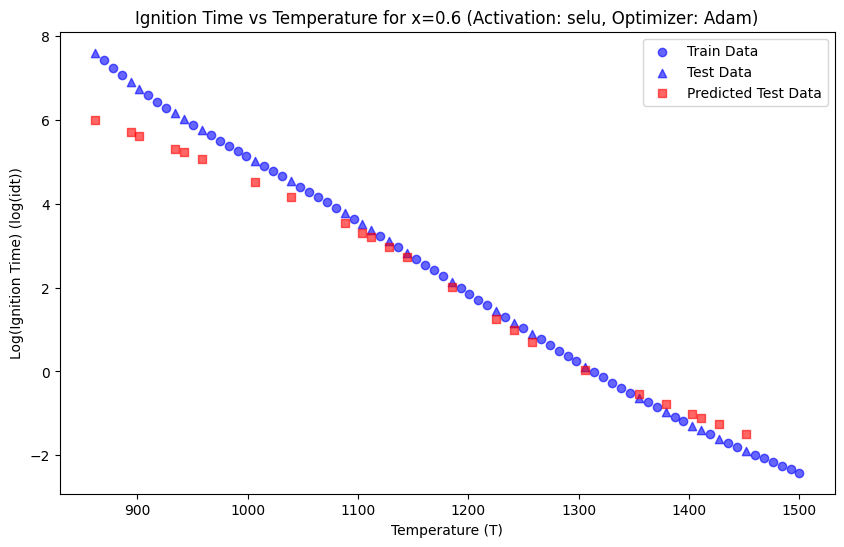

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 3.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Results for x=0.6 with activation=selu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       2.072266    1.430258
1   0.6  0.4  0.5   861.6162    7.596330       1.680664    5.915665
2   0.6  0.4  0.5  1039.3940    4.529353       1.956055    2.573298
3   0.6  0.4  0.5  1112.1210    3.368390       2.089844    1.278547
4   0.6  0.4  0.5  1007.0710    5.015671       1.910156    3.105514
5   0.6  0.4  0.5  1087.8790    3.767292       2.050781    1.716511
6   0.6  0.4  0.5   942.4242    6.013630       1.800781    4.212849
7   0.6  0.4  0.5  1427.2730   -1.603043       2.656250   -4.259293
8   0.6  0.4  0.5   893.9394    6.896028       1

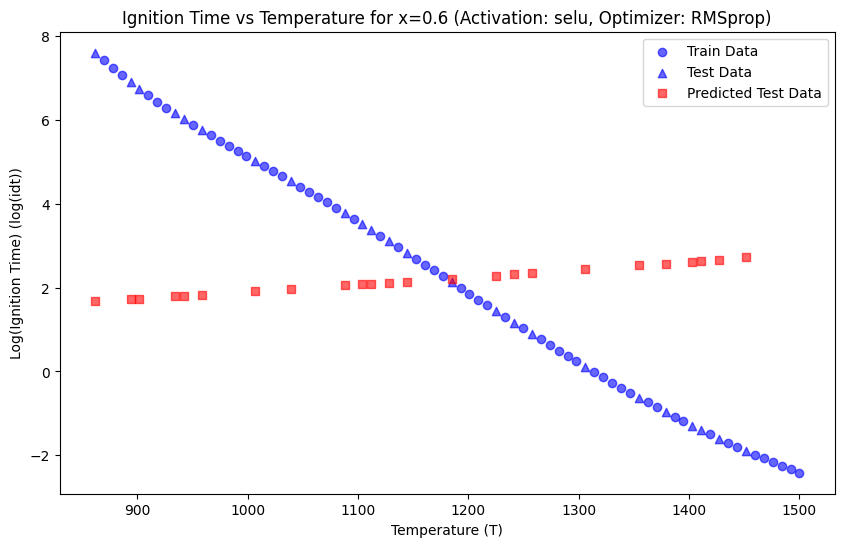

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 59: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 64: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 64: early stopping
Restoring model weights from the end of the best epoch: 54.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Results for x=0.6 with activation=selu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       3.496094    0.006430
1   0.6  0.4  0.5   861.6162    7.596330       6.019531    1.576798
2   0.6  0.4  0.5  1039.3940    4.529353       4.519531    0.009822
3   0.6  0.4  0.5  1112.1210    3.368390       3.382812   -0.014422
4   0.6  0.4  0.5  1007.0710    5.015671       4.914062    0.101608
5   0.6  0.4  0.5  1087.8790    3.767292       3.777344   -0.010052
6   0.6  0.4  0.5   942.4242    6.013630       5.511719    0.501911
7   0.6  0.4  0.5  1427.2730   -1.603043      -1.575195   -0.027848
8   0.6  0.4  0.5   893.9394    6.896028       5.8

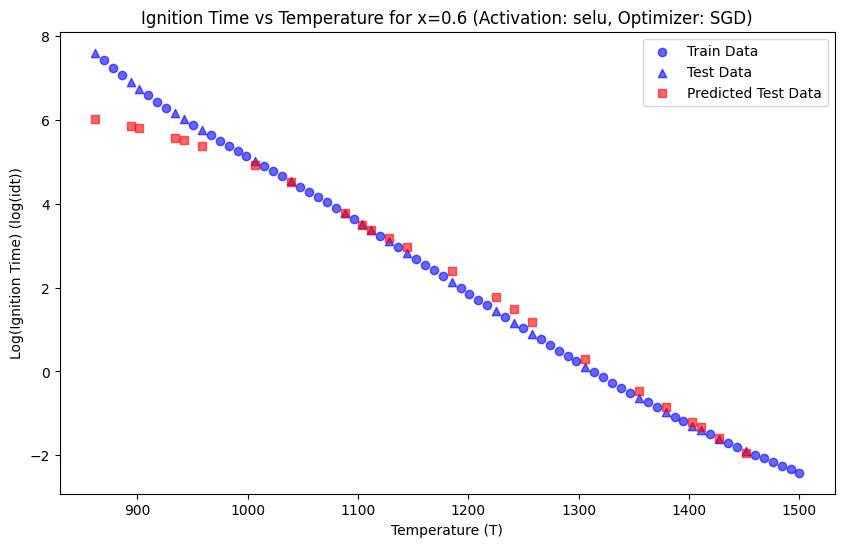

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 3.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Results for x=0.6 with activation=softplus and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       1.278320    2.224204
1   0.6  0.4  0.5   861.6162    7.596330       0.861816    6.734513
2   0.6  0.4  0.5  1039.3940    4.529353       1.166016    3.363338
3   0.6  0.4  0.5  1112.1210    3.368390       1.291016    2.077375
4   0.6  0.4  0.5  1007.0710    5.015671       1.116211    3.899460
5   0.6  0.4  0.5  1087.8790    3.767292       1.252930    2.514363
6   0.6  0.4  0.5   942.4242    6.013630       1.002930    5.010700
7   0.6  0.4  0.5  1427.2730   -1.603043       1.825195   -3.428239
8   0.6  0.4  0.5   893.9394    6.896028       

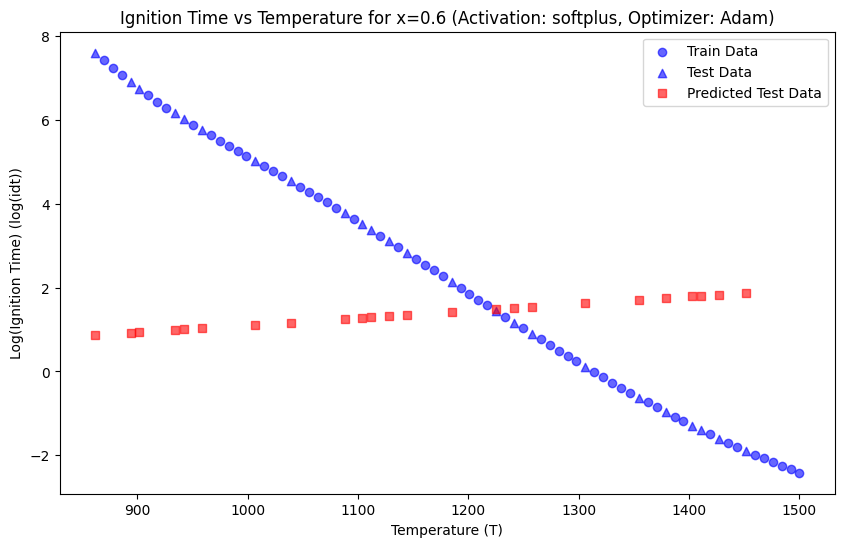

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 27: early stopping
Restoring model weights from the end of the best epoch: 17.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Results for x=0.6 with activation=softplus and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       3.148438    0.354086
1   0.6  0.4  0.5   861.6162    7.596330       4.289062    3.307267
2   0.6  0.4  0.5  1039.3940    4.529353       3.359375    1.169978
3   0.6  0.4  0.5  1112.1210    3.368390       3.121094    0.247297
4   0.6  0.4  0.5  1007.0710    5.015671       3.480469    1.535202
5   0.6  0.4  0.5  1087.8790    3.767292       3.195312    0.571980
6   0.6  0.4  0.5   942.4242    6.013630       3.785156    2.228474
7   0.6  0.4  0.5  1427.2730   -1.603043       2.511719   -4.114762
8   0.6  0.4  0.5   893.9394    6.896028   

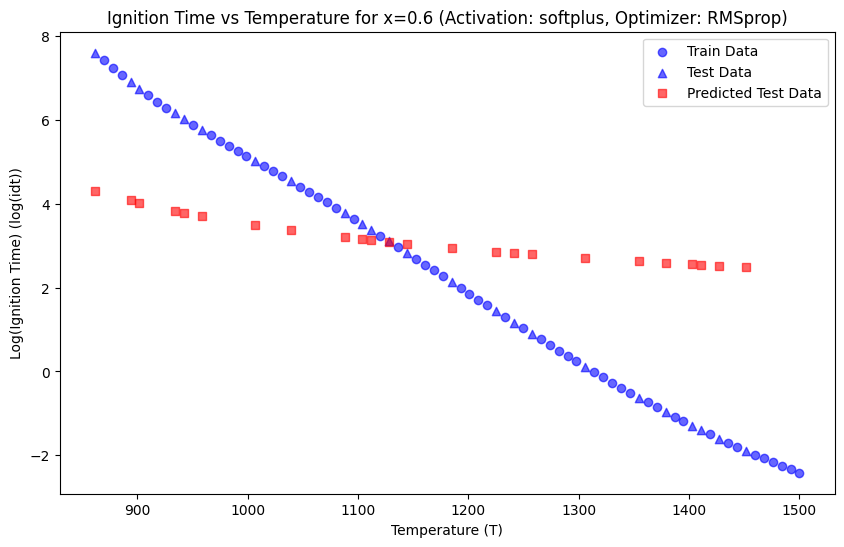

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 28: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 33: early stopping
Restoring model weights from the end of the best epoch: 23.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Results for x=0.6 with activation=softplus and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       2.816406    0.686118
1   0.6  0.4  0.5   861.6162    7.596330       5.960938    1.635392
2   0.6  0.4  0.5  1039.3940    4.529353       3.570312    0.959041
3   0.6  0.4  0.5  1112.1210    3.368390       2.730469    0.637922
4   0.6  0.4  0.5  1007.0710    5.015671       3.970703    1.044967
5   0.6  0.4  0.5  1087.8790    3.767292       2.994141    0.773152
6   0.6  0.4  0.5   942.4242    6.013630       4.816406    1.197224
7   0.6  0.4  0.5  1427.2730   -1.60

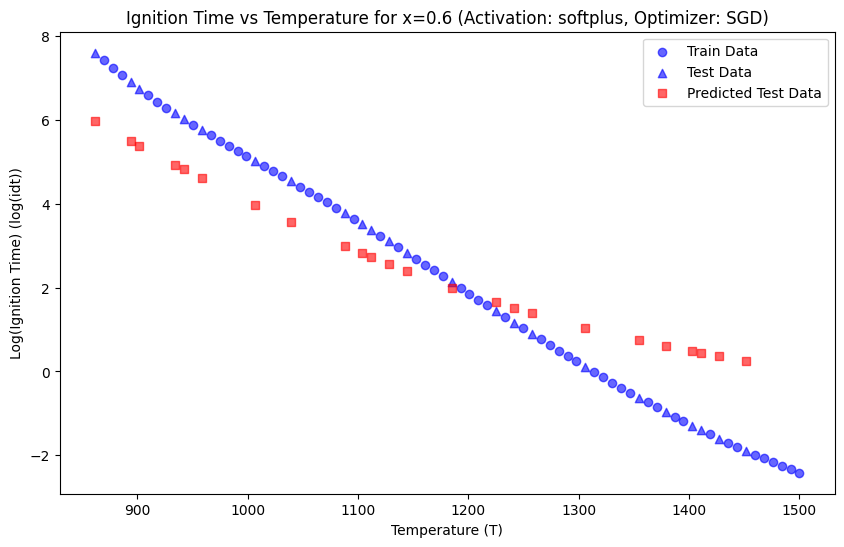

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 29: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 29: early stopping
Restoring model weights from the end of the best epoch: 19.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
Results for x=0.6 with activation=swish and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       2.316406    1.186118
1   0.6  0.4  0.5   861.6162    7.596330       3.914062    3.682267
2   0.6  0.4  0.5  1039.3940    4.529353       2.724609    1.804744
3   0.6  0.4  0.5  1112.1210    3.368390       2.261719    1.106672
4   0.6  0.4  0.5  1007.0710    5.015671       2.925781    2.089889
5   0.6  0.4  0.5  1087.8790    3.767292       2.410156    1.357136
6   0.6  0.4  0.5   942.4242    6.013630       3.351562    2.662067
7   0.6  0.4  0.5  1427.2730   -1.603043       0.205444   -1.808488
8   0.6  0.4  0.5   893.9394    6.896028       3

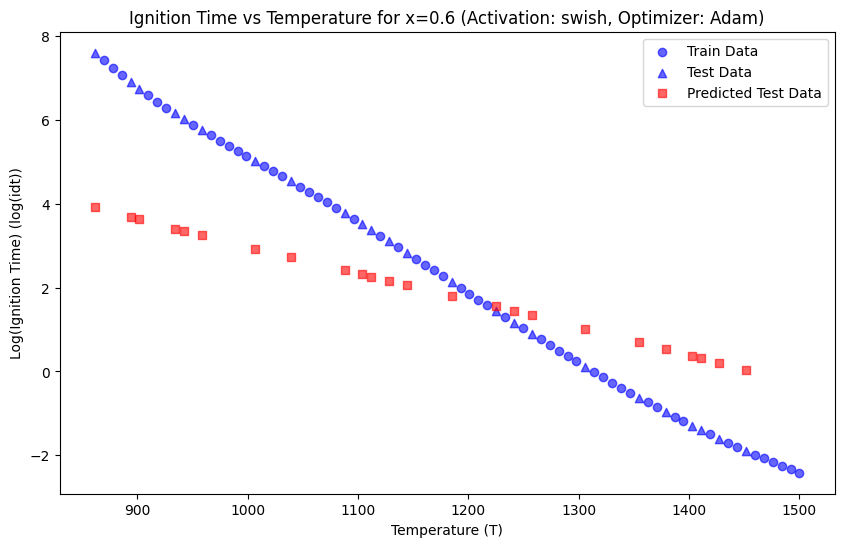

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 39: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 44: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 44: early stopping
Restoring model weights from the end of the best epoch: 34.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Results for x=0.6 with activation=swish and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       3.728516   -0.225992
1   0.6  0.4  0.5   861.6162    7.596330       6.453125    1.143205
2   0.6  0.4  0.5  1039.3940    4.529353       4.515625    0.013728
3   0.6  0.4  0.5  1112.1210    3.368390       3.626953   -0.258563
4   0.6  0.4  0.5  1007.0710    5.015671       4.890625    0.125046
5   0.6  0.4  0.5  1087.8790    3.767292       3.929688   -0.162395
6   0.6  0.4  0.5   942.4242    6.013630       5.601562    0.412067
7   0.6  0.4  0.5  1427.2730   -1.603043      -1.132812   -0.470231
8   0.6  0.4  0.5   893.9394    6.896028     

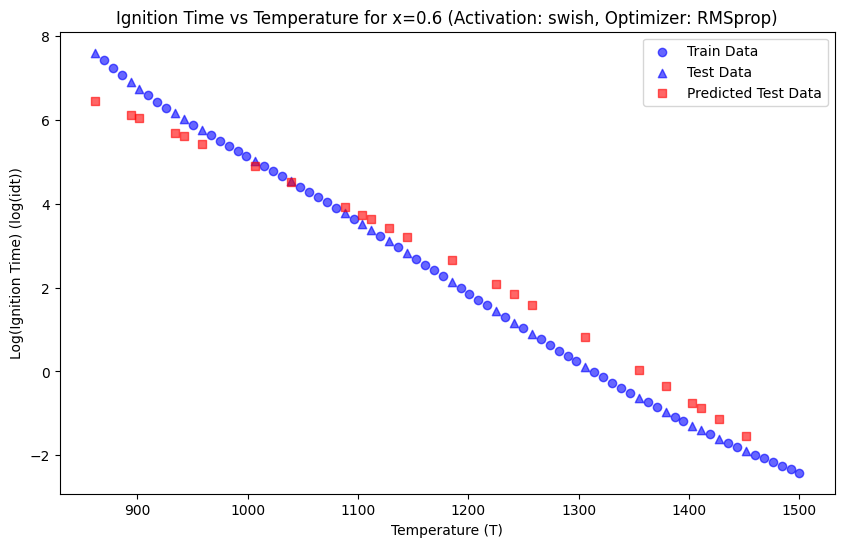

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 47: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 52: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 52: early stopping
Restoring model weights from the end of the best epoch: 42.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Results for x=0.6 with activation=swish and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       3.408203    0.094321
1   0.6  0.4  0.5   861.6162    7.596330       7.281250    0.315080
2   0.6  0.4  0.5  1039.3940    4.529353       4.476562    0.052791
3   0.6  0.4  0.5  1112.1210    3.368390       3.275391    0.093000
4   0.6  0.4  0.5  1007.0710    5.015671       4.992188    0.023483
5   0.6  0.4  0.5  1087.8790    3.767292       3.681641    0.085652
6   0.6  0.4  0.5   942.4242    6.013630       6.015625   -0.001995
7   0.6  0.4  0.5  1427.2730   -1.603043      -1.910156    0.307113
8   0.6  0.4  0.5   893.9394    6.896028       6.

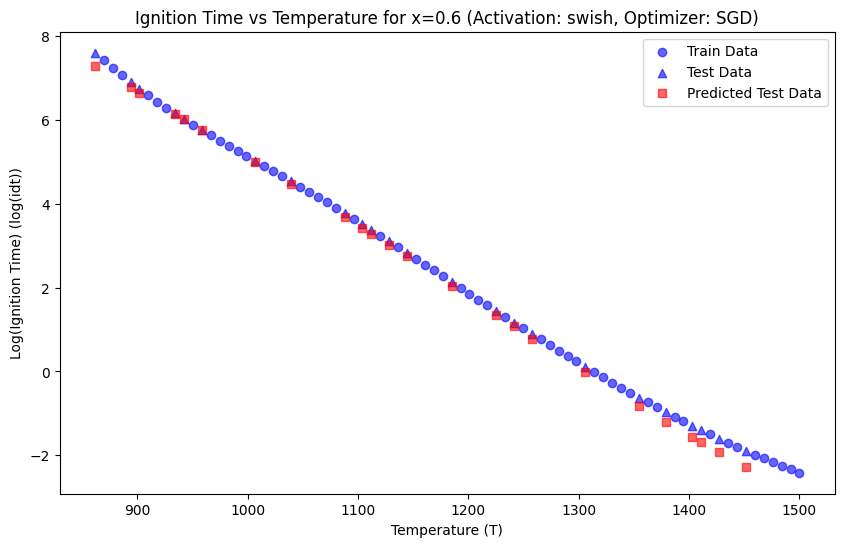

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 3.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Results for x=0.6 with activation=gelu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       1.043945    2.458579
1   0.6  0.4  0.5   861.6162    7.596330       0.703125    6.893205
2   0.6  0.4  0.5  1039.3940    4.529353       0.947266    3.582088
3   0.6  0.4  0.5  1112.1210    3.368390       1.052734    2.315656
4   0.6  0.4  0.5  1007.0710    5.015671       0.907715    4.107956
5   0.6  0.4  0.5  1087.8790    3.767292       1.026367    2.740925
6   0.6  0.4  0.5   942.4242    6.013630       0.821289    5.192341
7   0.6  0.4  0.5  1427.2730   -1.603043       1.505859   -3.108903
8   0.6  0.4  0.5   893.9394    6.896028       0.75

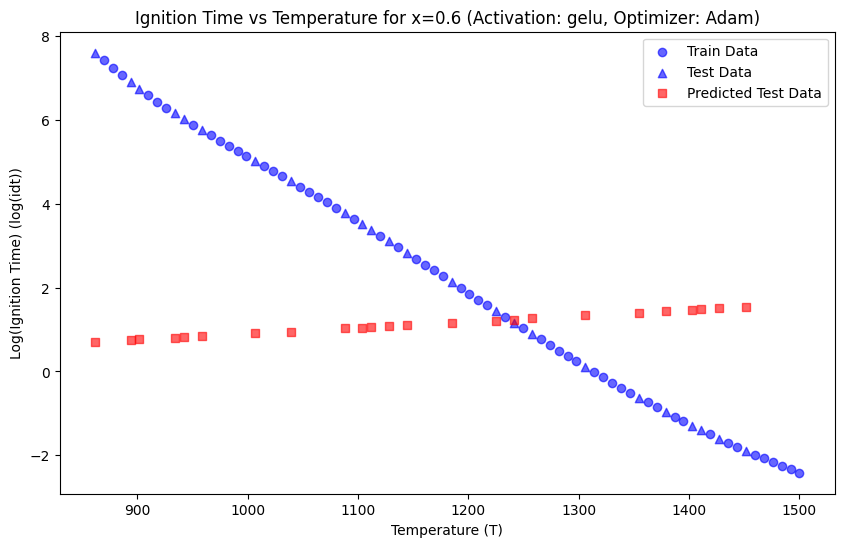

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 39: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 39: early stopping
Restoring model weights from the end of the best epoch: 29.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Results for x=0.6 with activation=gelu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       3.314453    0.188071
1   0.6  0.4  0.5   861.6162    7.596330       5.437500    2.158830
2   0.6  0.4  0.5  1039.3940    4.529353       4.015625    0.513728
3   0.6  0.4  0.5  1112.1210    3.368390       3.220703    0.147687
4   0.6  0.4  0.5  1007.0710    5.015671       4.312500    0.703171
5   0.6  0.4  0.5  1087.8790    3.767292       3.498047    0.269245
6   0.6  0.4  0.5   942.4242    6.013630       4.843750    1.169880
7   0.6  0.4  0.5  1427.2730   -1.60

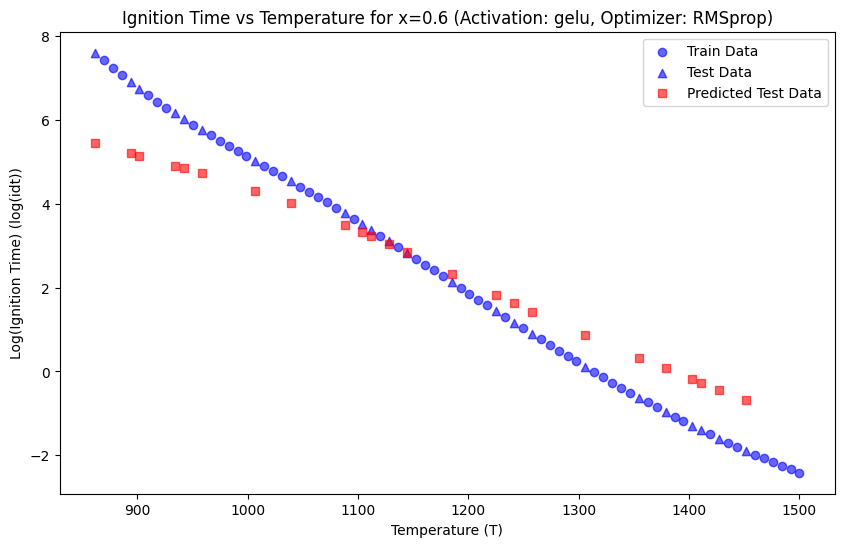

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 56: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 61: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 61: early stopping
Restoring model weights from the end of the best epoch: 51.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Results for x=0.6 with activation=gelu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       3.416016    0.086508
1   0.6  0.4  0.5   861.6162    7.596330       6.761719    0.834611
2   0.6  0.4  0.5  1039.3940    4.529353       4.285156    0.244197
3   0.6  0.4  0.5  1112.1210    3.368390       3.310547    0.057844
4   0.6  0.4  0.5  1007.0710    5.015671       4.722656    0.293014
5   0.6  0.4  0.5  1087.8790    3.767292       3.625000    0.142292
6   0.6  0.4  0.5   942.4242    6.013630       5.621094    0.392536
7   0.6  0.4  0.5  1427.2730   -1.603043 

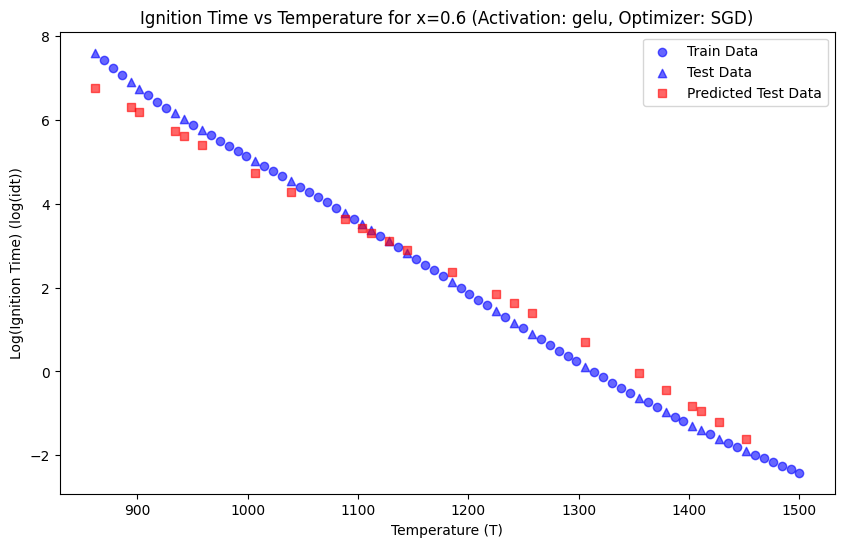

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 47: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 52: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 52: early stopping
Restoring model weights from the end of the best epoch: 42.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Results for x=0.8 with activation=relu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       5.054688    1.241932
1   0.8  0.2  0.5  1427.2730   -1.236471      -0.196777   -1.039694
2   0.8  0.2  0.5  1063.6360    4.561330       3.886719    0.674611
3   0.8  0.2  0.5   918.1818    6.808899       5.398438    1.410462
4   0.8  0.2  0.5  1144.4440    3.172562       2.964844    0.207718
5   0.8  0.2  0.5  1500.0000   -2.052887      -0.985352   -1.067535
6   0.8  0.2  0.5   998.9899    5.574035       4.562500    1.011535
7   0.8  0.2  0.5  1192.9290    2.323434       2.398438   -0.075003
8   0.8  0.2  0.5  1015.1520    5.329972       4.

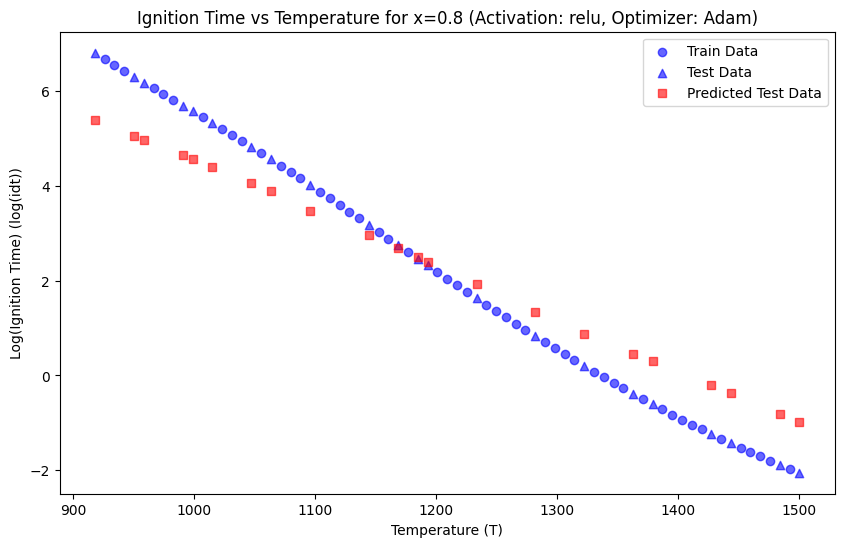

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 4.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Results for x=0.8 with activation=relu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       1.124023    5.172596
1   0.8  0.2  0.5  1427.2730   -1.236471       2.089844   -3.326315
2   0.8  0.2  0.5  1063.6360    4.561330       1.353516    3.207814
3   0.8  0.2  0.5   918.1818    6.808899       1.055664    5.753235
4   0.8  0.2  0.5  1144.4440    3.172562       1.513672    1.658890
5   0.8  0.2  0.5  1500.0000   -2.052887       2.234375   -4.287262
6   0.8  0.2  0.5   998.9899    5.574035       1.225586    4.348449
7   0.8  0.2  0.5  1192.9290    2.323434       1.615234    0.708200
8   0.8  0.2  0.5  1015.1520    5.329972       1

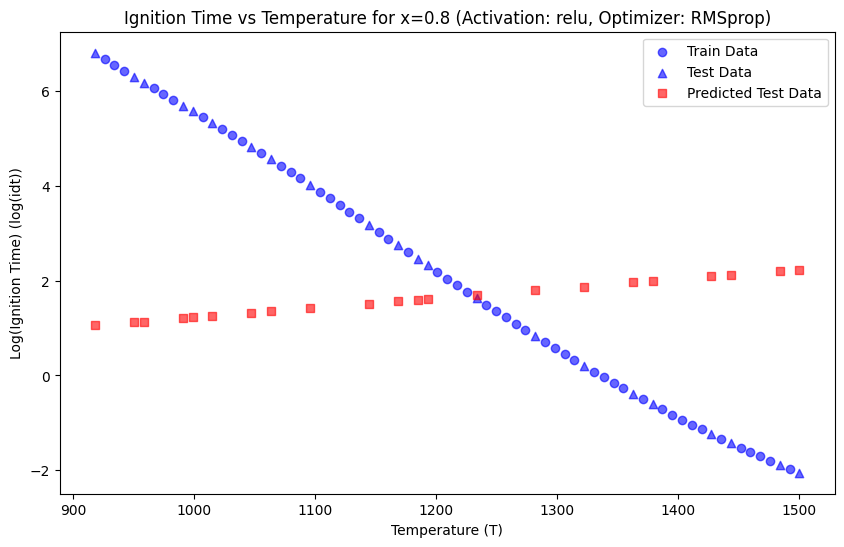

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Results for x=0.8 with activation=relu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619      -1.251953    7.548572
1   0.8  0.2  0.5  1427.2730   -1.236471      -2.013672    0.777201
2   0.8  0.2  0.5  1063.6360    4.561330      -1.439453    6.000783
3   0.8  0.2  0.5   918.1818    6.808899      -1.198242    8.007142
4   0.8  0.2  0.5  1144.4440    3.172562      -1.567383    4.739945
5   0.8  0.2  0.5  1500.0000   -2.052887      -2.132812    0.079926
6   0.8  0.2  0.5   998.9899    5.574035      -1.333008    6.907043
7   0.8  0.2  0.5  1192.9290    2.323434      -1.633789    3.957223
8   0.8  0.2  0.5  1015.1520    5.329972      -1.367

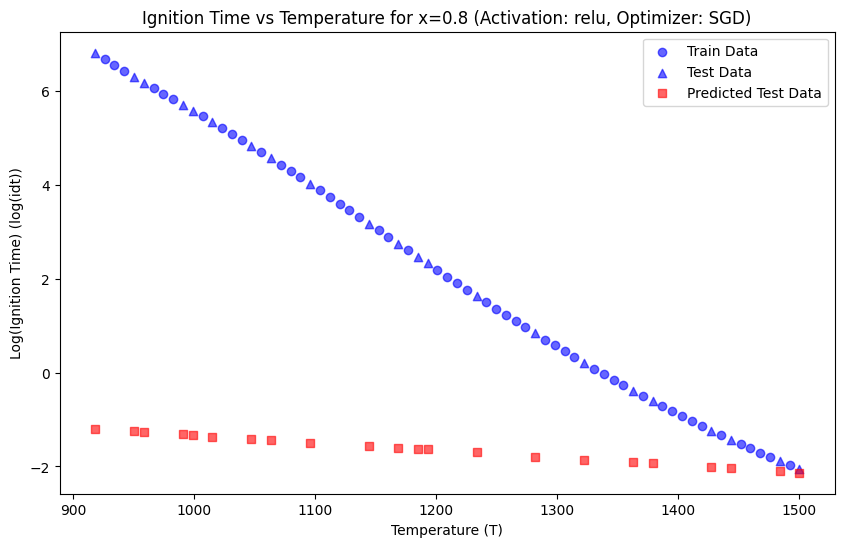

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 37: early stopping
Restoring model weights from the end of the best epoch: 27.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Results for x=0.8 with activation=leaky_relu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       5.558594    0.738025
1   0.8  0.2  0.5  1427.2730   -1.236471       0.694336   -1.930807
2   0.8  0.2  0.5  1063.6360    4.561330       4.218750    0.342580
3   0.8  0.2  0.5   918.1818    6.808899       5.875000    0.933899
4   0.8  0.2  0.5  1144.4440    3.172562       3.322266   -0.149704
5   0.8  0.2  0.5  1500.0000   -2.052887       0.033813   -2.086700
6   0.8  0.2  0.5   998.9899    5.574035       4.984375    0.589660
7   0.8  0.2  0.5  1192.9290    2.323434       2.781250   -0.457816
8   0.8  0.2  0.5  1015.1520    5.329972   

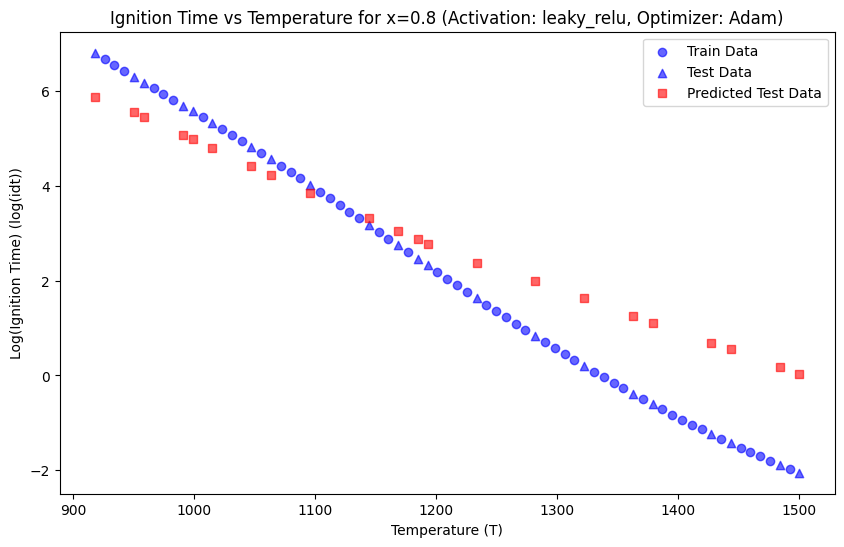

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 6.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Results for x=0.8 with activation=leaky_relu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       1.007812    5.288807
1   0.8  0.2  0.5  1427.2730   -1.236471       1.773438   -3.009908
2   0.8  0.2  0.5  1063.6360    4.561330       1.189453    3.371877
3   0.8  0.2  0.5   918.1818    6.808899       0.956543    5.852356
4   0.8  0.2  0.5  1144.4440    3.172562       1.317383    1.855179
5   0.8  0.2  0.5  1500.0000   -2.052887       1.889648   -3.942535
6   0.8  0.2  0.5   998.9899    5.574035       1.084961    4.489074
7   0.8  0.2  0.5  1192.9290    2.323434       1.398438    0.924997
8   0.8  0.2  0.5  1015.1520    5.329972 

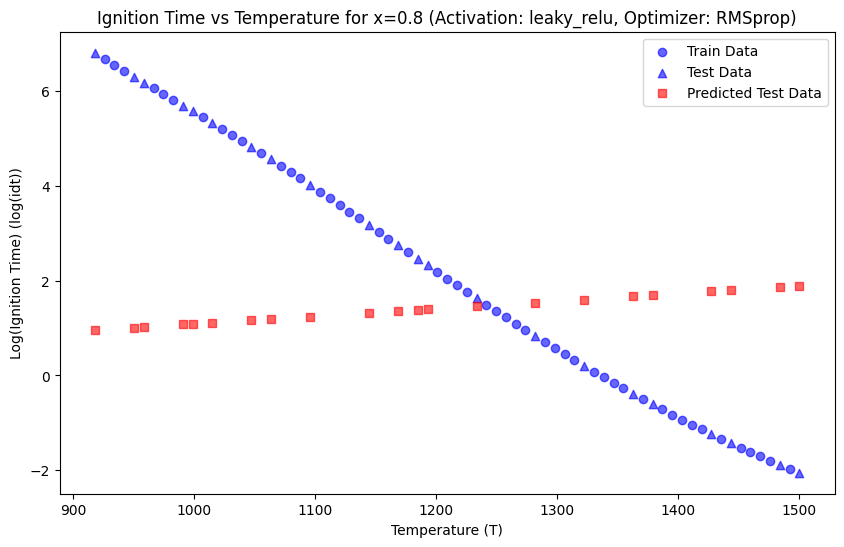

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 38: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 38: early stopping
Restoring model weights from the end of the best epoch: 28.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Results for x=0.8 with activation=leaky_relu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       4.187500    2.109119
1   0.8  0.2  0.5  1427.2730   -1.236471      -2.466797    1.230326
2   0.8  0.2  0.5  1063.6360    4.561330       2.605469    1.955861
3   0.8  0.2  0.5   918.1818    6.808899       4.656250    2.152649
4   0.8  0.2  0.5  1144.4440    3.172562       1.744141    1.428421
5   0.8  0.2  0.5  1500.0000   -2.052887      -3.638672    1.585785
6   0.8  0.2  0.5   998.9899    5.574035       3.484375    2.089660
7   0.8  0.2  0.5  1192.9290    2.3

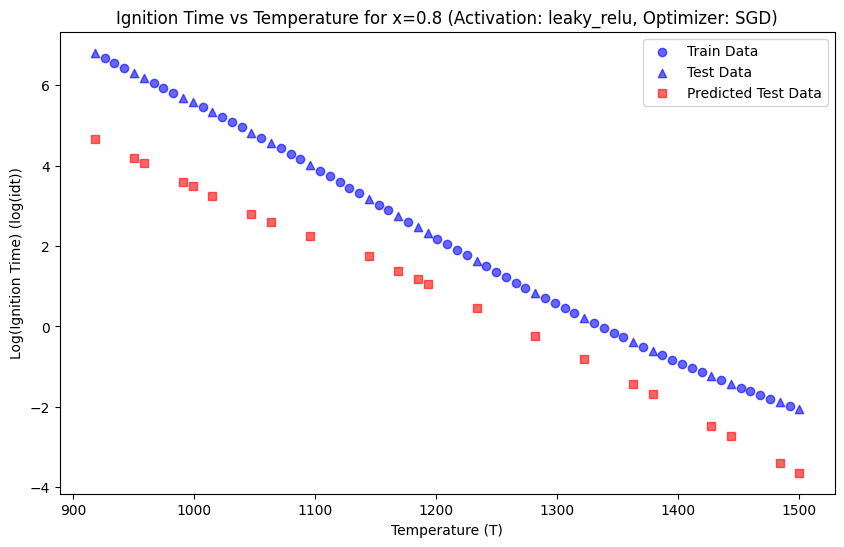

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 28: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 28: early stopping
Restoring model weights from the end of the best epoch: 18.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Results for x=0.8 with activation=elu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       3.216797    3.079822
1   0.8  0.2  0.5  1427.2730   -1.236471       0.388672   -1.625143
2   0.8  0.2  0.5  1063.6360    4.561330       2.619141    1.942189
3   0.8  0.2  0.5   918.1818    6.808899       3.380859    3.428040
4   0.8  0.2  0.5  1144.4440    3.172562       2.166016    1.006546
5   0.8  0.2  0.5  1500.0000   -2.052887      -0.129517   -1.923370
6   0.8  0.2  0.5   998.9899    5.574035       2.966797    2.607238
7   0.8  0.2  0.5  1192.9290    2.323434       1.879883    0.443551
8   0.8  0.2  0.5  1015.1520    5.329972       2.8

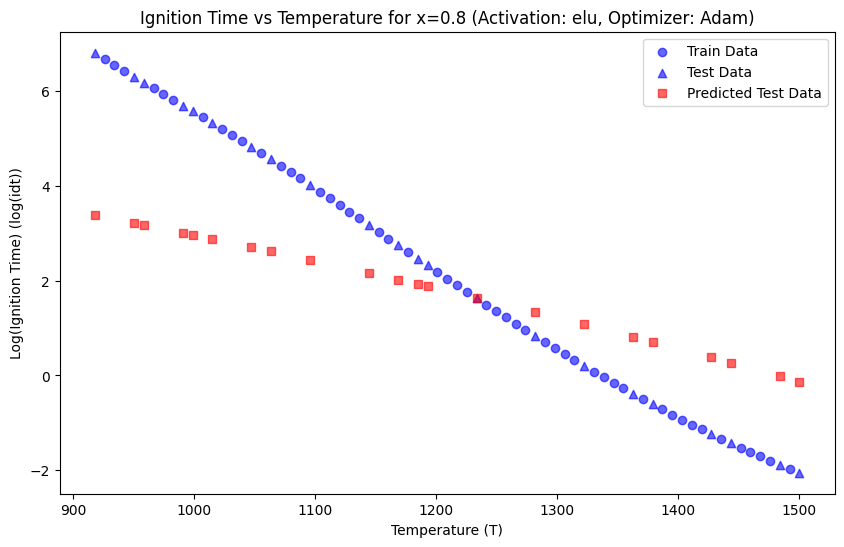

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 2.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Results for x=0.8 with activation=elu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       0.933105    5.363514
1   0.8  0.2  0.5  1427.2730   -1.236471       0.941895   -2.178365
2   0.8  0.2  0.5  1063.6360    4.561330       0.907715    3.653615
3   0.8  0.2  0.5   918.1818    6.808899       0.940918    5.867981
4   0.8  0.2  0.5  1144.4440    3.172562       0.900391    2.272171
5   0.8  0.2  0.5  1500.0000   -2.052887       0.964844   -3.017731
6   0.8  0.2  0.5   998.9899    5.574035       0.924316    4.649718
7   0.8  0.2  0.5  1192.9290    2.323434       0.907227    1.416208
8   0.8  0.2  0.5  1015.1520    5.329972       0.

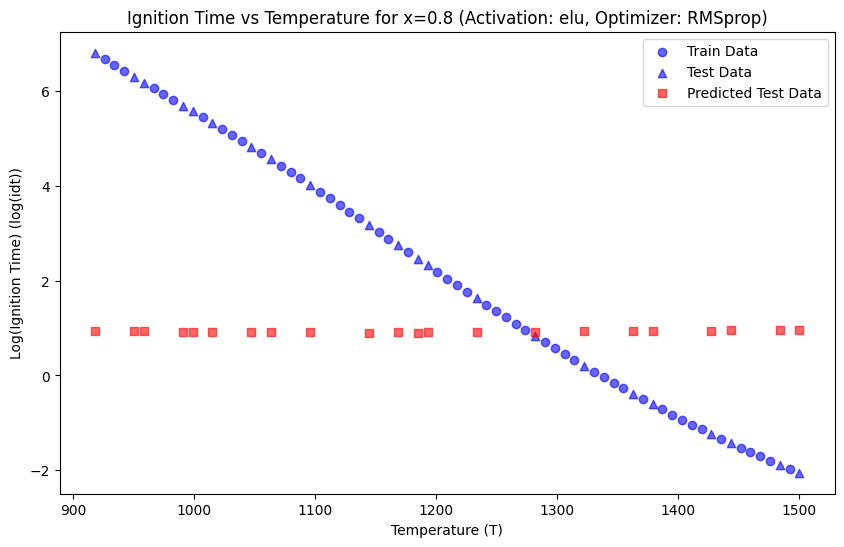

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Results for x=0.8 with activation=elu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       0.463379    5.833240
1   0.8  0.2  0.5  1427.2730   -1.236471      -0.368652   -0.867819
2   0.8  0.2  0.5  1063.6360    4.561330       0.268066    4.293263
3   0.8  0.2  0.5   918.1818    6.808899       0.523438    6.285462
4   0.8  0.2  0.5  1144.4440    3.172562       0.134888    3.037674
5   0.8  0.2  0.5  1500.0000   -2.052887      -0.494385   -1.558502
6   0.8  0.2  0.5   998.9899    5.574035       0.384766    5.189269
7   0.8  0.2  0.5  1192.9290    2.323434       0.034302    2.289132
8   0.8  0.2  0.5  1015.1520    5.329972       0.3457

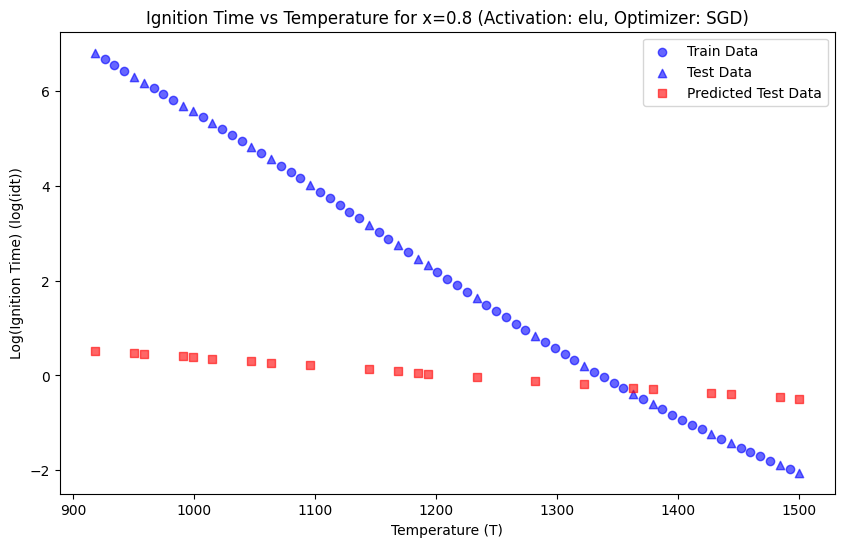

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 39: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 44: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 44: early stopping
Restoring model weights from the end of the best epoch: 34.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Results for x=0.8 with activation=selu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       4.316406    1.980213
1   0.8  0.2  0.5  1427.2730   -1.236471      -0.367188   -0.869283
2   0.8  0.2  0.5  1063.6360    4.561330       3.394531    1.166799
3   0.8  0.2  0.5   918.1818    6.808899       4.570312    2.238587
4   0.8  0.2  0.5  1144.4440    3.172562       2.677734    0.494827
5   0.8  0.2  0.5  1500.0000   -2.052887      -1.091797   -0.961090
6   0.8  0.2  0.5   998.9899    5.574035       3.927734    1.646300
7   0.8  0.2  0.5  1192.9290    2.323434       2.175781    0.147653
8   0.8  0.2  0.5  1015.1520    5.329972       3.

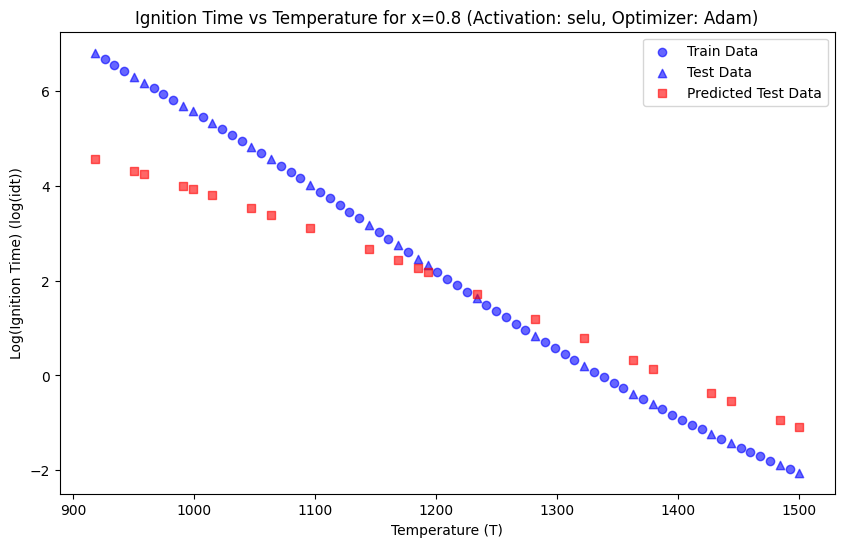

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 36: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 36: early stopping
Restoring model weights from the end of the best epoch: 26.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Results for x=0.8 with activation=selu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       6.414062   -0.117443
1   0.8  0.2  0.5  1427.2730   -1.236471      -1.175781   -0.060690
2   0.8  0.2  0.5  1063.6360    4.561330       4.746094   -0.184764
3   0.8  0.2  0.5   918.1818    6.808899       6.816406   -0.007507
4   0.8  0.2  0.5  1144.4440    3.172562       3.337891   -0.165329
5   0.8  0.2  0.5  1500.0000   -2.052887      -2.099609    0.046723
6   0.8  0.2  0.5   998.9899    5.574035       5.757812   -0.183778
7   0.8  0.2  0.5  1192.9290    2.323434       2.511719   -0.188285
8   0.8  0.2  0.5  1015.1520    5.329972      

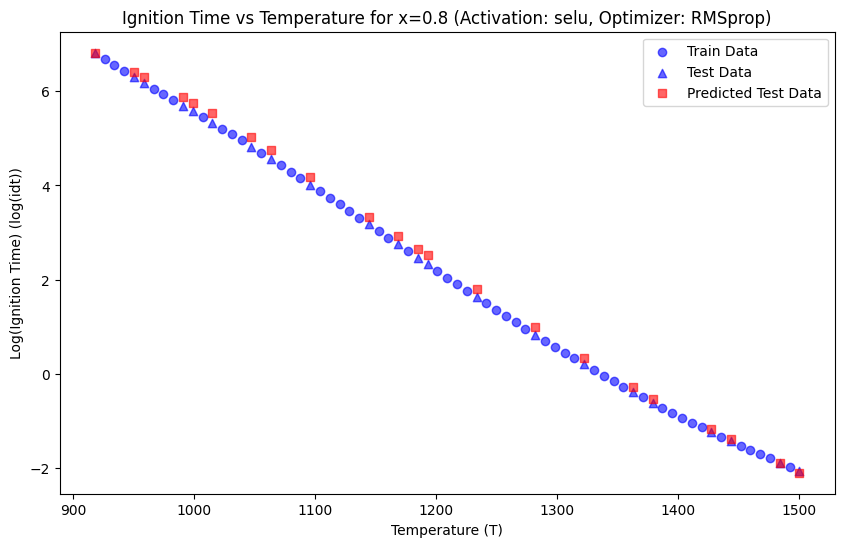

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Results for x=0.8 with activation=selu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       0.989746    5.306873
1   0.8  0.2  0.5  1427.2730   -1.236471       1.409180   -2.645651
2   0.8  0.2  0.5  1063.6360    4.561330       1.100586    3.460744
3   0.8  0.2  0.5   918.1818    6.808899       0.977051    5.831849
4   0.8  0.2  0.5  1144.4440    3.172562       1.157227    2.015335
5   0.8  0.2  0.5  1500.0000   -2.052887       1.496094   -3.548981
6   0.8  0.2  0.5   998.9899    5.574035       1.047852    4.526183
7   0.8  0.2  0.5  1192.9290    2.323434       1.203125    1.120309
8   0.8  0.2  0.5  1015.1520    5.329972       1.053

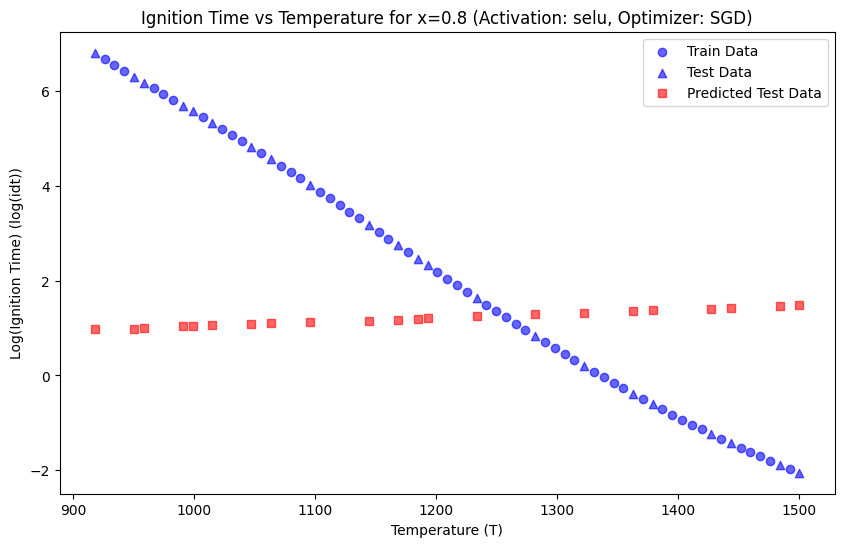

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 37: early stopping
Restoring model weights from the end of the best epoch: 27.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Results for x=0.8 with activation=softplus and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       4.730469    1.566150
1   0.8  0.2  0.5  1427.2730   -1.236471      -0.886230   -0.350240
2   0.8  0.2  0.5  1063.6360    4.561330       3.660156    0.901174
3   0.8  0.2  0.5   918.1818    6.808899       4.996094    1.812806
4   0.8  0.2  0.5  1144.4440    3.172562       2.791016    0.381546
5   0.8  0.2  0.5  1500.0000   -2.052887      -1.970703   -0.082184
6   0.8  0.2  0.5   998.9899    5.574035       4.292969    1.281066
7   0.8  0.2  0.5  1192.9290    2.323434       2.220703    0.102731
8   0.8  0.2  0.5  1015.1520    5.329972     

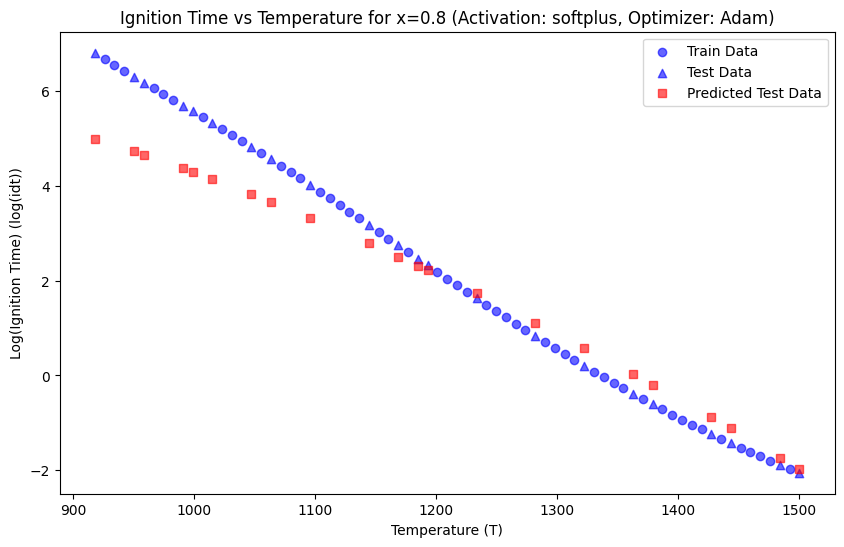

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 38: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 46: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 91: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Restoring model weights from the end of the best epoch: 100.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Results for x=0.8 with activation=softplus and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       6.082031    0.214588
1   0.8  0.2  0.5  1427.2730   -1.236471      -0.691895   -0.544576
2   0.8  0.2  0.5  1063.6360    4.561330       4.378906    0.182424
3   0.8  0.2  0.5   918.1818    6.808899       6.562500    0.246399
4   0.8  0.2  0.5  1144.4440    3.172562       3.197266   -0.024704
5   0.8  0.2  0.5  1500.0000   -2.052887      -1.599609   -0.453277
6   0.8  0.2  0.5   998.9899    5.574035       5

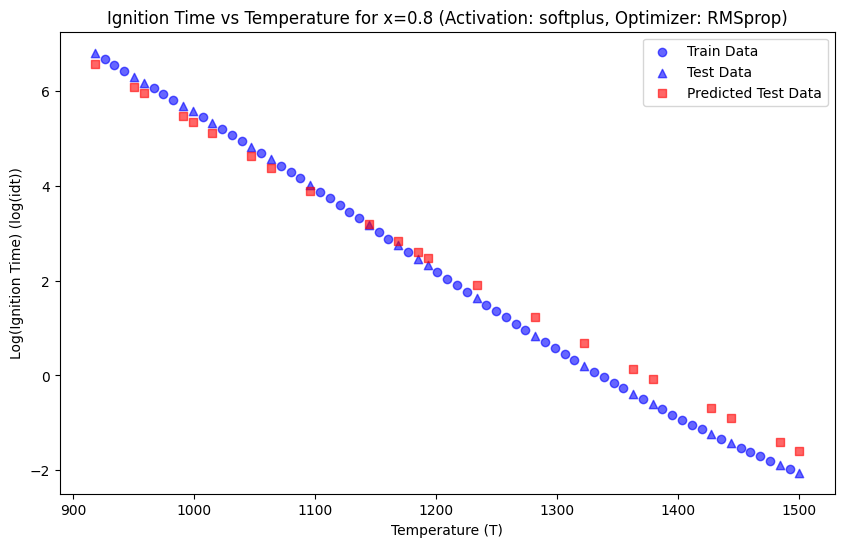

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 61: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 66: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 66: early stopping
Restoring model weights from the end of the best epoch: 56.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Results for x=0.8 with activation=softplus and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       5.523438    0.773182
1   0.8  0.2  0.5  1427.2730   -1.236471      -0.993164   -0.243307
2   0.8  0.2  0.5  1063.6360    4.561330       3.927734    0.633596
3   0.8  0.2  0.5   918.1818    6.808899       5.984375    0.824524
4   0.8  0.2  0.5  1144.4440    3.172562       2.820312    0.352249
5   0.8  0.2  0.5  1500.0000   -2.052887      -1.962891   -0.089996
6   0.8  0.2  0.5   998.9899    5.574035       4.835938    0.738097
7   0.8  0.2  0.5  1192.9290    2.323434       2.152344    0.171090
8   0.8  0.2  0.5  1015.1520    5.329972      

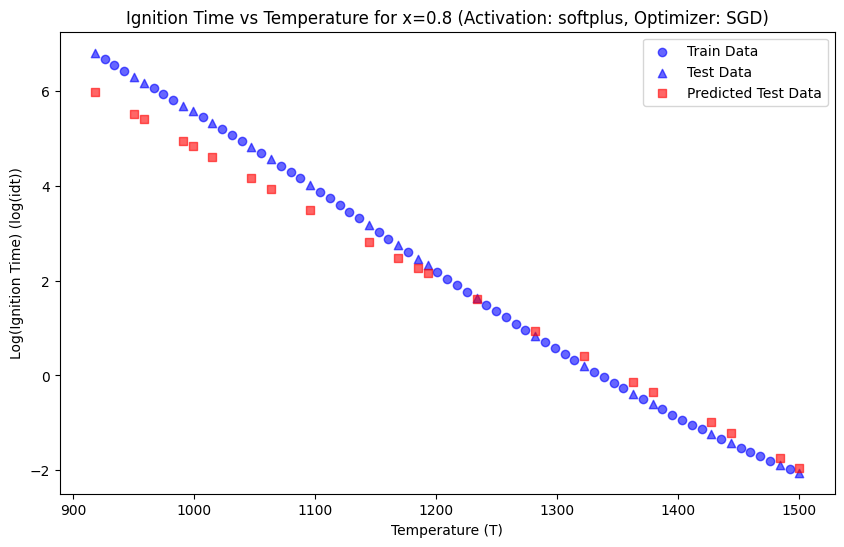

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 41: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 50: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 61: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 87: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Restoring model weights from the end of the best epoch: 99.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Results for x=0.8 with activation=swish and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       4.910156    1.386463
1   0.8  0.2  0.5  1427.2730   -1.236471      -0.837891   -0.398580
2   0.8  0.2  0.5  1063.6360    4.561330       3.884766    0.676564
3   0.8  0.2  0.5   918.1818    6.808899       5.160156    1.648743
4   0.8  0.2  0.5  1144.4440    3.172562       3.023438    0.149124
5   0.8  0.2  0.5  1500.0000   -2.052887      -1.994141   -0.058746
6   0.8  0.2  0.5   998.9899    5.574035       4.50000

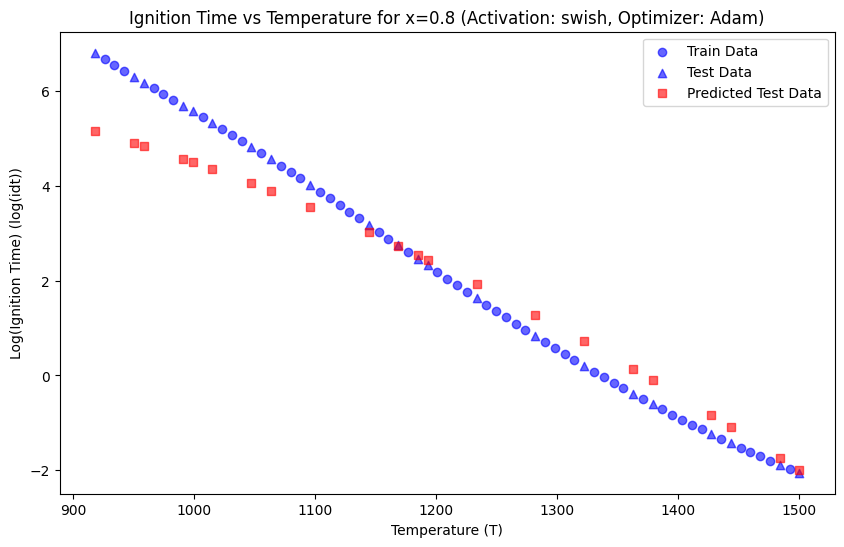

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 40: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 45: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 45: early stopping
Restoring model weights from the end of the best epoch: 35.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Results for x=0.8 with activation=swish and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       4.867188    1.429432
1   0.8  0.2  0.5  1427.2730   -1.236471       0.129028   -1.365499
2   0.8  0.2  0.5  1063.6360    4.561330       3.710938    0.850392
3   0.8  0.2  0.5   918.1818    6.808899       5.203125    1.605774
4   0.8  0.2  0.5  1144.4440    3.172562       2.894531    0.278030
5   0.8  0.2  0.5  1500.0000   -2.052887      -0.379639   -1.673248
6   0.8  0.2  0.5   998.9899    5.574035       4.375000    1.199035
7   0.8  0.2  0.5  1192.9290    2.323434       2.388672   -0.065238
8   0.8  0.2  0.5  1015.1520    5.329972     

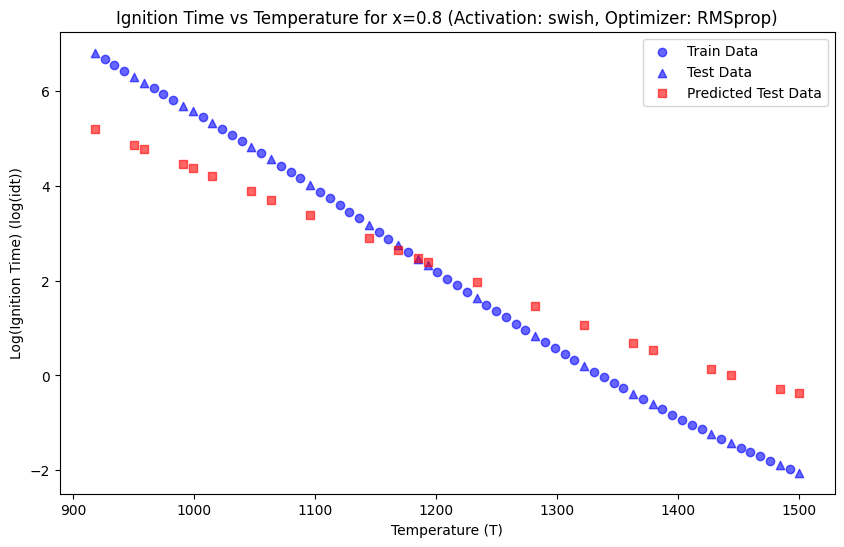

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 41: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 46: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 46: early stopping
Restoring model weights from the end of the best epoch: 36.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Results for x=0.8 with activation=swish and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       5.531250    0.765369
1   0.8  0.2  0.5  1427.2730   -1.236471      -0.922852   -0.313619
2   0.8  0.2  0.5  1063.6360    4.561330       3.859375    0.701955
3   0.8  0.2  0.5   918.1818    6.808899       6.000000    0.808899
4   0.8  0.2  0.5  1144.4440    3.172562       2.664062    0.508499
5   0.8  0.2  0.5  1500.0000   -2.052887      -1.692383   -0.360504
6   0.8  0.2  0.5   998.9899    5.574035       4.824219    0.749816
7   0.8  0.2  0.5  1192.9290    2.323434       1.959961    0.363473
8   0.8  0.2  0.5  1015.1520    5.329972       4.

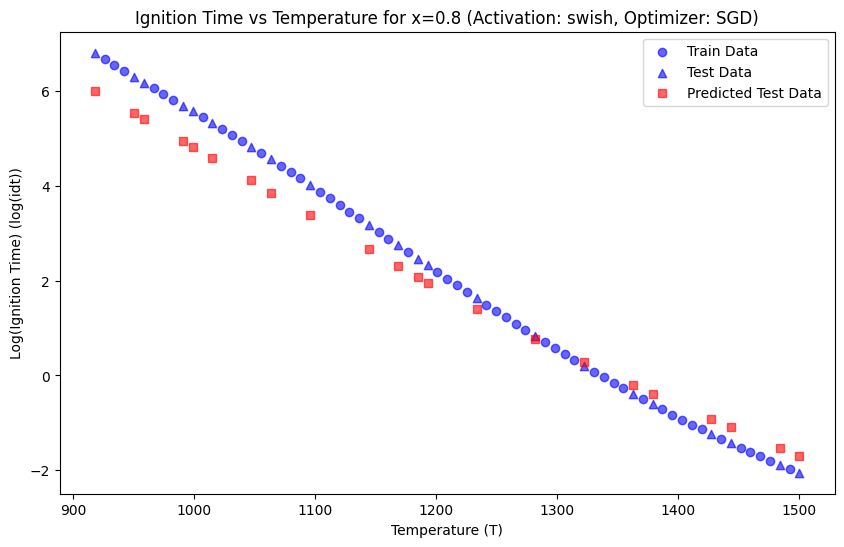

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 3.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Results for x=0.8 with activation=gelu and optimizer=Adam:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       1.651367    4.645252
1   0.8  0.2  0.5  1427.2730   -1.236471       2.894531   -4.131002
2   0.8  0.2  0.5  1063.6360    4.561330       1.952148    2.609181
3   0.8  0.2  0.5   918.1818    6.808899       1.571289    5.237610
4   0.8  0.2  0.5  1144.4440    3.172562       2.164062    1.008499
5   0.8  0.2  0.5  1500.0000   -2.052887       3.072266   -5.125152
6   0.8  0.2  0.5   998.9899    5.574035       1.784180    3.789855
7   0.8  0.2  0.5  1192.9290    2.323434       2.285156    0.038278
8   0.8  0.2  0.5  1015.1520    5.329972       1.82

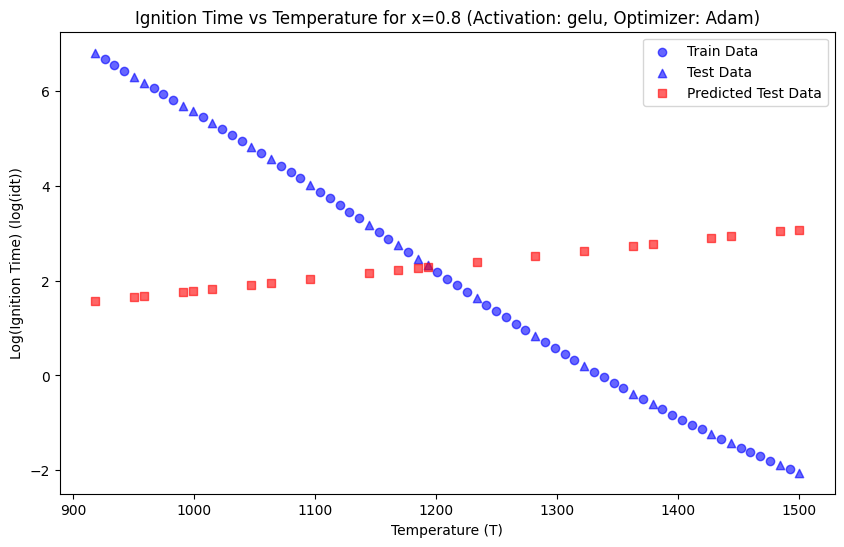

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 46: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 51: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 51: early stopping
Restoring model weights from the end of the best epoch: 41.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Results for x=0.8 with activation=gelu and optimizer=RMSprop:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       5.953125    0.343494
1   0.8  0.2  0.5  1427.2730   -1.236471      -1.608398    0.371928
2   0.8  0.2  0.5  1063.6360    4.561330       4.375000    0.186330
3   0.8  0.2  0.5   918.1818    6.808899       6.351562    0.457337
4   0.8  0.2  0.5  1144.4440    3.172562       3.130859    0.041702
5   0.8  0.2  0.5  1500.0000   -2.052887      -2.679688    0.626801
6   0.8  0.2  0.5   998.9899    5.574035       5.304688    0.269347
7   0.8  0.2  0.5  1192.9290    2.323434       2.328125   -0.004691
8   0.8  0.2  0.5  1015.1520    5.329972      

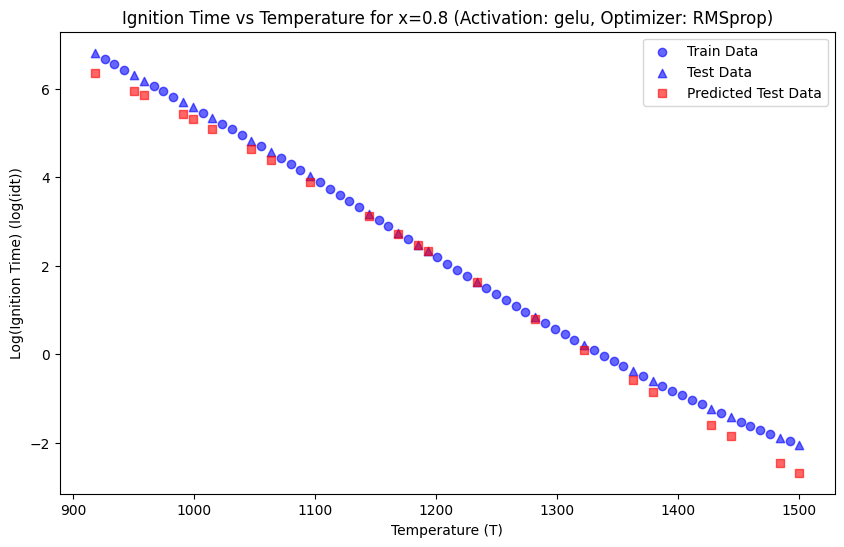

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 6.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Results for x=0.8 with activation=gelu and optimizer=SGD:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       1.003906    5.292713
1   0.8  0.2  0.5  1427.2730   -1.236471       2.146484   -3.382955
2   0.8  0.2  0.5  1063.6360    4.561330       1.337891    3.223439
3   0.8  0.2  0.5   918.1818    6.808899       0.897461    5.911438
4   0.8  0.2  0.5  1144.4440    3.172562       1.536133    1.636429
5   0.8  0.2  0.5  1500.0000   -2.052887       2.300781   -4.353668
6   0.8  0.2  0.5   998.9899    5.574035       1.155273    4.418761
7   0.8  0.2  0.5  1192.9290    2.323434       1.648438    0.674997
8   0.8  0.2  0.5  1015.1520    5.329972       1.20

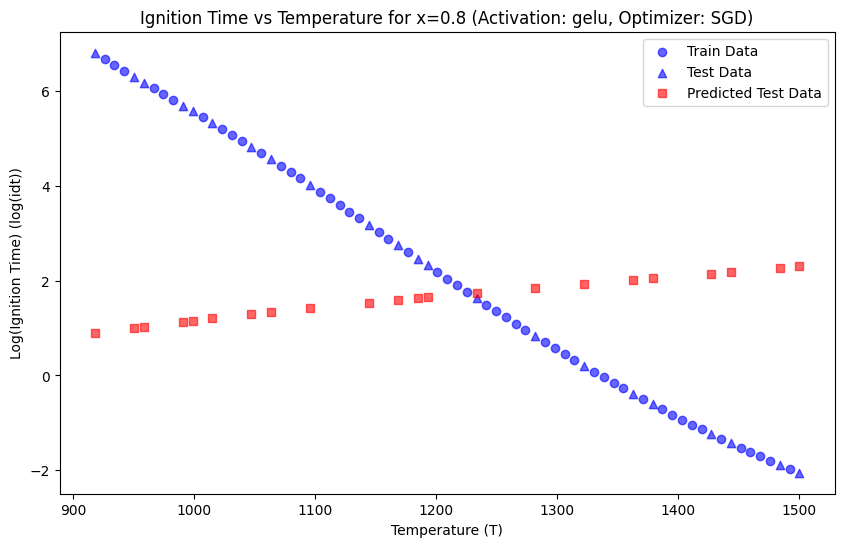

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 4.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Results for x=1 with activation=relu and optimizer=Adam:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       1.815430    4.984301
1   1.0  0.0  0.5  1063.636    6.164342       1.914062    4.250279
2   1.0  0.0  0.5  1314.141    2.558540       2.544922    0.013618
3   1.0  0.0  0.5  1386.869    1.653277       2.730469   -1.077192
4   1.0  0.0  0.5  1128.283    5.166457       2.078125    3.088332
5   1.0  0.0  0.5  1459.596    0.815926       2.910156   -2.094230
6   1.0  0.0  0.5  1289.899    2.874917       2.484375    0.390542
7   1.0  0.0  0.5  1411.111    1.366541       2.787109   -1.420568
8   1.0  0.0  0.5  1120.202    5.289090       2.056641    3.23

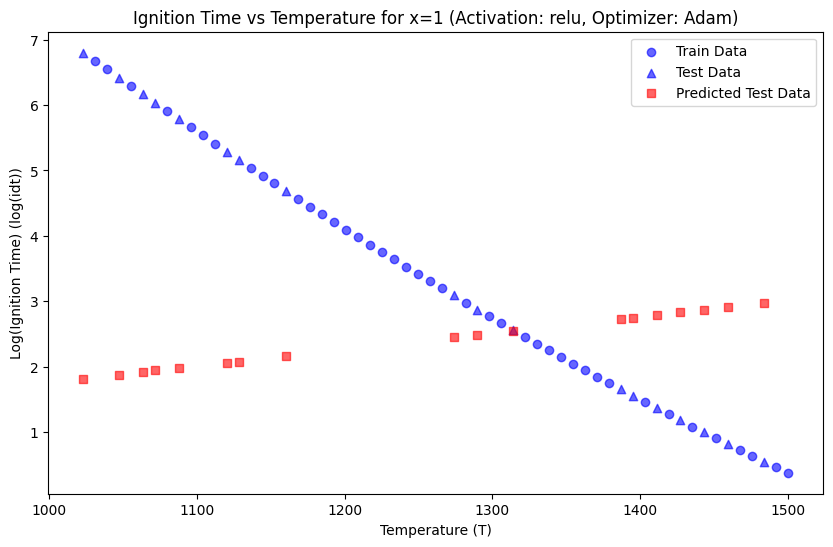

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 42: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 42: early stopping
Restoring model weights from the end of the best epoch: 32.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Results for x=1 with activation=relu and optimizer=RMSprop:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       5.417969    1.381762
1   1.0  0.0  0.5  1063.636    6.164342       4.828125    1.336217
2   1.0  0.0  0.5  1314.141    2.558540       1.385742    1.172797
3   1.0  0.0  0.5  1386.869    1.653277       0.518555    1.134722
4   1.0  0.0  0.5  1128.283    5.166457       3.894531    1.271925
5   1.0  0.0  0.5  1459.596    0.815926      -0.347656    1.163582
6   1.0  0.0  0.5  1289.899    2.874917       1.677734    1.197183
7   1.0  0.0  0.5  1411.111    1.366541       

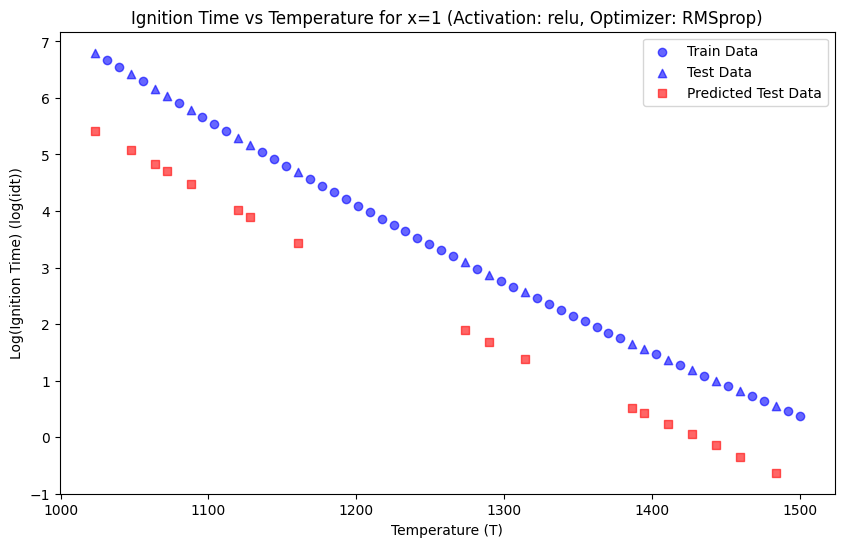

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 83: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Restoring model weights from the end of the best epoch: 100.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Results for x=1 with activation=relu and optimizer=SGD:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       4.421875    2.377856
1   1.0  0.0  0.5  1063.636    6.164342       3.935547    2.228795
2   1.0  0.0  0.5  1314.141    2.558540       0.043945    2.514594
3   1.0  0.0  0.5  1386.869    1.653277      -1.013672    2.666949
4   1.0  0.0  0.5  1128.283    5.166457       2.957031    2.209425
5   1.0  0.0  0.5  1459.596    0.815926      -2.066406    2.882332
6   1.0  0.0  0.5  1289.899    2.874917       0.390625    2.484292
7   1.0  0.0  0.5  1411.111    1.366541      -1.361328    2.727869
8   1.0  0.0  0.5  1120.202    5.289090       3.123047    2.166043
9   1.0  0.0  0.5  1483.838    0.552256      -2.414062    2.966318
10  1.0  0.0  0.5  1394.949  

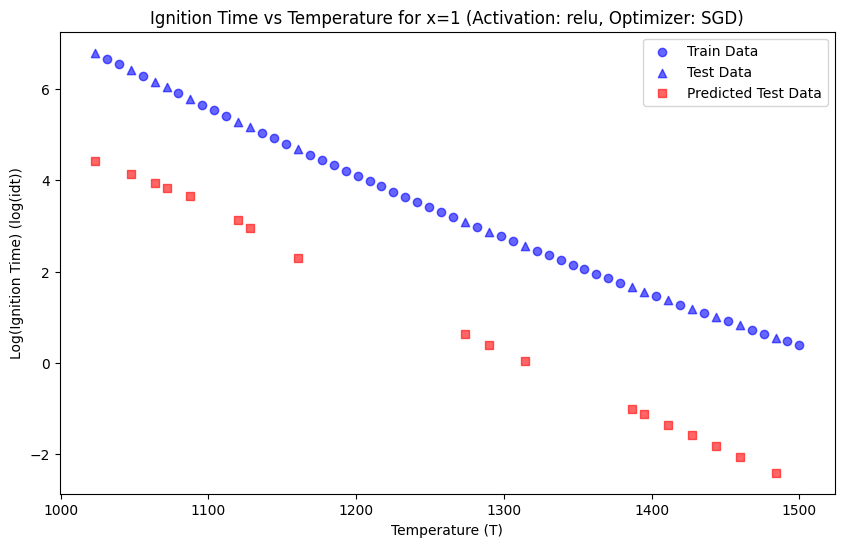

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 20: early stopping
Restoring model weights from the end of the best epoch: 10.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Results for x=1 with activation=leaky_relu and optimizer=Adam:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       1.431641    5.368090
1   1.0  0.0  0.5  1063.636    6.164342       1.551758    4.612584
2   1.0  0.0  0.5  1314.141    2.558540       2.337891    0.220649
3   1.0  0.0  0.5  1386.869    1.653277       2.568359   -0.915083
4   1.0  0.0  0.5  1128.283    5.166457       1.759766    3.406691
5   1.0  0.0  0.5  1459.596    0.815926       2.789062   -1.973136
6   1.0  0.0  0.5  1289.899    2.874917       2.259766    0.615152
7   1.0  0.0  0.5  1411.111    1.366541       2.648438   -1.281896
8   1.0  0.0  0.5  1120.202    5.289090       1.738281

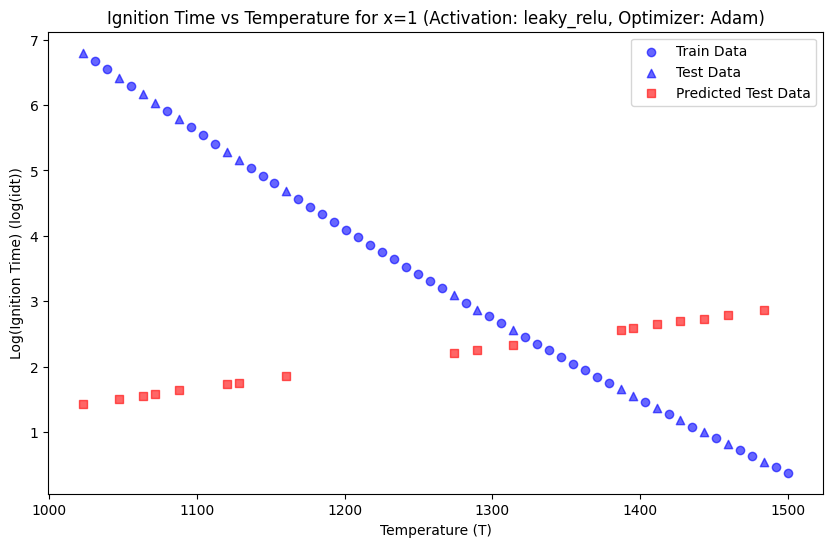

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 43: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 50: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 55: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 55: early stopping
Restoring model weights from the end of the best epoch: 45.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Results for x=1 with activation=leaky_relu and optimizer=RMSprop:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       6.136719    0.663012
1   1.0  0.0  0.5  1063.636    6.164342       5.527344    0.636998
2   1.0  0.0  0.5  1314.141    2.558540       1.994141    0.564399
3   1.0  0.0  0.5  1386.869    1.653277       0.940918    0.712359
4   1.0  0.0  0.5  1128.283    5.166457       4.597656    0.568800
5   1.0  0.0  0.5  1459.596    0.815926       0.180664    0.635262
6   1.0  0.0  0.5  1289.899   

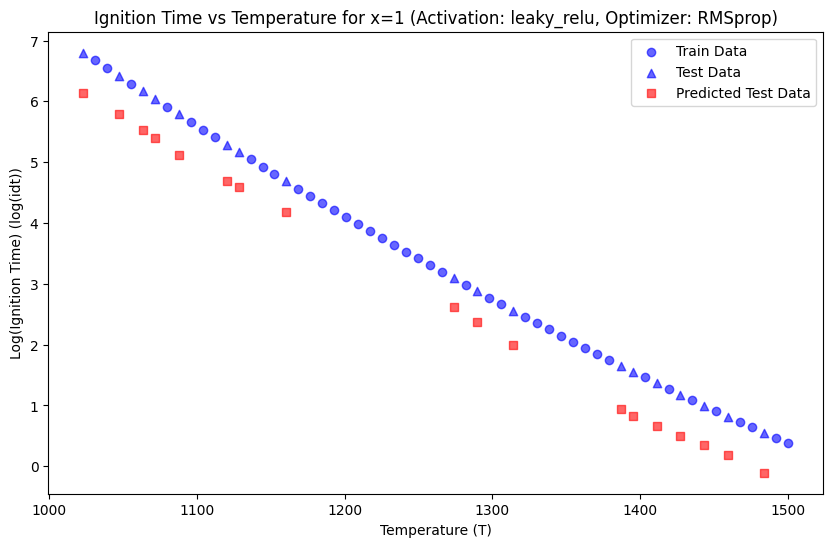

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Restoring model weights from the end of the best epoch: 100.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Results for x=1 with activation=leaky_relu and optimizer=SGD:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       4.492188    2.307543
1   1.0  0.0  0.5  1063.636    6.164342       3.845703    2.318639
2   1.0  0.0  0.5  1314.141    2.558540      -0.020996    2.579536
3   1.0  0.0  0.5  1386.869    1.653277      -1.011719    2.664996
4   1.0  0.0  0.5  1128.283    5.166457       2.837891    2.328566
5   1.0  0.0  0.5  1459.596    0.815926      -1.998047    2.813973
6   1.0  0.0  0.5  1289.899    2.874917       0.304199    2.570718
7   1.0  0.0  0.5  1411.111    1.366541      -1.330078    2.696619
8   1.0  0.0  0.5  1120.202    5.289090       2.960938    2.328152
9   1.0  0.0  0.5  1483.838    0.552256      -2.320312    2.872568
10  1.0  0.0  0.5  1394.

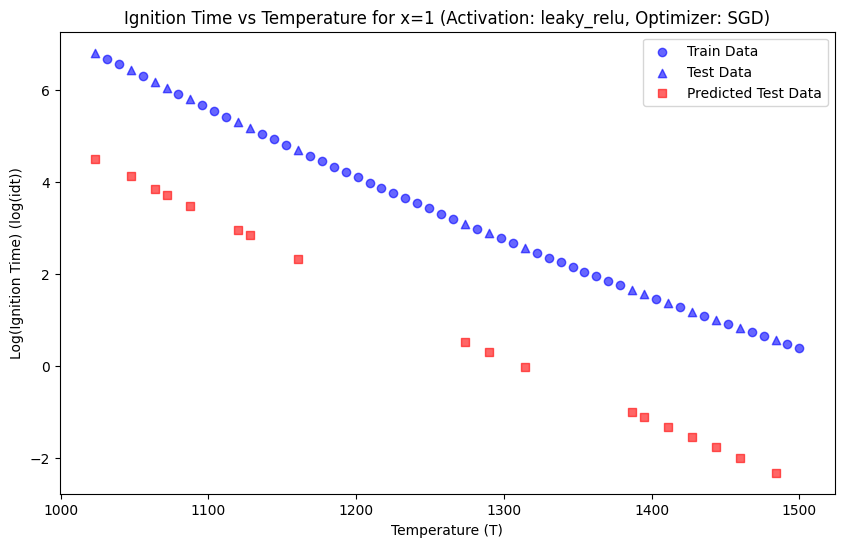

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 2.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Results for x=1 with activation=elu and optimizer=Adam:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731      -3.816406   10.616137
1   1.0  0.0  0.5  1063.636    6.164342      -3.896484   10.060826
2   1.0  0.0  0.5  1314.141    2.558540      -4.437500    6.996040
3   1.0  0.0  0.5  1386.869    1.653277      -4.605469    6.258746
4   1.0  0.0  0.5  1128.283    5.166457      -4.031250    9.197707
5   1.0  0.0  0.5  1459.596    0.815926      -4.781250    5.597176
6   1.0  0.0  0.5  1289.899    2.874917      -4.382812    7.257730
7   1.0  0.0  0.5  1411.111    1.366541      -4.667969    6.034510
8   1.0  0.0  0.5  1120.202    5.289090      -4.015625    9.304

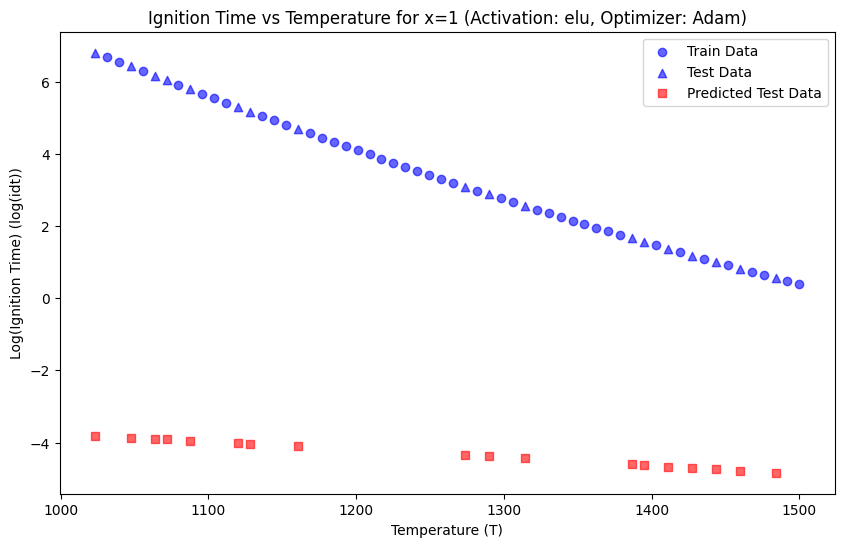

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 4.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Results for x=1 with activation=elu and optimizer=RMSprop:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       0.890625    5.909106
1   1.0  0.0  0.5  1063.636    6.164342       1.096680    5.067662
2   1.0  0.0  0.5  1314.141    2.558540       2.357422    0.201118
3   1.0  0.0  0.5  1386.869    1.653277       2.728516   -1.075239
4   1.0  0.0  0.5  1128.283    5.166457       1.417969    3.748488
5   1.0  0.0  0.5  1459.596    0.815926       3.097656   -2.281730
6   1.0  0.0  0.5  1289.899    2.874917       2.236328    0.638589
7   1.0  0.0  0.5  1411.111    1.366541       2.849609   -1.483068
8   1.0  0.0  0.5  1120.202    5.289090       1.375977    3.

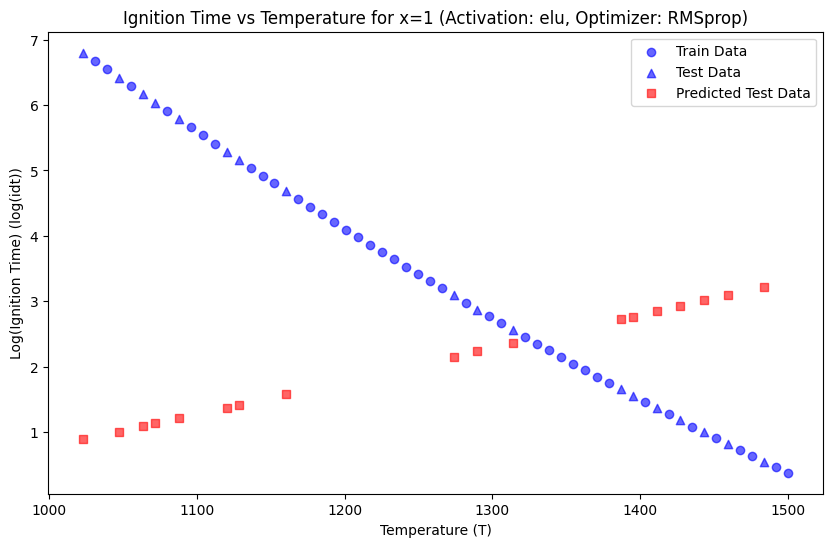

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 2.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Results for x=1 with activation=elu and optimizer=SGD:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       1.958984    4.840747
1   1.0  0.0  0.5  1063.636    6.164342       2.113281    4.051061
2   1.0  0.0  0.5  1314.141    2.558540       3.052734   -0.494195
3   1.0  0.0  0.5  1386.869    1.653277       3.314453   -1.661176
4   1.0  0.0  0.5  1128.283    5.166457       2.359375    2.807082
5   1.0  0.0  0.5  1459.596    0.815926       3.589844   -2.773918
6   1.0  0.0  0.5  1289.899    2.874917       2.949219   -0.074301
7   1.0  0.0  0.5  1411.111    1.366541       3.412109   -2.045568
8   1.0  0.0  0.5  1120.202    5.289090       2.322266    2.9668

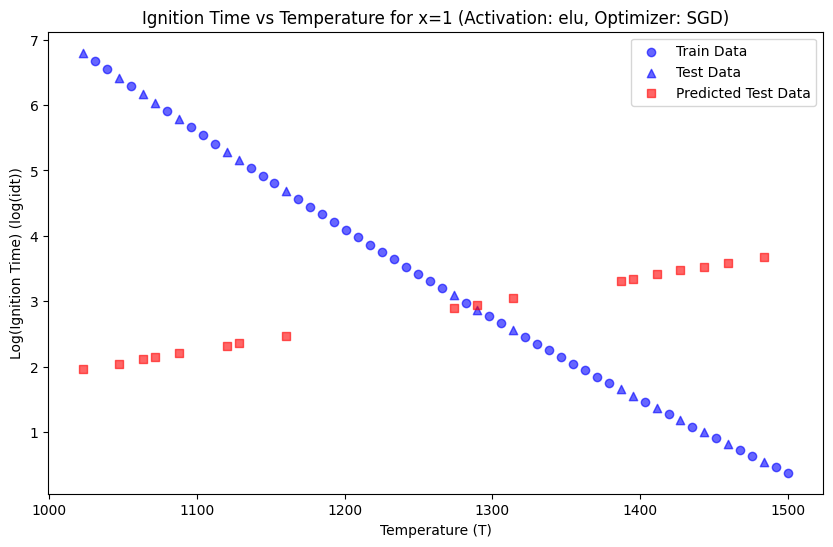

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 5.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Results for x=1 with activation=selu and optimizer=Adam:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       0.529297    6.270434
1   1.0  0.0  0.5  1063.636    6.164342       0.651855    5.512486
2   1.0  0.0  0.5  1314.141    2.558540       1.396484    1.162055
3   1.0  0.0  0.5  1386.869    1.653277       1.614258    0.039019
4   1.0  0.0  0.5  1128.283    5.166457       0.839355    4.327101
5   1.0  0.0  0.5  1459.596    0.815926       1.830078   -1.014152
6   1.0  0.0  0.5  1289.899    2.874917       1.322266    1.552652
7   1.0  0.0  0.5  1411.111    1.366541       1.686523   -0.319982
8   1.0  0.0  0.5  1120.202    5.289090       0.822754    4.4

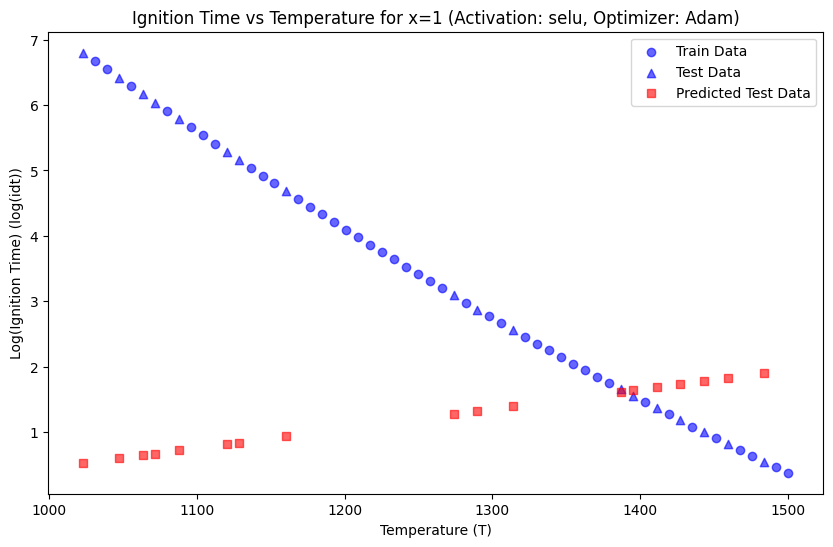

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 38: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 56: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 64: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 69: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 69: early stopping
Restoring model weights from the end of the best epoch: 59.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Results for x=1 with activation=selu and optimizer=RMSprop:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       3.720703    3.079028
1   1.0  0.0  0.5  1063.636    6.164342       3.199219    2.965123
2   1.0  0.0  0.5  1314.141    2.558540      -0.731934    3.290473
3   1.0  0.0  0.5  1386.869    1.653277      -1.691406    3.344683
4   1.0  0.0 

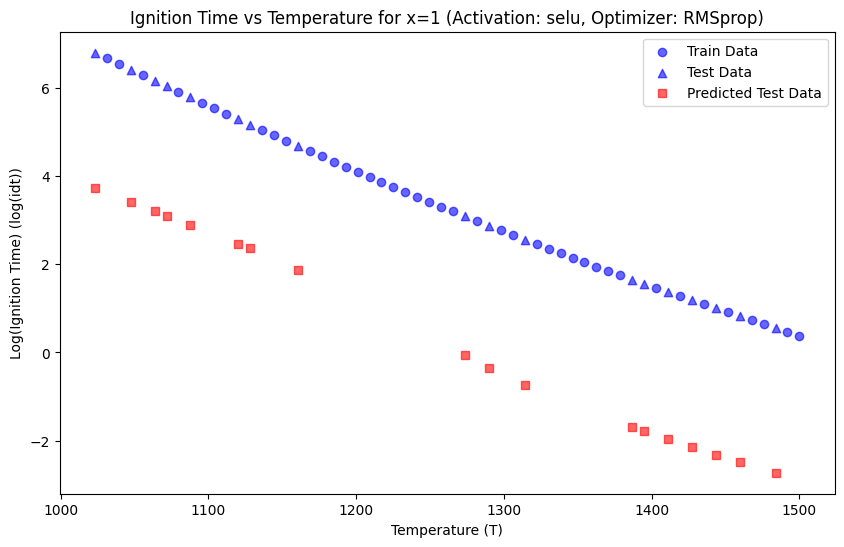

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 93: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 98: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 98: early stopping
Restoring model weights from the end of the best epoch: 88.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Results for x=1 with activation=selu and optimizer=SGD:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       4.574219    2.225512
1   1.0  0.0  0.5  1063.636    6.164342       3.984375    2.179967
2   1.0  0.0  0.5  1314.141    2.558540      -0.375000    2.933540
3   1.0  0.0  0.5  1386.869    1.653277      -1.217773    2.871050
4   1.0  0.0  0.5  1128.283    5.166457       2.996094    2.170363
5   1.0  0.0  0.5  1459.596    0.815926      -1.833008    2.648934
6   1.0  0.0  0.5  1289.899    2.874917      -0.034180    2.909097
7   1.0  0.0  0.5  1411.111    1.366541      -1.440430    2.806971
8   1.0  0.0  0.5  1120.202    5.289090       3.125000    2.1

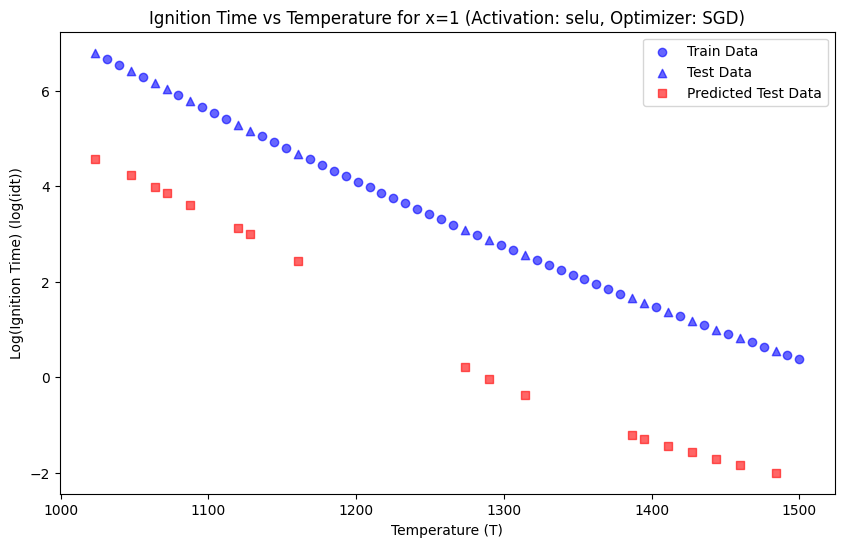

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 2.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Results for x=1 with activation=softplus and optimizer=Adam:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731      -3.328125   10.127856
1   1.0  0.0  0.5  1063.636    6.164342      -3.501953    9.666295
2   1.0  0.0  0.5  1314.141    2.558540      -4.484375    7.042915
3   1.0  0.0  0.5  1386.869    1.653277      -4.773438    6.426714
4   1.0  0.0  0.5  1128.283    5.166457      -3.750000    8.916457
5   1.0  0.0  0.5  1459.596    0.815926      -5.070312    5.886239
6   1.0  0.0  0.5  1289.899    2.874917      -4.390625    7.265542
7   1.0  0.0  0.5  1411.111    1.366541      -4.867188    6.233729
8   1.0  0.0  0.5  1120.202    5.289090      -3.716797    

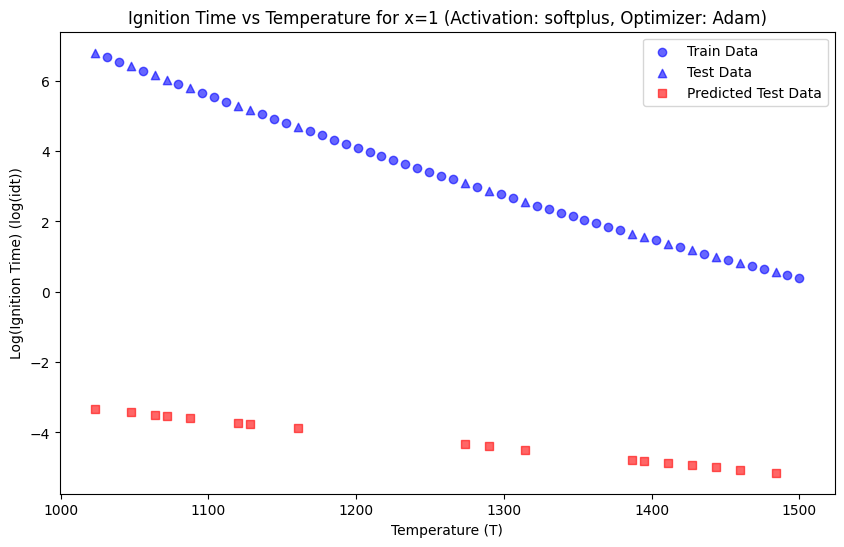

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 42: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 53: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 58: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 58: early stopping
Restoring model weights from the end of the best epoch: 48.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Results for x=1 with activation=softplus and optimizer=RMSprop:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       3.943359    2.856372
1   1.0  0.0  0.5  1063.636    6.164342       3.470703    2.693639
2   1.0  0.0  0.5  1314.141    2.558540       0.716309    1.842231
3   1.0  0.0  0.5  1386.869    1.653277      -0.055908    1.709185
4   1.0  0.0  0.5  1128.283    5.166457       2.742188    2.424269
5   1.0  0.0  0.5  1459.596    0.815926      -0.820312    1.636239
6   1.0  0.0  0.5  1289.899    2

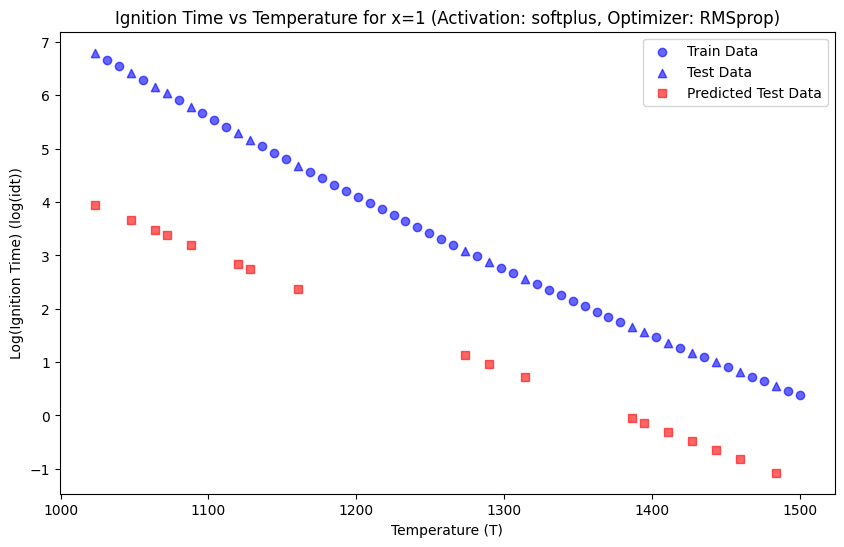

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 100: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Restoring model weights from the end of the best epoch: 95.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Results for x=1 with activation=softplus and optimizer=SGD:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       4.386719    2.413012
1   1.0  0.0  0.5  1063.636    6.164342       3.771484    2.392857
2   1.0  0.0  0.5  1314.141    2.558540       0.127441    2.431098
3   1.0  0.0  0.5  1386.869    1.653277      -0.905762    2.559039
4   1.0  0.0  0.5  1128.283    5.166457       2.812500    2.353957
5   1.0  0.0  0.5  1459.596    0.815926      -1.941406    2.757332
6   1.0  0.0  0.5  1289.899    2.874917       0.466309    2.408609
7   1.0  0.0  0.5  1411.111    1.366541      -1.246094    2.612635
8   1.0  0.0  0.5  1120.202    5.289090       2.929688    2.359402
9   1.0  0.0  0.5  1483.838    0.552256      -2.281250    2.833506
10  1.0  0.0  0.5  1394.9

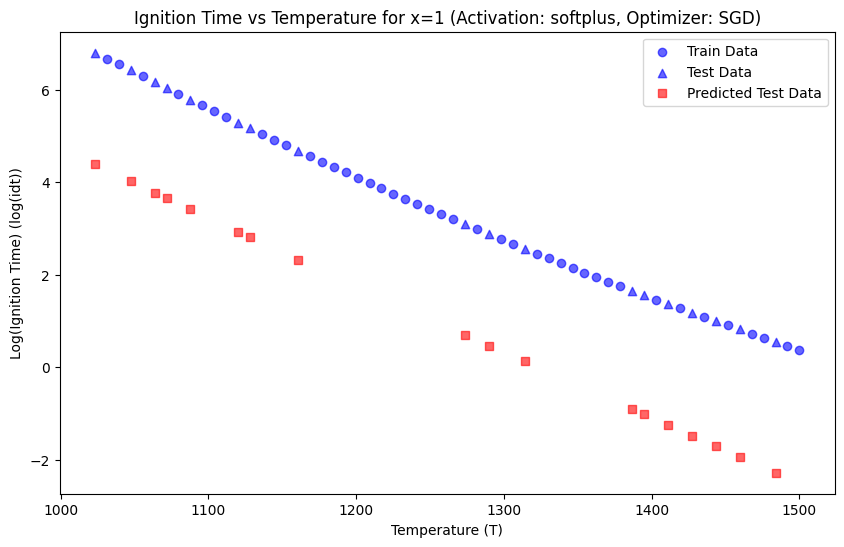

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 44: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 49: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 49: early stopping
Restoring model weights from the end of the best epoch: 39.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Results for x=1 with activation=swish and optimizer=Adam:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       4.886719    1.913012
1   1.0  0.0  0.5  1063.636    6.164342       4.582031    1.582311
2   1.0  0.0  0.5  1314.141    2.558540       2.517578    0.040962
3   1.0  0.0  0.5  1386.869    1.653277       1.664062   -0.010786
4   1.0  0.0  0.5  1128.283    5.166457       4.140625    1.025832
5   1.0  0.0  0.5  1459.596    0.815926       0.699219    0.116707
6   1.0  0.0  0.5  1289.899    2.874917       2.767578    0.107339
7   1.0  0.0  0.5  1411.111    1.366541       1.3

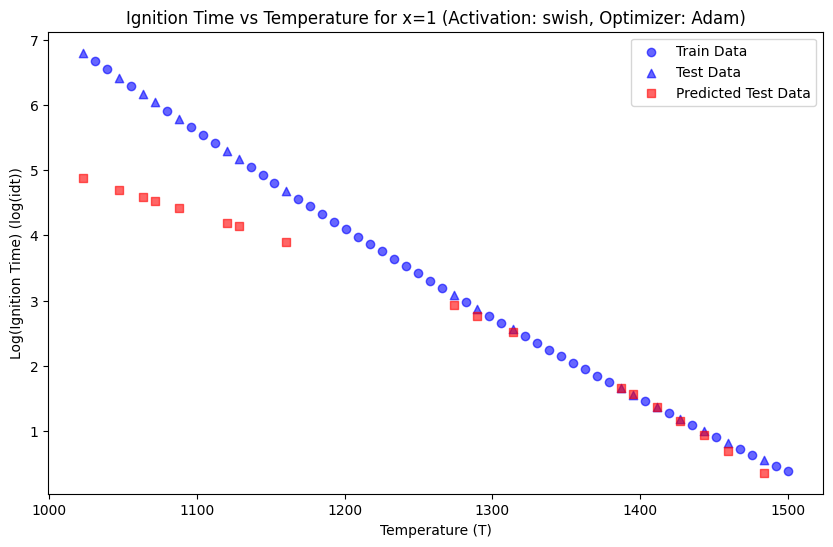

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 62: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 67: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 67: early stopping
Restoring model weights from the end of the best epoch: 57.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Results for x=1 with activation=swish and optimizer=RMSprop:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       4.335938    2.463793
1   1.0  0.0  0.5  1063.636    6.164342       3.714844    2.449498
2   1.0  0.0  0.5  1314.141    2.558540       0.858398    1.700141
3   1.0  0.0  0.5  1386.869    1.653277       0.208252    1.445025
4   1.0  0.0  0.5  1128.283    5.166457       2.812500    2.353957
5   1.0  0.0  0.5  1459.596    0.815926      -0.475586    1.291512
6   1.0  0.0  0.5  1289.899    2.874917       1.076172    1.798746
7   1.0  0.0  0.5  1411.111    1.366541      -0.010986    1.377528
8   1.0  0.0  0.5  1120.202    5.289090       2.917969  

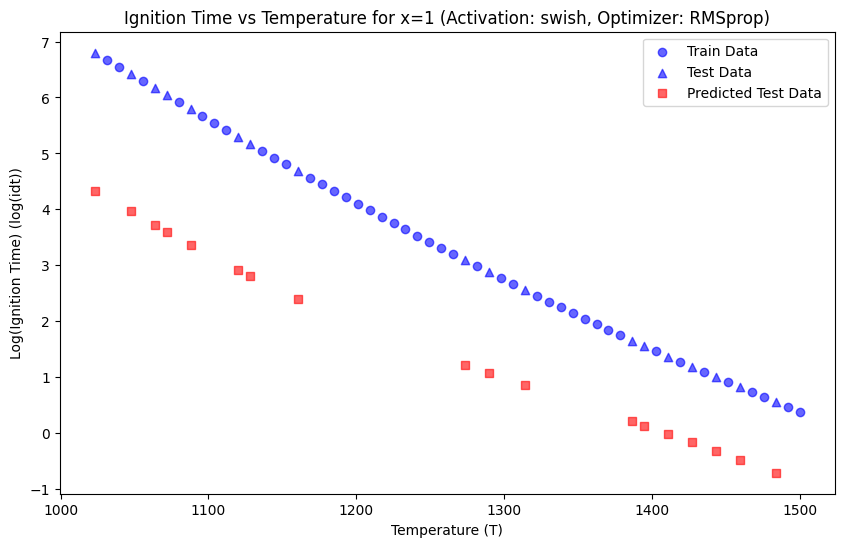

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 100: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Restoring model weights from the end of the best epoch: 95.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Results for x=1 with activation=swish and optimizer=SGD:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       4.382812    2.416918
1   1.0  0.0  0.5  1063.636    6.164342       3.773438    2.390904
2   1.0  0.0  0.5  1314.141    2.558540       0.182129    2.376411
3   1.0  0.0  0.5  1386.869    1.653277      -0.828613    2.481890
4   1.0  0.0  0.5  1128.283    5.166457       2.835938    2.330519
5   1.0  0.0  0.5  1459.596    0.815926      -1.833984    2.649911
6   1.0  0.0  0.5  1289.899    2.874917       0.519043    2.355874
7   1.0  0.0  0.5  1411.111    1.366541      -1.158203    2.524744
8   1.0  0.0  0.5  1120.202    5.289090       2.951172    2.337918
9   1.0  0.0  0.5  1483.838    0.552256      -2.162109    2.714365
10  1.0  0.0  0.5  1394.949 

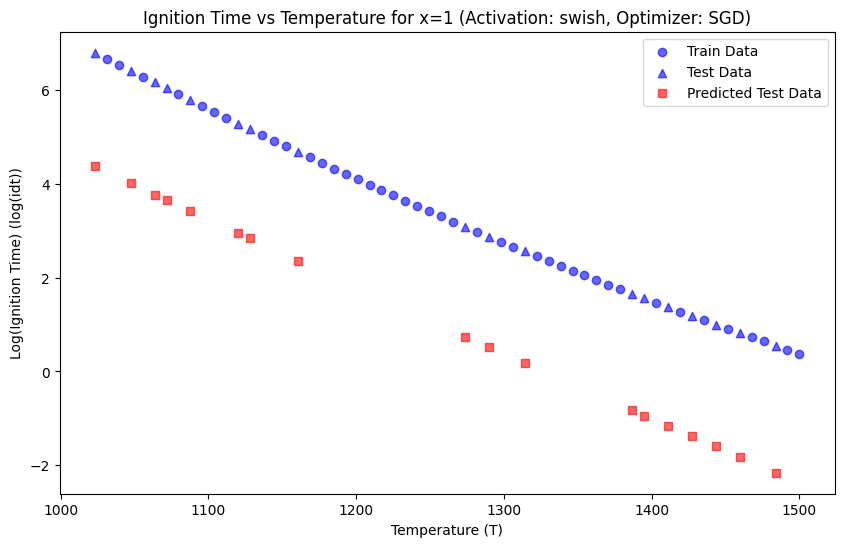

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 72: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 77: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 77: early stopping
Restoring model weights from the end of the best epoch: 67.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Results for x=1 with activation=gelu and optimizer=Adam:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       5.652344    1.147387
1   1.0  0.0  0.5  1063.636    6.164342       5.207031    0.957311
2   1.0  0.0  0.5  1314.141    2.558540       2.222656    0.335883
3   1.0  0.0  0.5  1386.869    1.653277       1.188477    0.464800
4   1.0  0.0  0.5  1128.283    5.166457       4.500000    0.666457
5   1.0  0.0  0.5  1459.596    0.815926       0.144775    0.671151
6   1.0  0.0  0.5  1289.899    2.874917       2.550781    0.324136
7   1.0  0.0  0.5  1411.111    1.366541       0.845703    0.520838
8   1.0  0.0  0.5  1120.202    5.289090       4.593750    0.

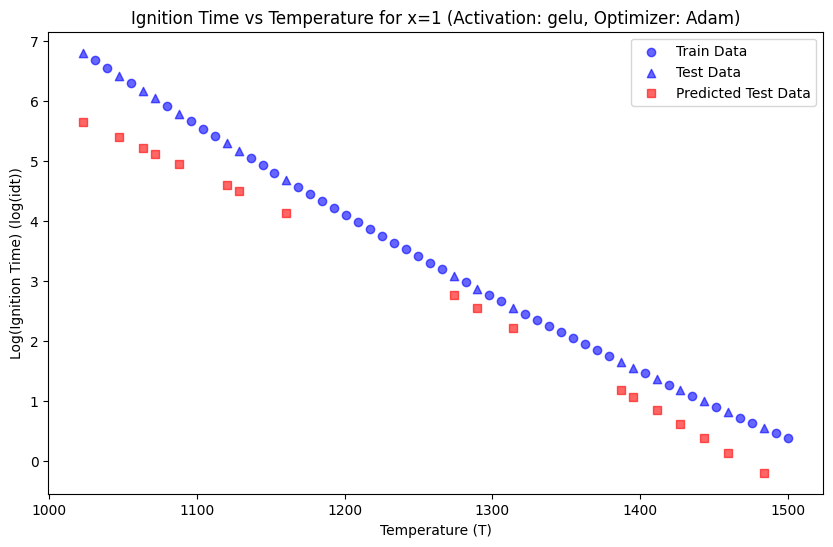

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 68: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 77: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 82: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 82: early stopping
Restoring model weights from the end of the best epoch: 72.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Results for x=1 with activation=gelu and optimizer=RMSprop:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       5.304688    1.495043
1   1.0  0.0  0.5  1063.636    6.164342       5.000000    1.164342
2   1.0  0.0  0.5  1314.141    2.558540       2.324219    0.234321
3   1.0  0.0  0.5  1386.869    1.653277       1.390625    0.262652
4   1.0  0.0  0.5  1128.283    5.166457       4.433594    0.732863
5   1.0  0.0  0.5  1459.596    0.815926       0.427002    0.388924
6   1.0  0.0  0.5  1289.899    2.874917       2.617188    0.257730
7   1.0  0.0  0.5  1411.111    1.366541       

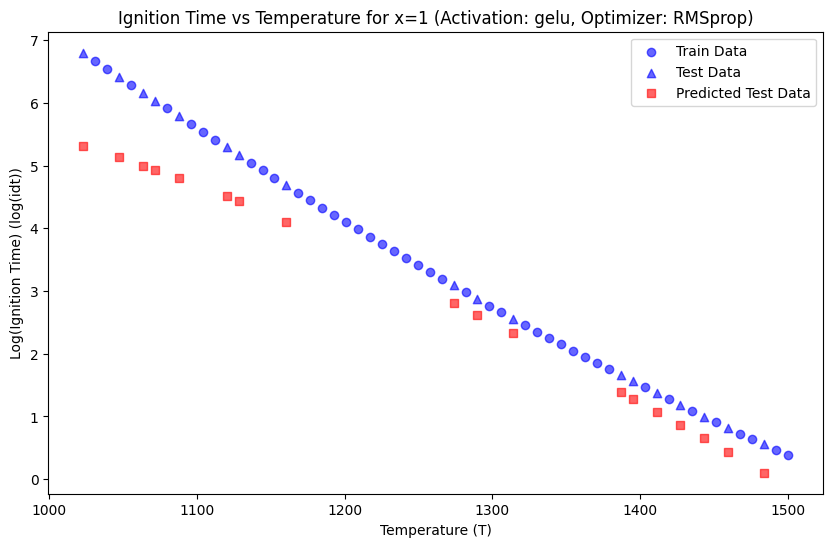

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 99: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Restoring model weights from the end of the best epoch: 100.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Results for x=1 with activation=gelu and optimizer=SGD:
      x    y  phi         T  Actual idt  Predicted idt  Difference
0   1.0  0.0  0.5  1023.232    6.799731       4.441406    2.358325
1   1.0  0.0  0.5  1063.636    6.164342       3.847656    2.316686
2   1.0  0.0  0.5  1314.141    2.558540      -0.066895    2.625434
3   1.0  0.0  0.5  1386.869    1.653277      -1.083984    2.737261
4   1.0  0.0  0.5  1128.283    5.166457       2.886719    2.279738
5   1.0  0.0  0.5  1459.596    0.815926      -2.011719    2.827645
6   1.0  0.0  0.5  1289.899    2.874917       0.290527    2.584390
7   1.0  0.0  0.5  1411.111    1.366541      -1.392578    2.759119
8   1.0  0.0  0.5  1120.202    5.289090       3.009766    2.279324
9   1.0  0.0  0.5  1483.838    0.552256      -2.310547    2.862803
10  1.0  0.0  0.5  1394.949  

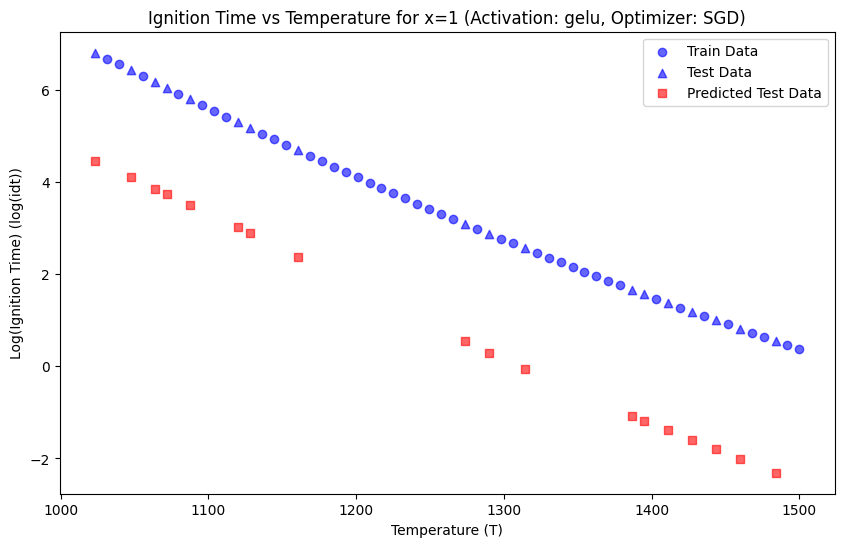

Grid Search Results:
     x  activation optimizer       MSE      RMSE   val_loss        R2
0    0        relu      Adam  2.941561  1.715098   4.030442  0.581116
1    0        relu   RMSprop  0.634902  0.796807   1.038136  0.909589
2    0        relu       SGD  0.080952  0.284520   0.180012  0.988472
3    0  leaky_relu      Adam  9.653893  3.107072  51.150280 -0.374732
4    0  leaky_relu   RMSprop  0.191984  0.438160   2.393225  0.972661
..  ..         ...       ...       ...       ...        ...       ...
121  1       swish   RMSprop  3.813006  1.952692  61.318714  0.204513
122  1       swish       SGD  6.001294  2.449754   4.869391 -0.252018
123  1        gelu      Adam  0.488899  0.699213   1.320399  0.898004
124  1        gelu   RMSprop  0.552475  0.743287   1.396265  0.884740
125  1        gelu       SGD  6.506235  2.550732   5.313887 -0.357361

[126 rows x 7 columns]


In [32]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Enable mixed precision for faster computation on compatible hardware
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Initialize a DataFrame to store results
results = pd.DataFrame(columns=['x', 'activation', 'optimizer', 'MSE', 'RMSE', 'val_loss', 'R2'])

def store_results(x_value, activation, optimizer, mse, rmse, val_loss, r2):
    """Store the results of each model run in the results DataFrame."""
    global results
    new_row = pd.DataFrame({
        'x': [x_value],
        'activation': [activation],
        'optimizer': [optimizer],
        'MSE': [mse],
        'RMSE': [rmse],
        'val_loss': [val_loss],
        'R2': [r2]
    })
    results = pd.concat([results, new_row], ignore_index=True)

# Define the function to isolate specific x values and process the model training, testing, and visualization
def process_for_x_value(df, x_value, activation, optimizer_choice):
    # Step 1: Filter the data where x != x_value and select 70% of data where x == x_value
    df_not_x_value = df[df['x'] != x_value]
    df_x_value = df[df['x'] == x_value]
    train_x, test_x = train_test_split(df_x_value, test_size=0.3, random_state=42)

    # Combine all data where x != x_value with 70% of data where x = x_value
    train_df = pd.concat([df_not_x_value, train_x])
    test_df = test_x

    # Remove entries where `idt` is zero in both train and test sets and apply log transformation
    train_df = train_df[train_df['idt'] > 0]
    test_df = test_df[test_df['idt'] > 0]

    # Separate features and target, applying log transformation to `idt`
    X_train = train_df.drop(columns=['idt']).values
    y_train = np.log(train_df['idt'].values)
    X_test = test_df.drop(columns=['idt']).values
    y_test = np.log(test_df['idt'].values)

    # Step 2: Define the model with batch normalization and dropout for regularization
    model_tf = Sequential([
        Dense(16, input_shape=(6,), activation=activation),
        BatchNormalization(),
        Dropout(0.2),
        Dense(8, activation=activation),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1)  # Output layer
    ])

    # Choose optimizer based on grid search
    if optimizer_choice == 'Adam':
        optimizer = Adam(learning_rate=0.001, weight_decay=1e-5)
    elif optimizer_choice == 'RMSprop':
        optimizer = RMSprop(learning_rate=0.001)
    elif optimizer_choice == 'SGD':
        optimizer = SGD(learning_rate=0.001)

    model_tf.compile(optimizer=optimizer, loss='mse')

    # Callbacks for learning rate scheduling and early stopping
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

    # Train the model with a larger batch size for better performance
    history = model_tf.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, verbose=0, callbacks=[lr_scheduler, early_stopping])

    # Predict `idt` values for the test set
    test_predictions = model_tf.predict(X_test).flatten()

    # Calculate MSE, RMSE, and R2
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, test_predictions)

    # Store the final validation loss
    val_loss = history.history['val_loss'][-1]

    # Store the results including R2
    store_results(x_value, activation, optimizer_choice, mse, rmse, val_loss, r2)

    # Display results in a DataFrame
    comparison_df = pd.DataFrame({
        'x': test_df['x'].values,
        'y': test_df['y'].values,
        'phi': test_df['phi'].values,
        'T': test_df['T'].values,
        'Actual idt': y_test,
        'Predicted idt': test_predictions,
        'Difference': y_test - test_predictions
    })

    print(f"Results for x={x_value} with activation={activation} and optimizer={optimizer_choice}:")
    print(comparison_df)
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}")

    # Plot the results
    T_train = train_x[train_x['idt'] > 0]['T'].values
    idt_train = np.log(train_x[train_x['idt'] > 0]['idt'].values)
    T_test = test_df['T'].values
    idt_test = y_test

    plt.figure(figsize=(10, 6))
    plt.scatter(T_train, idt_train, color='blue', marker='o', label='Train Data', alpha=0.6)
    plt.scatter(T_test, idt_test, color='blue', marker='^', label='Test Data', alpha=0.6)
    plt.scatter(T_test, test_predictions, color='red', marker='s', label='Predicted Test Data', alpha=0.6)

    plt.xlabel('Temperature (T)')
    plt.ylabel('Log(Ignition Time) (log(idt))')
    plt.title(f'Ignition Time vs Temperature for x={x_value} (Activation: {activation}, Optimizer: {optimizer_choice})')
    plt.legend()
    plt.show()

# List of x values to process, example activation functions, and optimizers for grid search
x_values_to_process = [0,0.2, 0.4, 0.6, 0.8,1]
activation_functions = ['relu', 'leaky_relu', 'elu', 'selu', 'softplus', 'swish', 'gelu']
optimizers = ['Adam', 'RMSprop', 'SGD']

# Run the process for each x value, activation, and optimizer combination
for x_value in x_values_to_process:
    for activation in activation_functions:
        for optimizer in optimizers:
            process_for_x_value(df, x_value, activation, optimizer)

# Print the final results DataFrame for easy review
print("Grid Search Results:")
print(results)

In [33]:
print("Summary of Results:")
print(results)

# Find the rows with the lowest MSE for each x value
min_mse_indices = results.groupby('x')['MSE'].idxmin()
highlighted_results = results.copy()
highlighted_results['Highlight'] = ['*' if idx in min_mse_indices.values else '' for idx in results.index]

# Display the highlighted results
highlighted_results.style.apply(lambda x: ['background-color: yellow' if x.name in min_mse_indices.values else '' for _ in x], axis=1)

Summary of Results:
     x  activation optimizer       MSE      RMSE   val_loss        R2
0    0        relu      Adam  2.941561  1.715098   4.030442  0.581116
1    0        relu   RMSprop  0.634902  0.796807   1.038136  0.909589
2    0        relu       SGD  0.080952  0.284520   0.180012  0.988472
3    0  leaky_relu      Adam  9.653893  3.107072  51.150280 -0.374732
4    0  leaky_relu   RMSprop  0.191984  0.438160   2.393225  0.972661
..  ..         ...       ...       ...       ...        ...       ...
121  1       swish   RMSprop  3.813006  1.952692  61.318714  0.204513
122  1       swish       SGD  6.001294  2.449754   4.869391 -0.252018
123  1        gelu      Adam  0.488899  0.699213   1.320399  0.898004
124  1        gelu   RMSprop  0.552475  0.743287   1.396265  0.884740
125  1        gelu       SGD  6.506235  2.550732   5.313887 -0.357361

[126 rows x 7 columns]
